In [1]:
import os
import re
from pathlib import Path

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
figdir = '../results/figures/mixture_deconvolution_v11'
Path(figdir).mkdir(parents=True, exist_ok=True)
sc.settings.figdir = figdir

In [3]:
from sklearn.preprocessing import StandardScaler
def normalize_expression_matrix(df):
    return pd.DataFrame(data=StandardScaler().fit_transform(df.values.transpose()).transpose(),
                       columns=df.columns, index=df.index)

## TCGA

In [4]:
# expression_df = pd.read_csv('../data/bulk_rna_seq/tcga.txt', sep='\t', index_col='Gene')
# expression_df = normalize_expression_matrix(expression_df)
# expression_df

In [5]:
cbsx_df = pd.read_csv(
    '/diskmnt/Projects/Users/estorrs/pdac_single_cell/run30_tcga/results/CIBERSORTx_Adjusted.txt',
    sep='\t')
cbsx_df = cbsx_df.set_index('Mixture')
cbsx_df = cbsx_df.iloc[:, :-3]
cbsx_df

Acinar    B cell       CAF  CD4 T cell  \
Mixture                                                                  
TCGA-OE-A75W-01A-12R-A32O-07  0.001346  0.046928  0.157142    0.024992   
TCGA-2J-AABT-01A-11R-A41B-07  0.000000  0.041493  0.102514    0.015916   
TCGA-IB-7886-01A-11R-2156-07  0.001566  0.099063  0.195368    0.039282   
TCGA-IB-AAUU-01A-11R-A37L-07  0.005414  0.032756  0.092638    0.005052   
TCGA-2J-AAB6-01A-11R-A41B-07  0.000336  0.015305  0.197954    0.008213   
...                                ...       ...       ...         ...   
TCGA-IB-AAUN-01A-12R-A38C-07  0.169336  0.068668  0.137201    0.000000   
TCGA-FB-AAPU-01A-31R-A41B-07  0.000568  0.000000  0.048203    0.000000   
TCGA-HZ-8001-01A-11R-2204-07  0.002546  0.044683  0.250374    0.071370   
TCGA-IB-7651-01A-11R-2156-07  0.014413  0.126698  0.143407    0.000000   
TCGA-3A-A9IJ-01A-11R-A39D-07  0.000207  0.000000  0.000000    0.120050   

                              CD8 T cell  CD8 T cell - exausted        DC  \
Mixture                                                                     
TCGA-OE-A75W-01A-12R-A32O-07    0.004258               0.029858  0.044214   
TCGA-2J-AABT-01A-11R-A41B-07    0.014118               0.032510  0.037395   
TCGA-IB-7886-01A-11R-2156-07    0.000000               0.007395  0.016802   
TCGA-IB-AAUU-01A-11R-A37L-07    0.000000               0.037243  0.000000   
TCGA-2J-AAB6-01A-11R-A41B-07    0.000000               0.034259  0.000000   
...                                  ...                    ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07    0.000000               0.051124  0.030409   
TCGA-FB-AAPU-01A-31R-A41B-07    0.000000               0.028877  0.020870   
TCGA-HZ-8001-01A-11R-2204-07    0.000300               0.035232  0.010366   
TCGA-IB-7651-01A-11R-2156-07    0.000000               0.059529  0.005712   
TCGA-3A-A9IJ-01A-11R-A39D-07    0.000000               0.128672  0.032308   

                              Endothelial  Erythrocyte  Malignant_0  ...  \
Mixture                                                              ...   
TCGA-OE-A75W-01A-12R-A32O-07     0.010201     0.002120     0.215128  ...   
TCGA-2J-AABT-01A-11R-A41B-07     0.000364     0.000000     0.047499  ...   
TCGA-IB-7886-01A-11R-2156-07     0.000473     0.000000     0.196776  ...   
TCGA-IB-AAUU-01A-11R-A37L-07     0.020857     0.000000     0.203058  ...   
TCGA-2J-AAB6-01A-11R-A41B-07     0.022935     0.000611     0.123127  ...   
...                                   ...          ...          ...  ...   
TCGA-IB-AAUN-01A-12R-A38C-07     0.007599     0.000000     0.121434  ...   
TCGA-FB-AAPU-01A-31R-A41B-07     0.019845     0.004578     0.147840  ...   
TCGA-HZ-8001-01A-11R-2204-07     0.060308     0.042465     0.081503  ...   
TCGA-IB-7651-01A-11R-2156-07     0.004123     0.000000     0.037301  ...   
TCGA-3A-A9IJ-01A-11R-A39D-07     0.205699     0.013517     0.000000  ...   

                              Malignant_2  Malignant_3  Malignant_4      Mast  \
Mixture                                                                         
TCGA-OE-A75W-01A-12R-A32O-07     0.027387     0.120801     0.015037  0.000000   
TCGA-2J-AABT-01A-11R-A41B-07     0.005432     0.125283     0.045014  0.000000   
TCGA-IB-7886-01A-11R-2156-07     0.000351     0.083983     0.026792  0.004498   
TCGA-IB-AAUU-01A-11R-A37L-07     0.059199     0.034906     0.062854  0.001042   
TCGA-2J-AAB6-01A-11R-A41B-07     0.336581     0.052506     0.000102  0.000000   
...                                   ...          ...          ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07     0.089448     0.095599     0.034297  0.000000   
TCGA-FB-AAPU-01A-31R-A41B-07     0.000000     0.169936     0.011161  0.015567   
TCGA-HZ-8001-01A-11R-2204-07     0.044486     0.040384     0.018069  0.001205   
TCGA-IB-7651-01A-11R-2156-07     0.021214     0.104143     0.050135  0.000000   
TCGA-3A-A9IJ-01A-11R-A39D-07     0.017700     0.069267     0.012247  0.082841   

                        

In [6]:
# add tumor fractions
ls = [x for x in cbsx_df.columns if 'Malignant' in x]
for m in ls:
    filtered = cbsx_df[ls]
    fraction = filtered[m] / np.sum(filtered.values, axis=1).flatten()
    cbsx_df[f'{m}_tumor_fraction'] = fraction
    cbsx_df['total_tumor_fraction'] = np.sum(filtered.values, axis=1).flatten()
cbsx_df

Acinar    B cell       CAF  CD4 T cell  \
Mixture                                                                  
TCGA-OE-A75W-01A-12R-A32O-07  0.001346  0.046928  0.157142    0.024992   
TCGA-2J-AABT-01A-11R-A41B-07  0.000000  0.041493  0.102514    0.015916   
TCGA-IB-7886-01A-11R-2156-07  0.001566  0.099063  0.195368    0.039282   
TCGA-IB-AAUU-01A-11R-A37L-07  0.005414  0.032756  0.092638    0.005052   
TCGA-2J-AAB6-01A-11R-A41B-07  0.000336  0.015305  0.197954    0.008213   
...                                ...       ...       ...         ...   
TCGA-IB-AAUN-01A-12R-A38C-07  0.169336  0.068668  0.137201    0.000000   
TCGA-FB-AAPU-01A-31R-A41B-07  0.000568  0.000000  0.048203    0.000000   
TCGA-HZ-8001-01A-11R-2204-07  0.002546  0.044683  0.250374    0.071370   
TCGA-IB-7651-01A-11R-2156-07  0.014413  0.126698  0.143407    0.000000   
TCGA-3A-A9IJ-01A-11R-A39D-07  0.000207  0.000000  0.000000    0.120050   

                              CD8 T cell  CD8 T cell - exausted        DC  \
Mixture                                                                     
TCGA-OE-A75W-01A-12R-A32O-07    0.004258               0.029858  0.044214   
TCGA-2J-AABT-01A-11R-A41B-07    0.014118               0.032510  0.037395   
TCGA-IB-7886-01A-11R-2156-07    0.000000               0.007395  0.016802   
TCGA-IB-AAUU-01A-11R-A37L-07    0.000000               0.037243  0.000000   
TCGA-2J-AAB6-01A-11R-A41B-07    0.000000               0.034259  0.000000   
...                                  ...                    ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07    0.000000               0.051124  0.030409   
TCGA-FB-AAPU-01A-31R-A41B-07    0.000000               0.028877  0.020870   
TCGA-HZ-8001-01A-11R-2204-07    0.000300               0.035232  0.010366   
TCGA-IB-7651-01A-11R-2156-07    0.000000               0.059529  0.005712   
TCGA-3A-A9IJ-01A-11R-A39D-07    0.000000               0.128672  0.032308   

                              Endothelial  Erythrocyte  Malignant_0  ...  \
Mixture                                                              ...   
TCGA-OE-A75W-01A-12R-A32O-07     0.010201     0.002120     0.215128  ...   
TCGA-2J-AABT-01A-11R-A41B-07     0.000364     0.000000     0.047499  ...   
TCGA-IB-7886-01A-11R-2156-07     0.000473     0.000000     0.196776  ...   
TCGA-IB-AAUU-01A-11R-A37L-07     0.020857     0.000000     0.203058  ...   
TCGA-2J-AAB6-01A-11R-A41B-07     0.022935     0.000611     0.123127  ...   
...                                   ...          ...          ...  ...   
TCGA-IB-AAUN-01A-12R-A38C-07     0.007599     0.000000     0.121434  ...   
TCGA-FB-AAPU-01A-31R-A41B-07     0.019845     0.004578     0.147840  ...   
TCGA-HZ-8001-01A-11R-2204-07     0.060308     0.042465     0.081503  ...   
TCGA-IB-7651-01A-11R-2156-07     0.004123     0.000000     0.037301  ...   
TCGA-3A-A9IJ-01A-11R-A39D-07     0.205699     0.013517     0.000000  ...   

                                 Other    Plasma  Stellate      Treg  \
Mixture                                                                
TCGA-OE-A75W-01A-12R-A32O-07  0.048955  0.007682  0.034166  0.019391   
TCGA-2J-AABT-01A-11R-A41B-07  0.097426  0.000050  0.256920  0.030951   
TCGA-IB-7886-01A-11R-2156-07  0.066112  0.011426  0.069947  0.055505   
TCGA-IB-AAUU-01A-11R-A37L-07  0.083515  0.000683  0.006442  0.062225   
TCGA-2J-AAB6-01A-11R-A41B-07  0.053390  0.003366  0.000000  0.051447   
...                                ...       ...       ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07  0.079513  0.019409  0.000000  0.043379   
TCGA-FB-AAPU-01A-31R-A41B-07  0.056463  0.005426  0.006074  0.055391   
TCGA-HZ-8001-01A-11R-2204-07  0.064604  0.029603  0.060640  0.017527   
TCGA-IB-7651-01A-11R-2156-07  0.075275  0.103053  0.025197  0.060229   
TCGA-3A-A9IJ-01A-11R-A39D-07  0.165671  0.000000  0.109734  0.000000   

                              Malignant_0_tumor_fraction  \
Mixture                                                    
TCGA-OE-A75W-01A-12R-

In [7]:
# squam_scores, ed_scores = [], []
# for sample in highres_classical.columns:
# #     gene_to_expression = {g:e for g, e in zip(expression_df.index, expression_df[sample])}
#     hc_to_expression = {g:e for g, e in zip(highres_classical.index, highres_classical[sample])}
#     sq_to_expression = {g:e for g, e in zip(highres_squam.index, highres_squam[sample])}
#     squam_scores.append(score_sample(sq_to_expression, 'squam'))
#     ed_scores.append(score_sample(hc_to_expression, 'ed'))
# score_df = pd.DataFrame.from_dict({
#     'squam': squam_scores,
#     'ed': ed_scores
# })
# score_df.index = highres_classical.columns
# score_df
score_df = cbsx_df
score_df

Acinar    B cell       CAF  CD4 T cell  \
Mixture                                                                  
TCGA-OE-A75W-01A-12R-A32O-07  0.001346  0.046928  0.157142    0.024992   
TCGA-2J-AABT-01A-11R-A41B-07  0.000000  0.041493  0.102514    0.015916   
TCGA-IB-7886-01A-11R-2156-07  0.001566  0.099063  0.195368    0.039282   
TCGA-IB-AAUU-01A-11R-A37L-07  0.005414  0.032756  0.092638    0.005052   
TCGA-2J-AAB6-01A-11R-A41B-07  0.000336  0.015305  0.197954    0.008213   
...                                ...       ...       ...         ...   
TCGA-IB-AAUN-01A-12R-A38C-07  0.169336  0.068668  0.137201    0.000000   
TCGA-FB-AAPU-01A-31R-A41B-07  0.000568  0.000000  0.048203    0.000000   
TCGA-HZ-8001-01A-11R-2204-07  0.002546  0.044683  0.250374    0.071370   
TCGA-IB-7651-01A-11R-2156-07  0.014413  0.126698  0.143407    0.000000   
TCGA-3A-A9IJ-01A-11R-A39D-07  0.000207  0.000000  0.000000    0.120050   

                              CD8 T cell  CD8 T cell - exausted        DC  \
Mixture                                                                     
TCGA-OE-A75W-01A-12R-A32O-07    0.004258               0.029858  0.044214   
TCGA-2J-AABT-01A-11R-A41B-07    0.014118               0.032510  0.037395   
TCGA-IB-7886-01A-11R-2156-07    0.000000               0.007395  0.016802   
TCGA-IB-AAUU-01A-11R-A37L-07    0.000000               0.037243  0.000000   
TCGA-2J-AAB6-01A-11R-A41B-07    0.000000               0.034259  0.000000   
...                                  ...                    ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07    0.000000               0.051124  0.030409   
TCGA-FB-AAPU-01A-31R-A41B-07    0.000000               0.028877  0.020870   
TCGA-HZ-8001-01A-11R-2204-07    0.000300               0.035232  0.010366   
TCGA-IB-7651-01A-11R-2156-07    0.000000               0.059529  0.005712   
TCGA-3A-A9IJ-01A-11R-A39D-07    0.000000               0.128672  0.032308   

                              Endothelial  Erythrocyte  Malignant_0  ...  \
Mixture                                                              ...   
TCGA-OE-A75W-01A-12R-A32O-07     0.010201     0.002120     0.215128  ...   
TCGA-2J-AABT-01A-11R-A41B-07     0.000364     0.000000     0.047499  ...   
TCGA-IB-7886-01A-11R-2156-07     0.000473     0.000000     0.196776  ...   
TCGA-IB-AAUU-01A-11R-A37L-07     0.020857     0.000000     0.203058  ...   
TCGA-2J-AAB6-01A-11R-A41B-07     0.022935     0.000611     0.123127  ...   
...                                   ...          ...          ...  ...   
TCGA-IB-AAUN-01A-12R-A38C-07     0.007599     0.000000     0.121434  ...   
TCGA-FB-AAPU-01A-31R-A41B-07     0.019845     0.004578     0.147840  ...   
TCGA-HZ-8001-01A-11R-2204-07     0.060308     0.042465     0.081503  ...   
TCGA-IB-7651-01A-11R-2156-07     0.004123     0.000000     0.037301  ...   
TCGA-3A-A9IJ-01A-11R-A39D-07     0.205699     0.013517     0.000000  ...   

                                 Other    Plasma  Stellate      Treg  \
Mixture                                                                
TCGA-OE-A75W-01A-12R-A32O-07  0.048955  0.007682  0.034166  0.019391   
TCGA-2J-AABT-01A-11R-A41B-07  0.097426  0.000050  0.256920  0.030951   
TCGA-IB-7886-01A-11R-2156-07  0.066112  0.011426  0.069947  0.055505   
TCGA-IB-AAUU-01A-11R-A37L-07  0.083515  0.000683  0.006442  0.062225   
TCGA-2J-AAB6-01A-11R-A41B-07  0.053390  0.003366  0.000000  0.051447   
...                                ...       ...       ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07  0.079513  0.019409  0.000000  0.043379   
TCGA-FB-AAPU-01A-31R-A41B-07  0.056463  0.005426  0.006074  0.055391   
TCGA-HZ-8001-01A-11R-2204-07  0.064604  0.029603  0.060640  0.017527   
TCGA-IB-7651-01A-11R-2156-07  0.075275  0.103053  0.025197  0.060229   
TCGA-3A-A9IJ-01A-11R-A39D-07  0.165671  0.000000  0.109734  0.000000   

                              Malignant_0_tumor_fraction  \
Mixture                                                    
TCGA-OE-A75W-01A-12R-

In [8]:
# score_df = pd.DataFrame(data=score_df.values / np.max(score_df.values, axis=0),
#                        columns=score_df.columns, index=score_df.index)
score_df = pd.DataFrame(data=score_df.values,
                       columns=score_df.columns, index=score_df.index)
score_df['dataset'] = 'TCGA'
score_df

Acinar    B cell       CAF  CD4 T cell  \
Mixture                                                                  
TCGA-OE-A75W-01A-12R-A32O-07  0.001346  0.046928  0.157142    0.024992   
TCGA-2J-AABT-01A-11R-A41B-07  0.000000  0.041493  0.102514    0.015916   
TCGA-IB-7886-01A-11R-2156-07  0.001566  0.099063  0.195368    0.039282   
TCGA-IB-AAUU-01A-11R-A37L-07  0.005414  0.032756  0.092638    0.005052   
TCGA-2J-AAB6-01A-11R-A41B-07  0.000336  0.015305  0.197954    0.008213   
...                                ...       ...       ...         ...   
TCGA-IB-AAUN-01A-12R-A38C-07  0.169336  0.068668  0.137201    0.000000   
TCGA-FB-AAPU-01A-31R-A41B-07  0.000568  0.000000  0.048203    0.000000   
TCGA-HZ-8001-01A-11R-2204-07  0.002546  0.044683  0.250374    0.071370   
TCGA-IB-7651-01A-11R-2156-07  0.014413  0.126698  0.143407    0.000000   
TCGA-3A-A9IJ-01A-11R-A39D-07  0.000207  0.000000  0.000000    0.120050   

                              CD8 T cell  CD8 T cell - exausted        DC  \
Mixture                                                                     
TCGA-OE-A75W-01A-12R-A32O-07    0.004258               0.029858  0.044214   
TCGA-2J-AABT-01A-11R-A41B-07    0.014118               0.032510  0.037395   
TCGA-IB-7886-01A-11R-2156-07    0.000000               0.007395  0.016802   
TCGA-IB-AAUU-01A-11R-A37L-07    0.000000               0.037243  0.000000   
TCGA-2J-AAB6-01A-11R-A41B-07    0.000000               0.034259  0.000000   
...                                  ...                    ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07    0.000000               0.051124  0.030409   
TCGA-FB-AAPU-01A-31R-A41B-07    0.000000               0.028877  0.020870   
TCGA-HZ-8001-01A-11R-2204-07    0.000300               0.035232  0.010366   
TCGA-IB-7651-01A-11R-2156-07    0.000000               0.059529  0.005712   
TCGA-3A-A9IJ-01A-11R-A39D-07    0.000000               0.128672  0.032308   

                              Endothelial  Erythrocyte  Malignant_0  ...  \
Mixture                                                              ...   
TCGA-OE-A75W-01A-12R-A32O-07     0.010201     0.002120     0.215128  ...   
TCGA-2J-AABT-01A-11R-A41B-07     0.000364     0.000000     0.047499  ...   
TCGA-IB-7886-01A-11R-2156-07     0.000473     0.000000     0.196776  ...   
TCGA-IB-AAUU-01A-11R-A37L-07     0.020857     0.000000     0.203058  ...   
TCGA-2J-AAB6-01A-11R-A41B-07     0.022935     0.000611     0.123127  ...   
...                                   ...          ...          ...  ...   
TCGA-IB-AAUN-01A-12R-A38C-07     0.007599     0.000000     0.121434  ...   
TCGA-FB-AAPU-01A-31R-A41B-07     0.019845     0.004578     0.147840  ...   
TCGA-HZ-8001-01A-11R-2204-07     0.060308     0.042465     0.081503  ...   
TCGA-IB-7651-01A-11R-2156-07     0.004123     0.000000     0.037301  ...   
TCGA-3A-A9IJ-01A-11R-A39D-07     0.205699     0.013517     0.000000  ...   

                                Plasma  Stellate      Treg  \
Mixture                                                      
TCGA-OE-A75W-01A-12R-A32O-07  0.007682  0.034166  0.019391   
TCGA-2J-AABT-01A-11R-A41B-07  0.000050  0.256920  0.030951   
TCGA-IB-7886-01A-11R-2156-07  0.011426  0.069947  0.055505   
TCGA-IB-AAUU-01A-11R-A37L-07  0.000683  0.006442  0.062225   
TCGA-2J-AAB6-01A-11R-A41B-07  0.003366  0.000000  0.051447   
...                                ...       ...       ...   
TCGA-IB-AAUN-01A-12R-A38C-07  0.019409  0.000000  0.043379   
TCGA-FB-AAPU-01A-31R-A41B-07  0.005426  0.006074  0.055391   
TCGA-HZ-8001-01A-11R-2204-07  0.029603  0.060640  0.017527   
TCGA-IB-7651-01A-11R-2156-07  0.103053  0.025197  0.060229   
TCGA-3A-A9IJ-01A-11R-A39D-07  0.000000  0.109734  0.000000   

                              Malignant_0_tumor_fraction  \
Mixture                                                    
TCGA-OE-A75W-01A-12R-A32O-07                    0.483025   
TCGA-2J-AABT-01A-11R-A41B-07                    0.212784   
TCGA-IB-7886-01A-11R-2156-07   

In [9]:
## make TCGA dataframe
tcga_clinical = pd.read_csv('../data/bulk_rna_seq/tcga/clinical.cases_selection.2020-05-01/clinical.tsv', sep='\t')
tcga_clinical = tcga_clinical.drop_duplicates('submitter_id')
tcga_clinical = tcga_clinical.set_index('submitter_id')

tcga_clinical.index.name = 'submitter_id'

print(score_df.shape)
## drop normals
to_drop = [x for x in score_df.index if '-11A-' in x]
score_df = score_df.drop(to_drop, axis=0)

## limit to first part of id
score_df.index = [x[:12] for x in score_df.index]
print(score_df.shape)

print('tcga clinical', tcga_clinical.shape)
print(len(set(tcga_clinical.index).intersection(set(score_df.index))))

tcga_combined = pd.merge(score_df, tcga_clinical, left_index=True, right_index=True)
tcga_combined = tcga_combined.loc[~tcga_combined.index.duplicated(keep='first')]
tcga_combined.index.name = 'sample_id'

def safe_int(x):
    if pd.isna(x): return 0.
    if x == '--': return 0
    return int(x)

# # make a column for survival time
tcga_combined['survival_time'] = [safe_int(dtd) if vs == 'Dead' else safe_int(dtf) 
        for dtd, dtf, vs in zip(tcga_combined['days_to_death'],
                           tcga_combined['days_to_last_follow_up'],
                           tcga_combined['vital_status'])]
tcga_combined['survival_time'] = [int((x / 365) * 12) if not pd.isnull(x) else x
                                    for x in tcga_combined['survival_time']]
## get rid of zero survival times
print(tcga_combined.shape)
tcga_combined = tcga_combined[tcga_combined['survival_time'] > 0]
print(tcga_combined.shape)

tcga_combined['status'] = [1 if vs == 'Alive' else 2 for vs in tcga_combined['vital_status']]
tcga_combined['morphology_numerical'] = [x[:-2] for x in tcga_combined['morphology']] 


tcga_combined = tcga_combined[tcga_combined['primary_diagnosis'] != 'Neuroendocrine carcinoma, NOS']

tcga_combined.columns = [x.replace(' ', '_') for x in tcga_combined.columns]


# tcga_combined.to_csv('../results/survival/eus13_reclustered/tcga.tsv', sep='\t', header=True, index=True)


tcga_combined

(182, 28)
(178, 28)
tcga clinical (150, 180)
142
(142, 209)
(136, 209)


Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
sample_id                                                            
TCGA-2J-AAB6  0.000336  0.015305  0.197954    0.008213    0.000000   
TCGA-2J-AAB8  0.000000  0.044385  0.358271    0.033963    0.002877   
TCGA-2J-AAB9  0.261244  0.051287  0.116425    0.020904    0.000000   
TCGA-2J-AABA  0.000502  0.020347  0.239154    0.080510    0.000000   
TCGA-2J-AABE  0.003203  0.040964  0.286055    0.032265    0.000000   
...                ...       ...       ...         ...         ...   
TCGA-XN-A8T3  0.053505  0.078478  0.195354    0.055130    0.000000   
TCGA-XN-A8T5  0.000113  0.109611  0.211274    0.078798    0.045765   
TCGA-YB-A89D  0.000000  0.057310  0.312232    0.020522    0.008395   
TCGA-YY-A8LH  0.001007  0.022270  0.021992    0.025551    0.000000   
TCGA-Z5-AAPL  0.000341  0.286370  0.033248    0.127428    0.088057   

              CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
sample_id                                                                 
TCGA-2J-AAB6               0.034259  0.000000     0.022935     0.000611   
TCGA-2J-AAB8               0.013178  0.000000     0.000401     0.003875   
TCGA-2J-AAB9               0.027303  0.002771     0.009914     0.000000   
TCGA-2J-AABA               0.052856  0.013766     0.000400     0.000000   
TCGA-2J-AABE               0.009766  0.016447     0.005761     0.000000   
...                             ...       ...          ...          ...   
TCGA-XN-A8T3               0.072785  0.000000     0.036202     0.000000   
TCGA-XN-A8T5               0.000000  0.016509     0.008327     0.000000   
TCGA-YB-A89D               0.022965  0.016254     0.030168     0.004177   
TCGA-YY-A8LH               0.040425  0.016481     0.005354     0.000000   
TCGA-Z5-AAPL               0.020564  0.000000     0.000216     0.000000   

              Malignant_0  ...  tumor_regression_grade  tumor_stage  \
sample_id                  ...                                        
TCGA-2J-AAB6     0.123127  ...                      --    stage iia   
TCGA-2J-AAB8     0.157733  ...                      --    stage iib   
TCGA-2J-AAB9     0.052134  ...                      --    stage iib   
TCGA-2J-AABA     0.276222  ...                      --    stage iib   
TCGA-2J-AABE     0.230101  ...                      --    stage iia   
...                   ...  ...                     ...          ...   
TCGA-XN-A8T3     0.025086  ...                      --     stage ib   
TCGA-XN-A8T5     0.050464  ...                      --     stage ib   
TCGA-YB-A89D     0.159077  ...                      --    stage iib   
TCGA-YY-A8LH     0.306016  ...                      --    stage iib   
TCGA-Z5-AAPL     0.044974  ...                      --    stage iia   

              updated_datetime.3  vascular_invasion_present  \
sample_id                                                     
TCGA-2J-AAB6                  --                         --   
TCGA-2J-AAB8                  --                         --   
TCGA-2J-AAB9                  --                         --   
TCGA-2J-AABA                  --                         --   
TCGA-2J-AABE                  --                         --   
...                          ...                        ...   
TCGA-XN-A8T3                  --                         --   
TCGA-XN-A8T5                  --                         --   
TCGA-YB-A89D                  --                         --   
TCGA-YY-A8LH                  --                         --   
TCGA-Z5-AAPL                  --                         --   

              vascular_invasion_type  weiss_assessment_score  \
sample_id                                                      
TCGA-2J-AAB6                      --                      --   
TCGA-2J-AAB8                      --                      --   
TCGA-2J-AAB9                      --                      --   
TCGA-2J-AABA                      --                      --   
T

In [10]:
# import umap
# from sklearn.preprocessing import StandardScaler
# X = highres_classical.values.transpose()
# bad_genes_mask = ~np.isnan(X).any(axis=0)
# X = X[:, bad_genes_mask]
# bad_samples_mask = ~np.isnan(X).any(axis=1)
# X = X[bad_samples_mask]
# X = umap.UMAP().fit_transform(StandardScaler().fit_transform(X))
# df = pd.DataFrame({
#     'sample_id': highres_classical.loc[:, bad_samples_mask].columns,
#     'UMAP1': X[:, 0].flatten(),
#     'UMAP2': X[:, 1].flatten()
# })
# df.index = [x[:12] for x in df['sample_id']]
# df = pd.merge(df, tcga_combined, left_index=True, right_index=True)
# df

## bailey

In [11]:
cbsx_df = pd.read_csv(
    '/diskmnt/Projects/Users/estorrs/pdac_single_cell/run30_bailey/results/CIBERSORTx_Adjusted.txt',
    sep='\t')
cbsx_df = cbsx_df.set_index('Mixture')
cbsx_df = cbsx_df.iloc[:, :-3]
cbsx_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                          
SA518851  0.001829  0.045292  0.184032    0.059004    0.000000   
SA528771  0.005261  0.078655  0.016648    0.000000    0.018073   
SA528766  0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763  0.002718  0.042581  0.248410    0.000000    0.076992   
SA518817  0.005259  0.042956  0.039986    0.000000    0.008730   
...            ...       ...       ...         ...         ...   
SA411430  0.012882  0.017596  0.115804    0.000989    0.055352   
SA411406  0.006010  0.049260  0.127225    0.026672    0.000000   
SA411923  0.015901  0.078604  0.063876    0.000000    0.040906   
SA411305  0.001493  0.021875  0.113666    0.054362    0.017410   
SA411682  0.000012  0.024547  0.000716    0.075518    0.000000   

          CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                               
SA518851               0.029009  0.000000     0.010474     0.002339   
SA528771               0.014266  0.000000     0.020943     0.000000   
SA528766               0.027078  0.000000     0.003788     0.000388   
SA528763               0.000000  0.001299     0.054353     0.000000   
SA518817               0.027083  0.000000     0.045466     0.000000   
...                         ...       ...          ...          ...   
SA411430               0.016093  0.000000     0.019310     0.000000   
SA411406               0.014163  0.037711     0.038657     0.000000   
SA411923               0.020043  0.000000     0.051811     0.000000   
SA411305               0.013401  0.000000     0.010188     0.000000   
SA411682               0.074151  0.000000     0.014171     0.000000   

          Malignant_0  ...  Malignant_2  Malignant_3  Malignant_4      Mast  \
Mixture                ...                                                    
SA518851     0.026129  ...     0.297218     0.049259     0.013157  0.012588   
SA528771     0.187929  ...     0.050571     0.000000     0.065018  0.016534   
SA528766     0.269909  ...     0.099494     0.000000     0.103603  0.000000   
SA528763     0.170679  ...     0.000000     0.000000     0.012370  0.000000   
SA518817     0.031187  ...     0.028918     0.067018     0.114538  0.000000   
...               ...  ...          ...          ...          ...       ...   
SA411430     0.130467  ...     0.018290     0.169775     0.070766  0.000000   
SA411406     0.119691  ...     0.024021     0.059154     0.062878  0.000000   
SA411923     0.191410  ...     0.093665     0.039208     0.070514  0.000000   
SA411305     0.244957  ...     0.150306     0.077918     0.002336  0.010704   
SA411682     0.064549  ...     0.304728     0.265623     0.009965  0.021298   

          Monocyte        NK     Other    Plasma  Stellate      Treg  
Mixture                                                               
SA518851  0.009185  0.057373  0.091643  0.000121  0.005766  0.105584  
SA528771  0.025022  0.089676  0.118720  0.000482  0.010766  0.160243  
SA528766  0.032293  0.057806  0.096360  0.000000  0.009528  0.110626  
SA528763  0.037447  0.056987  0.128810  0.009044  0.006246  0.132687  
SA518817  0.071438  0.046608  0.086043  0.007245  0.014898  0.125516  
...            ...       ...       ...       ...       ...       ...  
SA411430  0.079162  0.051383  0.095794  0.019841  0.016457  0.072566  
SA411406  0.028487  0.090863  0.096551  0.017304  0.000000  0.078277  
SA411923  0.034459  0.070108  0.121037  0.002343  0.008209  0.097907  
SA411305  0.050678  0.065058  0.084049  0.002385  0.000000  0.078268  
SA411682  0.000000  0.056945  0.040847  0.000231  0.001031  0.045669  

[92 rows x 21 columns]

In [12]:
# add tumor fractions
ls = [x for x in cbsx_df.columns if 'Malignant' in x]
for m in ls:
    filtered = cbsx_df[ls]
    fraction = filtered[m] / np.sum(filtered.values, axis=1).flatten()
    cbsx_df[f'{m}_tumor_fraction'] = fraction
    cbsx_df['total_tumor_fraction'] = np.sum(filtered.values, axis=1).flatten()
cbsx_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                          
SA518851  0.001829  0.045292  0.184032    0.059004    0.000000   
SA528771  0.005261  0.078655  0.016648    0.000000    0.018073   
SA528766  0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763  0.002718  0.042581  0.248410    0.000000    0.076992   
SA518817  0.005259  0.042956  0.039986    0.000000    0.008730   
...            ...       ...       ...         ...         ...   
SA411430  0.012882  0.017596  0.115804    0.000989    0.055352   
SA411406  0.006010  0.049260  0.127225    0.026672    0.000000   
SA411923  0.015901  0.078604  0.063876    0.000000    0.040906   
SA411305  0.001493  0.021875  0.113666    0.054362    0.017410   
SA411682  0.000012  0.024547  0.000716    0.075518    0.000000   

          CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                               
SA518851               0.029009  0.000000     0.010474     0.002339   
SA528771               0.014266  0.000000     0.020943     0.000000   
SA528766               0.027078  0.000000     0.003788     0.000388   
SA528763               0.000000  0.001299     0.054353     0.000000   
SA518817               0.027083  0.000000     0.045466     0.000000   
...                         ...       ...          ...          ...   
SA411430               0.016093  0.000000     0.019310     0.000000   
SA411406               0.014163  0.037711     0.038657     0.000000   
SA411923               0.020043  0.000000     0.051811     0.000000   
SA411305               0.013401  0.000000     0.010188     0.000000   
SA411682               0.074151  0.000000     0.014171     0.000000   

          Malignant_0  ...     Other    Plasma  Stellate      Treg  \
Mixture                ...                                           
SA518851     0.026129  ...  0.091643  0.000121  0.005766  0.105584   
SA528771     0.187929  ...  0.118720  0.000482  0.010766  0.160243   
SA528766     0.269909  ...  0.096360  0.000000  0.009528  0.110626   
SA528763     0.170679  ...  0.128810  0.009044  0.006246  0.132687   
SA518817     0.031187  ...  0.086043  0.007245  0.014898  0.125516   
...               ...  ...       ...       ...       ...       ...   
SA411430     0.130467  ...  0.095794  0.019841  0.016457  0.072566   
SA411406     0.119691  ...  0.096551  0.017304  0.000000  0.078277   
SA411923     0.191410  ...  0.121037  0.002343  0.008209  0.097907   
SA411305     0.244957  ...  0.084049  0.002385  0.000000  0.078268   
SA411682     0.064549  ...  0.040847  0.000231  0.001031  0.045669   

          Malignant_0_tumor_fraction  total_tumor_fraction  \
Mixture                                                      
SA518851                    0.067734              0.385764   
SA528771                    0.442484              0.424712   
SA528766                    0.548283              0.492280   
SA528763                    0.843169              0.202426   
SA518817                    0.065140              0.478772   
...                              ...                   ...   
SA411430                    0.305708              0.426771   
SA411406                    0.307831              0.388819   
SA411923                    0.484832              0.394797   
SA411305                    0.514115              0.476463   
SA411682                    0.100097              0.644865   

          Malignant_1_tumor_fraction  Malignant_2_tumor_fraction  \
Mixture                                                            
SA518851                    0.000000                    0.770468   
SA528771                    0.285358                    0.119072   
SA528766                    0.039154                    0.202108   
SA528763                    0.095722                    0.000000   
SA518817                    0.495248                    0.060401   
...                              ..

In [13]:
# squam_scores, ed_scores = [], []
# for sample in highres_classical.columns:
# #     gene_to_expression = {g:e for g, e in zip(expression_df.index, expression_df[sample])}
#     hc_to_expression = {g:e for g, e in zip(highres_classical.index, highres_classical[sample])}
#     sq_to_expression = {g:e for g, e in zip(highres_squam.index, highres_squam[sample])}
#     squam_scores.append(score_sample(sq_to_expression, 'squam'))
#     ed_scores.append(score_sample(hc_to_expression, 'ed'))
# score_df = pd.DataFrame.from_dict({
#     'squam': squam_scores,
#     'ed': ed_scores
# })
# score_df.index = highres_classical.columns
# score_df
score_df = cbsx_df
score_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                          
SA518851  0.001829  0.045292  0.184032    0.059004    0.000000   
SA528771  0.005261  0.078655  0.016648    0.000000    0.018073   
SA528766  0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763  0.002718  0.042581  0.248410    0.000000    0.076992   
SA518817  0.005259  0.042956  0.039986    0.000000    0.008730   
...            ...       ...       ...         ...         ...   
SA411430  0.012882  0.017596  0.115804    0.000989    0.055352   
SA411406  0.006010  0.049260  0.127225    0.026672    0.000000   
SA411923  0.015901  0.078604  0.063876    0.000000    0.040906   
SA411305  0.001493  0.021875  0.113666    0.054362    0.017410   
SA411682  0.000012  0.024547  0.000716    0.075518    0.000000   

          CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                               
SA518851               0.029009  0.000000     0.010474     0.002339   
SA528771               0.014266  0.000000     0.020943     0.000000   
SA528766               0.027078  0.000000     0.003788     0.000388   
SA528763               0.000000  0.001299     0.054353     0.000000   
SA518817               0.027083  0.000000     0.045466     0.000000   
...                         ...       ...          ...          ...   
SA411430               0.016093  0.000000     0.019310     0.000000   
SA411406               0.014163  0.037711     0.038657     0.000000   
SA411923               0.020043  0.000000     0.051811     0.000000   
SA411305               0.013401  0.000000     0.010188     0.000000   
SA411682               0.074151  0.000000     0.014171     0.000000   

          Malignant_0  ...     Other    Plasma  Stellate      Treg  \
Mixture                ...                                           
SA518851     0.026129  ...  0.091643  0.000121  0.005766  0.105584   
SA528771     0.187929  ...  0.118720  0.000482  0.010766  0.160243   
SA528766     0.269909  ...  0.096360  0.000000  0.009528  0.110626   
SA528763     0.170679  ...  0.128810  0.009044  0.006246  0.132687   
SA518817     0.031187  ...  0.086043  0.007245  0.014898  0.125516   
...               ...  ...       ...       ...       ...       ...   
SA411430     0.130467  ...  0.095794  0.019841  0.016457  0.072566   
SA411406     0.119691  ...  0.096551  0.017304  0.000000  0.078277   
SA411923     0.191410  ...  0.121037  0.002343  0.008209  0.097907   
SA411305     0.244957  ...  0.084049  0.002385  0.000000  0.078268   
SA411682     0.064549  ...  0.040847  0.000231  0.001031  0.045669   

          Malignant_0_tumor_fraction  total_tumor_fraction  \
Mixture                                                      
SA518851                    0.067734              0.385764   
SA528771                    0.442484              0.424712   
SA528766                    0.548283              0.492280   
SA528763                    0.843169              0.202426   
SA518817                    0.065140              0.478772   
...                              ...                   ...   
SA411430                    0.305708              0.426771   
SA411406                    0.307831              0.388819   
SA411923                    0.484832              0.394797   
SA411305                    0.514115              0.476463   
SA411682                    0.100097              0.644865   

          Malignant_1_tumor_fraction  Malignant_2_tumor_fraction  \
Mixture                                                            
SA518851                    0.000000                    0.770468   
SA528771                    0.285358                    0.119072   
SA528766                    0.039154                    0.202108   
SA528763                    0.095722                    0.000000   
SA518817                    0.495248                    0.060401   
...                              ..

In [14]:
# score_df = pd.DataFrame(data=score_df.values / np.max(score_df.values, axis=0),
#                        columns=score_df.columns, index=score_df.index)
score_df = pd.DataFrame(data=score_df.values,
                       columns=score_df.columns, index=score_df.index)
score_df['dataset'] = 'bailey'
score_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                          
SA518851  0.001829  0.045292  0.184032    0.059004    0.000000   
SA528771  0.005261  0.078655  0.016648    0.000000    0.018073   
SA528766  0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763  0.002718  0.042581  0.248410    0.000000    0.076992   
SA518817  0.005259  0.042956  0.039986    0.000000    0.008730   
...            ...       ...       ...         ...         ...   
SA411430  0.012882  0.017596  0.115804    0.000989    0.055352   
SA411406  0.006010  0.049260  0.127225    0.026672    0.000000   
SA411923  0.015901  0.078604  0.063876    0.000000    0.040906   
SA411305  0.001493  0.021875  0.113666    0.054362    0.017410   
SA411682  0.000012  0.024547  0.000716    0.075518    0.000000   

          CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                               
SA518851               0.029009  0.000000     0.010474     0.002339   
SA528771               0.014266  0.000000     0.020943     0.000000   
SA528766               0.027078  0.000000     0.003788     0.000388   
SA528763               0.000000  0.001299     0.054353     0.000000   
SA518817               0.027083  0.000000     0.045466     0.000000   
...                         ...       ...          ...          ...   
SA411430               0.016093  0.000000     0.019310     0.000000   
SA411406               0.014163  0.037711     0.038657     0.000000   
SA411923               0.020043  0.000000     0.051811     0.000000   
SA411305               0.013401  0.000000     0.010188     0.000000   
SA411682               0.074151  0.000000     0.014171     0.000000   

          Malignant_0  ...    Plasma  Stellate      Treg  \
Mixture                ...                                 
SA518851     0.026129  ...  0.000121  0.005766  0.105584   
SA528771     0.187929  ...  0.000482  0.010766  0.160243   
SA528766     0.269909  ...  0.000000  0.009528  0.110626   
SA528763     0.170679  ...  0.009044  0.006246  0.132687   
SA518817     0.031187  ...  0.007245  0.014898  0.125516   
...               ...  ...       ...       ...       ...   
SA411430     0.130467  ...  0.019841  0.016457  0.072566   
SA411406     0.119691  ...  0.017304  0.000000  0.078277   
SA411923     0.191410  ...  0.002343  0.008209  0.097907   
SA411305     0.244957  ...  0.002385  0.000000  0.078268   
SA411682     0.064549  ...  0.000231  0.001031  0.045669   

          Malignant_0_tumor_fraction  total_tumor_fraction  \
Mixture                                                      
SA518851                    0.067734              0.385764   
SA528771                    0.442484              0.424712   
SA528766                    0.548283              0.492280   
SA528763                    0.843169              0.202426   
SA518817                    0.065140              0.478772   
...                              ...                   ...   
SA411430                    0.305708              0.426771   
SA411406                    0.307831              0.388819   
SA411923                    0.484832              0.394797   
SA411305                    0.514115              0.476463   
SA411682                    0.100097              0.644865   

          Malignant_1_tumor_fraction  Malignant_2_tumor_fraction  \
Mixture                                                            
SA518851                    0.000000                    0.770468   
SA528771                    0.285358                    0.119072   
SA528766                    0.039154                    0.202108   
SA528763                    0.095722                    0.000000   
SA518817                    0.495248                    0.060401   
...                              ...                         ...   
SA411430                    0.087806                    0.042856   
SA411406                    0

In [15]:
bailey_metadata = pd.read_csv('../data/bulk_rna_seq/bailey/metadata.tsv', sep='\t')
bailey_metadata = bailey_metadata.set_index('icgc_sample_id')

bailey_combined = pd.merge(score_df, bailey_metadata, left_index=True, right_index=True)

## exclude nans
mask = [not pd.isnull(x) for x in bailey_combined['donor_vital_status']]
bailey_combined = bailey_combined[mask]

bailey_combined['survival_time'] = [int((x / 365) * 12) if not pd.isnull(x) else x
                                    for x in bailey_combined['donor_survival_time']]
bailey_combined = bailey_combined[bailey_combined['survival_time'] > 0]
bailey_combined['status'] = [1 if vs == 'alive' else 2 for vs in bailey_combined['donor_vital_status']]

bailey_combined.index.name = 'sample_id'

bailey_combined.columns = [x.replace(' ', '_') for x in bailey_combined.columns]

bailey_combined

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
sample_id                                                         
SA518851   0.001829  0.045292  0.184032    0.059004    0.000000   
SA528766   0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763   0.002718  0.042581  0.248410    0.000000    0.076992   
SA518854   0.130321  0.048956  0.145984    0.010060    0.020539   
SA518806   0.002602  0.038245  0.123989    0.000000    0.040949   
...             ...       ...       ...         ...         ...   
SA411430   0.012882  0.017596  0.115804    0.000989    0.055352   
SA411406   0.006010  0.049260  0.127225    0.026672    0.000000   
SA411923   0.015901  0.078604  0.063876    0.000000    0.040906   
SA411305   0.001493  0.021875  0.113666    0.054362    0.017410   
SA411682   0.000012  0.024547  0.000716    0.075518    0.000000   

           CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
sample_id                                                              
SA518851                0.029009  0.000000     0.010474     0.002339   
SA528766                0.027078  0.000000     0.003788     0.000388   
SA528763                0.000000  0.001299     0.054353     0.000000   
SA518854                0.014988  0.000000     0.023105     0.000000   
SA518806                0.012734  0.000000     0.017046     0.000000   
...                          ...       ...          ...          ...   
SA411430                0.016093  0.000000     0.019310     0.000000   
SA411406                0.014163  0.037711     0.038657     0.000000   
SA411923                0.020043  0.000000     0.051811     0.000000   
SA411305                0.013401  0.000000     0.010188     0.000000   
SA411682                0.074151  0.000000     0.014171     0.000000   

           Malignant_0  ...  donor_tumour_staging_system_at_diagnosis  \
sample_id               ...                                             
SA518851      0.026129  ...                                       TNM   
SA528766      0.269909  ...                                       TNM   
SA528763      0.170679  ...                                       TNM   
SA518854      0.160575  ...                                       TNM   
SA518806      0.253840  ...                                       TNM   
...                ...  ...                                       ...   
SA411430      0.130467  ...                                       TNM   
SA411406      0.119691  ...                                       TNM   
SA411923      0.191410  ...                                       TNM   
SA411305      0.244957  ...                                       TNM   
SA411682      0.064549  ...                                       NaN   

           donor_tumour_stage_at_diagnosis  \
sample_id                                    
SA518851                               NaN   
SA528766                               NaN   
SA528763                               NaN   
SA518854                               NaN   
SA518806                               NaN   
...                                    ...   
SA411430                               NaN   
SA411406                               NaN   
SA411923                               NaN   
SA411305                               NaN   
SA411682                               NaN   

           donor_tumour_stage_at_diagnosis_supplemental  donor_survival_time  \
sample_id                                                                      
SA518851                                            NaN                156.0   
SA528766                                            NaN                251.0   
SA528763                                            NaN               1095.0   
SA518854                                            NaN                179.0   
SA518806                                            NaN                429.0   
...                                                 ...                  ...   
SA411430       

## moffit

In [16]:
# expression_df = pd.read_csv('../data/bulk_rna_seq/moffit.txt', sep='\t', index_col='Gene')
# expression_df = normalize_expression_matrix(expression_df)
# expression_df

In [17]:
cbsx_df = pd.read_csv(
    '/diskmnt/Projects/Users/estorrs/pdac_single_cell/run30_moffit/results/CIBERSORTx_Adjusted.txt',
    sep='\t')
cbsx_df = cbsx_df.set_index('Mixture')
cbsx_df = cbsx_df.iloc[:, :-3]
cbsx_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                            
GSM1844105  0.021103  0.108057  0.020469    0.406116    0.040710   
GSM1844106  0.000000  0.020350  0.153769    0.080379    0.013539   
GSM1844107  0.000000  0.018330  0.075248    0.078846    0.000000   
GSM1844108  0.139543  0.024298  0.081104    0.064202    0.000000   
GSM1844109  0.713468  0.009522  0.000000    0.083911    0.000000   
...              ...       ...       ...         ...         ...   
GSM1844245  0.000000  0.012536  0.098313    0.094427    0.038226   
GSM1844246  0.000000  0.041740  0.104230    0.217678    0.000000   
GSM1844247  0.000000  0.000000  0.029364    0.152896    0.001077   
GSM1844248  0.000000  0.027974  0.107652    0.166536    0.044954   
GSM1844249  0.525566  0.002813  0.027767    0.070523    0.000000   

            CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                 
GSM1844105               0.000000  0.027306     0.003199     0.007383   
GSM1844106               0.005976  0.000411     0.003979     0.003969   
GSM1844107               0.000000  0.033829     0.000000     0.050310   
GSM1844108               0.000000  0.036470     0.065867     0.000000   
GSM1844109               0.000000  0.000000     0.127142     0.000000   
...                           ...       ...          ...          ...   
GSM1844245               0.000000  0.013577     0.023695     0.030283   
GSM1844246               0.000000  0.025306     0.015688     0.058146   
GSM1844247               0.000000  0.040892     0.410263     0.000144   
GSM1844248               0.000000  0.000000     0.009523     0.075199   
GSM1844249               0.000000  0.030093     0.159871     0.000000   

            Malignant_0  ...  Malignant_2  Malignant_3  Malignant_4      Mast  \
Mixture                  ...                                                    
GSM1844105     0.000000  ...     0.007695     0.148236     0.020472  0.030957   
GSM1844106     0.015044  ...     0.291559     0.119492     0.023716  0.009127   
GSM1844107     0.000000  ...     0.148718     0.159495     0.043117  0.006514   
GSM1844108     0.000000  ...     0.039710     0.077163     0.083502  0.000000   
GSM1844109     0.000000  ...     0.000000     0.041650     0.000000  0.000000   
...                 ...  ...          ...          ...          ...       ...   
GSM1844245     0.000000  ...     0.051996     0.169632     0.017156  0.026964   
GSM1844246     0.000000  ...     0.049926     0.163152     0.021368  0.012801   
GSM1844247     0.000000  ...     0.039227     0.092617     0.055378  0.005694   
GSM1844248     0.000000  ...     0.107690     0.122640     0.012800  0.000251   
GSM1844249     0.000000  ...     0.000000     0.111910     0.021866  0.010409   

            Monocyte        NK     Other    Plasma  Stellate      Treg  
Mixture                                                                 
GSM1844105  0.057191  0.011754  0.036741  0.007661  0.044948  0.000000  
GSM1844106  0.115793  0.018081  0.029250  0.000000  0.037637  0.001065  
GSM1844107  0.075351  0.029551  0.035299  0.000000  0.060837  0.019907  
GSM1844108  0.059305  0.026933  0.011057  0.000000  0.038657  0.029982  
GSM1844109  0.000000  0.016223  0.005992  0.000000  0.002093  0.000000  
...              ...       ...       ...       ...       ...       ...  
GSM1844245  0.102973  0.028367  0.106418  0.010082  0.172917  0.002439  
GSM1844246  0.029276  0.007596  0.090691  0.000000  0.155327  0.000000  
GSM1844247  0.002145  0.015166  0.074801  0.000000  0.066038  0.014298  
GSM1844248  0.133592  0.012827  0.035524  0.000000  0.034762  0.006719  
GSM1844249  0.000000  0.010649  0.024250  0.000000  0.004283  0.000000  

[145 rows x 21 columns]

In [18]:
# add tumor fractions
ls = [x for x in cbsx_df.columns if 'Malignant' in x]
for m in ls:
    filtered = cbsx_df[ls]
    fraction = filtered[m] / np.sum(filtered.values, axis=1).flatten()
    cbsx_df[f'{m}_tumor_fraction'] = fraction
cbsx_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                            
GSM1844105  0.021103  0.108057  0.020469    0.406116    0.040710   
GSM1844106  0.000000  0.020350  0.153769    0.080379    0.013539   
GSM1844107  0.000000  0.018330  0.075248    0.078846    0.000000   
GSM1844108  0.139543  0.024298  0.081104    0.064202    0.000000   
GSM1844109  0.713468  0.009522  0.000000    0.083911    0.000000   
...              ...       ...       ...         ...         ...   
GSM1844245  0.000000  0.012536  0.098313    0.094427    0.038226   
GSM1844246  0.000000  0.041740  0.104230    0.217678    0.000000   
GSM1844247  0.000000  0.000000  0.029364    0.152896    0.001077   
GSM1844248  0.000000  0.027974  0.107652    0.166536    0.044954   
GSM1844249  0.525566  0.002813  0.027767    0.070523    0.000000   

            CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                 
GSM1844105               0.000000  0.027306     0.003199     0.007383   
GSM1844106               0.005976  0.000411     0.003979     0.003969   
GSM1844107               0.000000  0.033829     0.000000     0.050310   
GSM1844108               0.000000  0.036470     0.065867     0.000000   
GSM1844109               0.000000  0.000000     0.127142     0.000000   
...                           ...       ...          ...          ...   
GSM1844245               0.000000  0.013577     0.023695     0.030283   
GSM1844246               0.000000  0.025306     0.015688     0.058146   
GSM1844247               0.000000  0.040892     0.410263     0.000144   
GSM1844248               0.000000  0.000000     0.009523     0.075199   
GSM1844249               0.000000  0.030093     0.159871     0.000000   

            Malignant_0  ...        NK     Other    Plasma  Stellate  \
Mixture                  ...                                           
GSM1844105     0.000000  ...  0.011754  0.036741  0.007661  0.044948   
GSM1844106     0.015044  ...  0.018081  0.029250  0.000000  0.037637   
GSM1844107     0.000000  ...  0.029551  0.035299  0.000000  0.060837   
GSM1844108     0.000000  ...  0.026933  0.011057  0.000000  0.038657   
GSM1844109     0.000000  ...  0.016223  0.005992  0.000000  0.002093   
...                 ...  ...       ...       ...       ...       ...   
GSM1844245     0.000000  ...  0.028367  0.106418  0.010082  0.172917   
GSM1844246     0.000000  ...  0.007596  0.090691  0.000000  0.155327   
GSM1844247     0.000000  ...  0.015166  0.074801  0.000000  0.066038   
GSM1844248     0.000000  ...  0.012827  0.035524  0.000000  0.034762   
GSM1844249     0.000000  ...  0.010649  0.024250  0.000000  0.004283   

                Treg  Malignant_0_tumor_fraction  Malignant_1_tumor_fraction  \
Mixture                                                                        
GSM1844105  0.000000                    0.000000                    0.000000   
GSM1844106  0.001065                    0.029692                    0.112232   
GSM1844107  0.019907                    0.000000                    0.319100   
GSM1844108  0.029982                    0.000000                    0.525831   
GSM1844109  0.000000                    0.000000                    0.000000   
...              ...                         ...                         ...   
GSM1844245  0.002439                    0.000000                    0.000000   
GSM1844246  0.000000                    0.000000                    0.029295   
GSM1844247  0.014298                    0.000000                    0.000000   
GSM1844248  0.006719                    0.000000                    0.294224   
GSM1844249  0.000000                    0.000000                    0.000000   

            Malignant_2_tumor_fraction  Malignant_3_tumor_fraction  \
Mixture                                                              
GSM1844105                    0.043624                    0.8

In [19]:
# squam_scores, ed_scores = [], []
# for sample in highres_classical.columns:
# #     gene_to_expression = {g:e for g, e in zip(expression_df.index, expression_df[sample])}
#     hc_to_expression = {g:e for g, e in zip(highres_classical.index, highres_classical[sample])}
#     sq_to_expression = {g:e for g, e in zip(highres_squam.index, highres_squam[sample])}
#     squam_scores.append(score_sample(sq_to_expression, 'squam'))
#     ed_scores.append(score_sample(hc_to_expression, 'ed'))
# score_df = pd.DataFrame.from_dict({
#     'squam': squam_scores,
#     'ed': ed_scores
# })
# score_df.index = highres_classical.columns
# score_df
score_df = cbsx_df
score_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                            
GSM1844105  0.021103  0.108057  0.020469    0.406116    0.040710   
GSM1844106  0.000000  0.020350  0.153769    0.080379    0.013539   
GSM1844107  0.000000  0.018330  0.075248    0.078846    0.000000   
GSM1844108  0.139543  0.024298  0.081104    0.064202    0.000000   
GSM1844109  0.713468  0.009522  0.000000    0.083911    0.000000   
...              ...       ...       ...         ...         ...   
GSM1844245  0.000000  0.012536  0.098313    0.094427    0.038226   
GSM1844246  0.000000  0.041740  0.104230    0.217678    0.000000   
GSM1844247  0.000000  0.000000  0.029364    0.152896    0.001077   
GSM1844248  0.000000  0.027974  0.107652    0.166536    0.044954   
GSM1844249  0.525566  0.002813  0.027767    0.070523    0.000000   

            CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                 
GSM1844105               0.000000  0.027306     0.003199     0.007383   
GSM1844106               0.005976  0.000411     0.003979     0.003969   
GSM1844107               0.000000  0.033829     0.000000     0.050310   
GSM1844108               0.000000  0.036470     0.065867     0.000000   
GSM1844109               0.000000  0.000000     0.127142     0.000000   
...                           ...       ...          ...          ...   
GSM1844245               0.000000  0.013577     0.023695     0.030283   
GSM1844246               0.000000  0.025306     0.015688     0.058146   
GSM1844247               0.000000  0.040892     0.410263     0.000144   
GSM1844248               0.000000  0.000000     0.009523     0.075199   
GSM1844249               0.000000  0.030093     0.159871     0.000000   

            Malignant_0  ...        NK     Other    Plasma  Stellate  \
Mixture                  ...                                           
GSM1844105     0.000000  ...  0.011754  0.036741  0.007661  0.044948   
GSM1844106     0.015044  ...  0.018081  0.029250  0.000000  0.037637   
GSM1844107     0.000000  ...  0.029551  0.035299  0.000000  0.060837   
GSM1844108     0.000000  ...  0.026933  0.011057  0.000000  0.038657   
GSM1844109     0.000000  ...  0.016223  0.005992  0.000000  0.002093   
...                 ...  ...       ...       ...       ...       ...   
GSM1844245     0.000000  ...  0.028367  0.106418  0.010082  0.172917   
GSM1844246     0.000000  ...  0.007596  0.090691  0.000000  0.155327   
GSM1844247     0.000000  ...  0.015166  0.074801  0.000000  0.066038   
GSM1844248     0.000000  ...  0.012827  0.035524  0.000000  0.034762   
GSM1844249     0.000000  ...  0.010649  0.024250  0.000000  0.004283   

                Treg  Malignant_0_tumor_fraction  Malignant_1_tumor_fraction  \
Mixture                                                                        
GSM1844105  0.000000                    0.000000                    0.000000   
GSM1844106  0.001065                    0.029692                    0.112232   
GSM1844107  0.019907                    0.000000                    0.319100   
GSM1844108  0.029982                    0.000000                    0.525831   
GSM1844109  0.000000                    0.000000                    0.000000   
...              ...                         ...                         ...   
GSM1844245  0.002439                    0.000000                    0.000000   
GSM1844246  0.000000                    0.000000                    0.029295   
GSM1844247  0.014298                    0.000000                    0.000000   
GSM1844248  0.006719                    0.000000                    0.294224   
GSM1844249  0.000000                    0.000000                    0.000000   

            Malignant_2_tumor_fraction  Malignant_3_tumor_fraction  \
Mixture                                                              
GSM1844105                    0.043624                    0.8

In [20]:
# score_df = pd.DataFrame(data=score_df.values / np.max(score_df.values, axis=0),
#                        columns=score_df.columns, index=score_df.index)
score_df = pd.DataFrame(data=score_df.values,
                       columns=score_df.columns, index=score_df.index)
score_df['dataset'] = 'moffit'
score_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                            
GSM1844105  0.021103  0.108057  0.020469    0.406116    0.040710   
GSM1844106  0.000000  0.020350  0.153769    0.080379    0.013539   
GSM1844107  0.000000  0.018330  0.075248    0.078846    0.000000   
GSM1844108  0.139543  0.024298  0.081104    0.064202    0.000000   
GSM1844109  0.713468  0.009522  0.000000    0.083911    0.000000   
...              ...       ...       ...         ...         ...   
GSM1844245  0.000000  0.012536  0.098313    0.094427    0.038226   
GSM1844246  0.000000  0.041740  0.104230    0.217678    0.000000   
GSM1844247  0.000000  0.000000  0.029364    0.152896    0.001077   
GSM1844248  0.000000  0.027974  0.107652    0.166536    0.044954   
GSM1844249  0.525566  0.002813  0.027767    0.070523    0.000000   

            CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                 
GSM1844105               0.000000  0.027306     0.003199     0.007383   
GSM1844106               0.005976  0.000411     0.003979     0.003969   
GSM1844107               0.000000  0.033829     0.000000     0.050310   
GSM1844108               0.000000  0.036470     0.065867     0.000000   
GSM1844109               0.000000  0.000000     0.127142     0.000000   
...                           ...       ...          ...          ...   
GSM1844245               0.000000  0.013577     0.023695     0.030283   
GSM1844246               0.000000  0.025306     0.015688     0.058146   
GSM1844247               0.000000  0.040892     0.410263     0.000144   
GSM1844248               0.000000  0.000000     0.009523     0.075199   
GSM1844249               0.000000  0.030093     0.159871     0.000000   

            Malignant_0  ...     Other    Plasma  Stellate      Treg  \
Mixture                  ...                                           
GSM1844105     0.000000  ...  0.036741  0.007661  0.044948  0.000000   
GSM1844106     0.015044  ...  0.029250  0.000000  0.037637  0.001065   
GSM1844107     0.000000  ...  0.035299  0.000000  0.060837  0.019907   
GSM1844108     0.000000  ...  0.011057  0.000000  0.038657  0.029982   
GSM1844109     0.000000  ...  0.005992  0.000000  0.002093  0.000000   
...                 ...  ...       ...       ...       ...       ...   
GSM1844245     0.000000  ...  0.106418  0.010082  0.172917  0.002439   
GSM1844246     0.000000  ...  0.090691  0.000000  0.155327  0.000000   
GSM1844247     0.000000  ...  0.074801  0.000000  0.066038  0.014298   
GSM1844248     0.000000  ...  0.035524  0.000000  0.034762  0.006719   
GSM1844249     0.000000  ...  0.024250  0.000000  0.004283  0.000000   

            Malignant_0_tumor_fraction  Malignant_1_tumor_fraction  \
Mixture                                                              
GSM1844105                    0.000000                    0.000000   
GSM1844106                    0.029692                    0.112232   
GSM1844107                    0.000000                    0.319100   
GSM1844108                    0.000000                    0.525831   
GSM1844109                    0.000000                    0.000000   
...                                ...                         ...   
GSM1844245                    0.000000                    0.000000   
GSM1844246                    0.000000                    0.029295   
GSM1844247                    0.000000                    0.000000   
GSM1844248                    0.000000                    0.294224   
GSM1844249                    0.000000                    0.000000   

            Malignant_2_tumor_fraction  Malignant_3_tumor_fraction  \
Mixture                                                              
GSM1844105                    0.043624                    0.840322   
GSM1844106                    0.575435                    0.235835   
GSM1844107                    0.288225             

In [21]:
moffit_metadata = pd.read_csv('../data/bulk_rna_seq/moffit/metadata.tsv', sep='\t')
moffit_metadata = moffit_metadata.set_index('sample_id')
moffit_metadata.columns = ['source', 'cell line/tissue', 'death_event_1death_0censor', 'stroma', 'survival_time',
                           'tissue_type', 'tumor_subtype']

moffit_combined = pd.merge(score_df, moffit_metadata, left_index=True, right_index=True)
moffit_combined = moffit_combined[moffit_combined['survival_time'] > 0]
moffit_combined['status'] = [int(x) + 1 for x in moffit_combined['death_event_1death_0censor']]
moffit_combined.index.name = 'sample_id'

moffit_combined.columns = [x.replace(' ', '_') for x in moffit_combined.columns]

moffit_combined

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
sample_id                                                          
GSM1844112  0.002120  0.008705  0.000000    0.068995    0.000000   
GSM1844113  0.001854  0.027728  0.163502    0.093824    0.007732   
GSM1844114  0.002389  0.007383  0.103234    0.093405    0.020719   
GSM1844115  0.003703  0.026691  0.111969    0.069330    0.000000   
GSM1844116  0.003697  0.008173  0.026492    0.065369    0.003223   
...              ...       ...       ...         ...         ...   
GSM1844238  0.003230  0.031390  0.099485    0.054450    0.003357   
GSM1844239  0.226050  0.021293  0.123776    0.056431    0.000494   
GSM1844240  0.000000  0.118803  0.076937    0.274141    0.000000   
GSM1844241  0.000000  0.039239  0.259319    0.169834    0.009519   
GSM1844249  0.525566  0.002813  0.027767    0.070523    0.000000   

            CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
sample_id                                                               
GSM1844112                    0.0  0.050461     0.059282     0.000000   
GSM1844113                    0.0  0.045413     0.081743     0.000000   
GSM1844114                    0.0  0.067201     0.023169     0.008954   
GSM1844115                    0.0  0.019470     0.085052     0.003394   
GSM1844116                    0.0  0.082724     0.000577     0.000000   
...                           ...       ...          ...          ...   
GSM1844238                    0.0  0.022166     0.060226     0.000000   
GSM1844239                    0.0  0.056797     0.100265     0.000000   
GSM1844240                    0.0  0.053115     0.000631     0.000090   
GSM1844241                    0.0  0.034476     0.004096     0.012878   
GSM1844249                    0.0  0.030093     0.159871     0.000000   

            Malignant_0  ...  Malignant_4_tumor_fraction  dataset  \
sample_id                ...                                        
GSM1844112     0.092518  ...                    0.189052   moffit   
GSM1844113     0.059189  ...                    0.173777   moffit   
GSM1844114     0.000000  ...                    0.236512   moffit   
GSM1844115     0.000000  ...                    0.146021   moffit   
GSM1844116     0.000000  ...                    0.055399   moffit   
...                 ...  ...                         ...      ...   
GSM1844238     0.088909  ...                    0.188693   moffit   
GSM1844239     0.003447  ...                    0.627610   moffit   
GSM1844240     0.000000  ...                    0.015225   moffit   
GSM1844241     0.000488  ...                    0.093063   moffit   
GSM1844249     0.000000  ...                    0.163455   moffit   

                      source  cell_line/tissue  death_event_1death_0censor  \
sample_id                                                                    
GSM1844112  Pancreas_Primary          Pancreas                         1.0   
GSM1844113  Pancreas_Primary          Pancreas                         1.0   
GSM1844114  Pancreas_Primary          Pancreas                         0.0   
GSM1844115  Pancreas_Primary          Pancreas                         1.0   
GSM1844116  Pancreas_Primary          Pancreas                         1.0   
...                      ...               ...                         ...   
GSM1844238  Pancreas_Primary          Pancreas                         1.0   
GSM1844239  Pancreas_Primary          Pancreas                         0.0   
GSM1844240  Pancreas_Primary          Pancreas                         1.0   
GSM1844241  Pancreas_Primary          Pancreas                         1.0   
GSM1844249  Pancreas_Primary          Pancreas                         1.0   

            stroma  survival_time  tissue_type  tumor_subtype  status  
sample_id                                                              
GSM1844112       1            7.0      Primary              2       2  
GSM1844113       3           11.0      Primary    

## kirby

In [22]:
cbsx_df = pd.read_csv(
    '/diskmnt/Projects/Users/estorrs/pdac_single_cell/run30_kirby/results/CIBERSORTx_Adjusted.txt',
    sep='\t')
cbsx_df = cbsx_df.set_index('Mixture')
cbsx_df = cbsx_df.iloc[:, :-3]
cbsx_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                                 
T_07_07_A082a    0.286871  0.030675  0.051451    0.003991    0.018006   
T_06_01_A033a    0.006613  0.028690  0.164639    0.059151    0.000000   
T_06_11_A168a    0.007170  0.087828  0.039108    0.009912    0.053457   
T_06_04_A296a    0.003156  0.080322  0.244880    0.010768    0.029993   
T_07_11_A090a    0.005386  0.164028  0.021463    0.022612    0.080850   
T_06_06_A349a    0.006066  0.186421  0.134567    0.000000    0.024574   
T_11_03_A138a    0.016748  0.066475  0.117893    0.000000    0.013349   
T_03_11_A244a    0.000192  0.036124  0.016903    0.006513    0.026394   
T_10_11_A059a    0.002533  0.175291  0.201396    0.000000    0.031956   
T_04_02_A274c    0.073173  0.104297  0.122778    0.000000    0.035783   
T_10_12_A046a    0.045725  0.059573  0.161462    0.002394    0.033578   
T_11_03_A060a    0.002337  0.075676  0.121612    0.000000    0.058828   
T_07_09_A064a    0.002791  0.099161  0.038755    0.013196    0.000267   
T_07_08_A346a    0.076819  0.036253  0.001983    0.000000    0.022809   
T_06_11_A455b    0.001917  0.079550  0.014687    0.000000    0.085421   
T_04_04_A207b    0.003278  0.082745  0.034190    0.018991    0.047886   
T_04_06_A027c    0.240528  0.061577  0.012027    0.000000    0.022908   
T_04_12_A158b    0.116702  0.097991  0.031505    0.020023    0.051996   
T_05_01_A082b    0.006273  0.087081  0.049850    0.000000    0.034075   
T_05_03_A215c    0.004777  0.087471  0.016897    0.000000    0.042591   
T_05_06_A121b    0.003848  0.108186  0.038943    0.000000    0.072512   
T_05_08_A230b    0.001375  0.070713  0.013501    0.000000    0.104910   
T_06_02_A026a    0.000574  0.009491  0.129944    0.030560    0.000000   
T_06_05_A309a_3  0.088780  0.000000  0.017247    0.032335    0.000000   
T_06_09_A196a_2  0.001338  0.135959  0.024089    0.026715    0.089891   
T_06_11_A299b    0.001619  0.072946  0.038838    0.000000    0.040911   
T_07_02_A073a    0.000956  0.085915  0.152449    0.088642    0.084394   
T_07_02_A181a    0.016076  0.071589  0.003013    0.000000    0.056162   
T_07_02_A216a    0.005241  0.059523  0.010632    0.042077    0.023250   
T_07_03_A187a    0.003581  0.070580  0.067451    0.001988    0.067005   
T_07_06_A104a    0.003181  0.057729  0.342986    0.025788    0.031100   
T_07_06_A323a_1  0.004317  0.091441  0.322582    0.000000    0.028611   
T_07_10_A153a_1  0.004624  0.064307  0.069461    0.065728    0.012223   
T_07_10_A215a    0.477676  0.038703  0.040802    0.017700    0.000000   
T_07_10_A314a    0.014406  0.035872  0.148052    0.013242    0.048546   
T_08_01_A194a    0.009992  0.064037  0.038991    0.000000    0.049649   
T_08_02_A333a    0.002954  0.035076  0.047116    0.032370    0.003082   
T_08_03_A203a    0.008523  0.048206  0.072426    0.024900    0.041443   
T_08_05_A123a    0.005903  0.102975  0.076656    0.032143    0.024785   
T_08_06_A060a    0.003925  0.144286  0.056862    0.060866    0.050178   
T_10_10_A222aa   0.046652  0.051712  0.051826    0.002264    0.055623   
T_10_11_A100a    0.006043  0.071145  0.123207    0.000000    0.053168   
T_10_11_A128a    0.006869  0.047167  0.083898    0.021534    0.033239   
T_10_11_A130b    0.069869  0.086336  0.074250    0.059114    0.035886   
T_10_12_A057a    0.004802  0.017963  0.050120    0.017409    0.038615   
T_11_02_A148a    0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_02_A171a_2  0.012853  0.036603  0.314690    0.029417    0.003130   
T_11_04_A026b    0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b    0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a    0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a    0.013386  0.040250  0.122945    0.000000    0.045655   

                 CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                

In [23]:
# add tumor fractions
ls = [x for x in cbsx_df.columns if 'Malignant' in x]
for m in ls:
    filtered = cbsx_df[ls]
    fraction = filtered[m] / np.sum(filtered.values, axis=1).flatten()
    cbsx_df[f'{m}_tumor_fraction'] = fraction
cbsx_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                                 
T_07_07_A082a    0.286871  0.030675  0.051451    0.003991    0.018006   
T_06_01_A033a    0.006613  0.028690  0.164639    0.059151    0.000000   
T_06_11_A168a    0.007170  0.087828  0.039108    0.009912    0.053457   
T_06_04_A296a    0.003156  0.080322  0.244880    0.010768    0.029993   
T_07_11_A090a    0.005386  0.164028  0.021463    0.022612    0.080850   
T_06_06_A349a    0.006066  0.186421  0.134567    0.000000    0.024574   
T_11_03_A138a    0.016748  0.066475  0.117893    0.000000    0.013349   
T_03_11_A244a    0.000192  0.036124  0.016903    0.006513    0.026394   
T_10_11_A059a    0.002533  0.175291  0.201396    0.000000    0.031956   
T_04_02_A274c    0.073173  0.104297  0.122778    0.000000    0.035783   
T_10_12_A046a    0.045725  0.059573  0.161462    0.002394    0.033578   
T_11_03_A060a    0.002337  0.075676  0.121612    0.000000    0.058828   
T_07_09_A064a    0.002791  0.099161  0.038755    0.013196    0.000267   
T_07_08_A346a    0.076819  0.036253  0.001983    0.000000    0.022809   
T_06_11_A455b    0.001917  0.079550  0.014687    0.000000    0.085421   
T_04_04_A207b    0.003278  0.082745  0.034190    0.018991    0.047886   
T_04_06_A027c    0.240528  0.061577  0.012027    0.000000    0.022908   
T_04_12_A158b    0.116702  0.097991  0.031505    0.020023    0.051996   
T_05_01_A082b    0.006273  0.087081  0.049850    0.000000    0.034075   
T_05_03_A215c    0.004777  0.087471  0.016897    0.000000    0.042591   
T_05_06_A121b    0.003848  0.108186  0.038943    0.000000    0.072512   
T_05_08_A230b    0.001375  0.070713  0.013501    0.000000    0.104910   
T_06_02_A026a    0.000574  0.009491  0.129944    0.030560    0.000000   
T_06_05_A309a_3  0.088780  0.000000  0.017247    0.032335    0.000000   
T_06_09_A196a_2  0.001338  0.135959  0.024089    0.026715    0.089891   
T_06_11_A299b    0.001619  0.072946  0.038838    0.000000    0.040911   
T_07_02_A073a    0.000956  0.085915  0.152449    0.088642    0.084394   
T_07_02_A181a    0.016076  0.071589  0.003013    0.000000    0.056162   
T_07_02_A216a    0.005241  0.059523  0.010632    0.042077    0.023250   
T_07_03_A187a    0.003581  0.070580  0.067451    0.001988    0.067005   
T_07_06_A104a    0.003181  0.057729  0.342986    0.025788    0.031100   
T_07_06_A323a_1  0.004317  0.091441  0.322582    0.000000    0.028611   
T_07_10_A153a_1  0.004624  0.064307  0.069461    0.065728    0.012223   
T_07_10_A215a    0.477676  0.038703  0.040802    0.017700    0.000000   
T_07_10_A314a    0.014406  0.035872  0.148052    0.013242    0.048546   
T_08_01_A194a    0.009992  0.064037  0.038991    0.000000    0.049649   
T_08_02_A333a    0.002954  0.035076  0.047116    0.032370    0.003082   
T_08_03_A203a    0.008523  0.048206  0.072426    0.024900    0.041443   
T_08_05_A123a    0.005903  0.102975  0.076656    0.032143    0.024785   
T_08_06_A060a    0.003925  0.144286  0.056862    0.060866    0.050178   
T_10_10_A222aa   0.046652  0.051712  0.051826    0.002264    0.055623   
T_10_11_A100a    0.006043  0.071145  0.123207    0.000000    0.053168   
T_10_11_A128a    0.006869  0.047167  0.083898    0.021534    0.033239   
T_10_11_A130b    0.069869  0.086336  0.074250    0.059114    0.035886   
T_10_12_A057a    0.004802  0.017963  0.050120    0.017409    0.038615   
T_11_02_A148a    0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_02_A171a_2  0.012853  0.036603  0.314690    0.029417    0.003130   
T_11_04_A026b    0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b    0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a    0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a    0.013386  0.040250  0.122945    0.000000    0.045655   

                 CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                

In [24]:
score_df = cbsx_df
score_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                                 
T_07_07_A082a    0.286871  0.030675  0.051451    0.003991    0.018006   
T_06_01_A033a    0.006613  0.028690  0.164639    0.059151    0.000000   
T_06_11_A168a    0.007170  0.087828  0.039108    0.009912    0.053457   
T_06_04_A296a    0.003156  0.080322  0.244880    0.010768    0.029993   
T_07_11_A090a    0.005386  0.164028  0.021463    0.022612    0.080850   
T_06_06_A349a    0.006066  0.186421  0.134567    0.000000    0.024574   
T_11_03_A138a    0.016748  0.066475  0.117893    0.000000    0.013349   
T_03_11_A244a    0.000192  0.036124  0.016903    0.006513    0.026394   
T_10_11_A059a    0.002533  0.175291  0.201396    0.000000    0.031956   
T_04_02_A274c    0.073173  0.104297  0.122778    0.000000    0.035783   
T_10_12_A046a    0.045725  0.059573  0.161462    0.002394    0.033578   
T_11_03_A060a    0.002337  0.075676  0.121612    0.000000    0.058828   
T_07_09_A064a    0.002791  0.099161  0.038755    0.013196    0.000267   
T_07_08_A346a    0.076819  0.036253  0.001983    0.000000    0.022809   
T_06_11_A455b    0.001917  0.079550  0.014687    0.000000    0.085421   
T_04_04_A207b    0.003278  0.082745  0.034190    0.018991    0.047886   
T_04_06_A027c    0.240528  0.061577  0.012027    0.000000    0.022908   
T_04_12_A158b    0.116702  0.097991  0.031505    0.020023    0.051996   
T_05_01_A082b    0.006273  0.087081  0.049850    0.000000    0.034075   
T_05_03_A215c    0.004777  0.087471  0.016897    0.000000    0.042591   
T_05_06_A121b    0.003848  0.108186  0.038943    0.000000    0.072512   
T_05_08_A230b    0.001375  0.070713  0.013501    0.000000    0.104910   
T_06_02_A026a    0.000574  0.009491  0.129944    0.030560    0.000000   
T_06_05_A309a_3  0.088780  0.000000  0.017247    0.032335    0.000000   
T_06_09_A196a_2  0.001338  0.135959  0.024089    0.026715    0.089891   
T_06_11_A299b    0.001619  0.072946  0.038838    0.000000    0.040911   
T_07_02_A073a    0.000956  0.085915  0.152449    0.088642    0.084394   
T_07_02_A181a    0.016076  0.071589  0.003013    0.000000    0.056162   
T_07_02_A216a    0.005241  0.059523  0.010632    0.042077    0.023250   
T_07_03_A187a    0.003581  0.070580  0.067451    0.001988    0.067005   
T_07_06_A104a    0.003181  0.057729  0.342986    0.025788    0.031100   
T_07_06_A323a_1  0.004317  0.091441  0.322582    0.000000    0.028611   
T_07_10_A153a_1  0.004624  0.064307  0.069461    0.065728    0.012223   
T_07_10_A215a    0.477676  0.038703  0.040802    0.017700    0.000000   
T_07_10_A314a    0.014406  0.035872  0.148052    0.013242    0.048546   
T_08_01_A194a    0.009992  0.064037  0.038991    0.000000    0.049649   
T_08_02_A333a    0.002954  0.035076  0.047116    0.032370    0.003082   
T_08_03_A203a    0.008523  0.048206  0.072426    0.024900    0.041443   
T_08_05_A123a    0.005903  0.102975  0.076656    0.032143    0.024785   
T_08_06_A060a    0.003925  0.144286  0.056862    0.060866    0.050178   
T_10_10_A222aa   0.046652  0.051712  0.051826    0.002264    0.055623   
T_10_11_A100a    0.006043  0.071145  0.123207    0.000000    0.053168   
T_10_11_A128a    0.006869  0.047167  0.083898    0.021534    0.033239   
T_10_11_A130b    0.069869  0.086336  0.074250    0.059114    0.035886   
T_10_12_A057a    0.004802  0.017963  0.050120    0.017409    0.038615   
T_11_02_A148a    0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_02_A171a_2  0.012853  0.036603  0.314690    0.029417    0.003130   
T_11_04_A026b    0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b    0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a    0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a    0.013386  0.040250  0.122945    0.000000    0.045655   

                 CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                

In [25]:
score_df = pd.DataFrame(data=score_df.values,
                       columns=score_df.columns, index=score_df.index)
score_df['dataset'] = 'kirby'
score_df

Acinar    B cell       CAF  CD4 T cell  CD8 T cell  \
Mixture                                                                 
T_07_07_A082a    0.286871  0.030675  0.051451    0.003991    0.018006   
T_06_01_A033a    0.006613  0.028690  0.164639    0.059151    0.000000   
T_06_11_A168a    0.007170  0.087828  0.039108    0.009912    0.053457   
T_06_04_A296a    0.003156  0.080322  0.244880    0.010768    0.029993   
T_07_11_A090a    0.005386  0.164028  0.021463    0.022612    0.080850   
T_06_06_A349a    0.006066  0.186421  0.134567    0.000000    0.024574   
T_11_03_A138a    0.016748  0.066475  0.117893    0.000000    0.013349   
T_03_11_A244a    0.000192  0.036124  0.016903    0.006513    0.026394   
T_10_11_A059a    0.002533  0.175291  0.201396    0.000000    0.031956   
T_04_02_A274c    0.073173  0.104297  0.122778    0.000000    0.035783   
T_10_12_A046a    0.045725  0.059573  0.161462    0.002394    0.033578   
T_11_03_A060a    0.002337  0.075676  0.121612    0.000000    0.058828   
T_07_09_A064a    0.002791  0.099161  0.038755    0.013196    0.000267   
T_07_08_A346a    0.076819  0.036253  0.001983    0.000000    0.022809   
T_06_11_A455b    0.001917  0.079550  0.014687    0.000000    0.085421   
T_04_04_A207b    0.003278  0.082745  0.034190    0.018991    0.047886   
T_04_06_A027c    0.240528  0.061577  0.012027    0.000000    0.022908   
T_04_12_A158b    0.116702  0.097991  0.031505    0.020023    0.051996   
T_05_01_A082b    0.006273  0.087081  0.049850    0.000000    0.034075   
T_05_03_A215c    0.004777  0.087471  0.016897    0.000000    0.042591   
T_05_06_A121b    0.003848  0.108186  0.038943    0.000000    0.072512   
T_05_08_A230b    0.001375  0.070713  0.013501    0.000000    0.104910   
T_06_02_A026a    0.000574  0.009491  0.129944    0.030560    0.000000   
T_06_05_A309a_3  0.088780  0.000000  0.017247    0.032335    0.000000   
T_06_09_A196a_2  0.001338  0.135959  0.024089    0.026715    0.089891   
T_06_11_A299b    0.001619  0.072946  0.038838    0.000000    0.040911   
T_07_02_A073a    0.000956  0.085915  0.152449    0.088642    0.084394   
T_07_02_A181a    0.016076  0.071589  0.003013    0.000000    0.056162   
T_07_02_A216a    0.005241  0.059523  0.010632    0.042077    0.023250   
T_07_03_A187a    0.003581  0.070580  0.067451    0.001988    0.067005   
T_07_06_A104a    0.003181  0.057729  0.342986    0.025788    0.031100   
T_07_06_A323a_1  0.004317  0.091441  0.322582    0.000000    0.028611   
T_07_10_A153a_1  0.004624  0.064307  0.069461    0.065728    0.012223   
T_07_10_A215a    0.477676  0.038703  0.040802    0.017700    0.000000   
T_07_10_A314a    0.014406  0.035872  0.148052    0.013242    0.048546   
T_08_01_A194a    0.009992  0.064037  0.038991    0.000000    0.049649   
T_08_02_A333a    0.002954  0.035076  0.047116    0.032370    0.003082   
T_08_03_A203a    0.008523  0.048206  0.072426    0.024900    0.041443   
T_08_05_A123a    0.005903  0.102975  0.076656    0.032143    0.024785   
T_08_06_A060a    0.003925  0.144286  0.056862    0.060866    0.050178   
T_10_10_A222aa   0.046652  0.051712  0.051826    0.002264    0.055623   
T_10_11_A100a    0.006043  0.071145  0.123207    0.000000    0.053168   
T_10_11_A128a    0.006869  0.047167  0.083898    0.021534    0.033239   
T_10_11_A130b    0.069869  0.086336  0.074250    0.059114    0.035886   
T_10_12_A057a    0.004802  0.017963  0.050120    0.017409    0.038615   
T_11_02_A148a    0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_02_A171a_2  0.012853  0.036603  0.314690    0.029417    0.003130   
T_11_04_A026b    0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b    0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a    0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a    0.013386  0.040250  0.122945    0.000000    0.045655   

                 CD8 T cell - exausted        DC  Endothelial  Erythrocyte  \
Mixture                                                                

In [26]:
kirby_metadata = pd.read_csv('../data/bulk_rna_seq/kirby/GSE79668_metadata.tsv', sep='\t')
kirby_metadata


sample_id vital_status  survival_time  age   race  gender  \
0     T_07_07_A082a_SL11228         Dead            393   59  white  female   
1    T_06_01_A033a_T_SL9583         Dead            449   53  white    male   
2     T_06_11_A168a_SL11229         Dead            697   77  white  female   
3    T_06_04_A296a_T_SL9581         Dead            734   62  white  female   
4     T_07_11_A090a_SL11231         Dead            543   69  white  female   
5     T_06_06_A349a_SL11225         Dead            572   56  white    male   
6     T_11_03_A138a_SL11227         Dead            371   51  white    male   
7     T_03_11_A244a_SL11221         Dead           1230   70  white    male   
8     T_10_11_A059a_SL11238         Dead           1564   64  white    male   
9     T_04_02_A274c_SL11240         Dead             30   62  white  female   
10    T_10_12_A046a_SL11232         Dead            702   45  white    male   
11    T_11_03_A060a_SL11234         Dead            621   76  white  female   
12    T_07_09_A064a_SL11235         Dead            210   57  white    male   
13    T_07_08_A346a_SL11236         Dead            189   77  white    male   
14    T_06_11_A455b_SL11223         Dead           2906   79  white    male   
15    T_04_04_A207b_SL12815         Dead            642   66  white    male   
16    T_04_06_A027c_SL12816         Dead            222   71  black    male   
17    T_04_12_A158b_SL12817        Alive           3163   51  white    male   
18    T_05_01_A082b_SL12818         Dead             67   85  white    male   
19    T_05_03_A215c_SL12819         Dead            424   77  white    male   
20    T_05_06_A121b_SL12820        Alive           3169   63  white  female   
21    T_05_08_A230b_SL12821         Dead            592   54  white    male   
22    T_06_02_A026a_SL12822         Dead            741   67  white    male   
23  T_06_05_A309a_3_SL12836         Dead            256   67  white    male   
24  T_06_09_A196a_2_SL12825         Dead           1544   49  black    male   
25    T_06_11_A299b_SL12826         Dead            809   69  white    male   
26    T_07_02_A073a_SL12837        Alive           2995   28  white  female   
27    T_07_02_A181a_SL12828         Dead            557   64  black    male   
28    T_07_02_A216a_SL12830         Dead            279   71  white  female   
29    T_07_03_A187a_SL12838         Dead            432   68  white    male   
30    T_07_06_A104a_SL12831         Dead            975   68  white    male   
31  T_07_06_A323a_1_SL12833         Dead            589   49  white    male   
32  T_07_10_A153a_1_SL12835         Dead            199   79    NaN  female   
33    T_07_10_A215a_SL13017         Dead             36   78  black    male   
34    T_07_10_A314a_SL13019         Dead            293   79  white  female   
35    T_08_01_A194a_SL13021         Dead            291   63  white    male   
36    T_08_02_A333a_SL13022         Dead            235   72  white    male   
37    T_08_03_A203a_SL13024         Dead            244   57  black  female   
38    T_08_05_A123a_SL13026         Dead            561   44  white  female   
39    T_08_06_A060a_SL13027         Dead            553   56  black    male   
40   T_10_10_A222aa_SL13029         Dead            477   76  white  female   
41    T_10_11_A100a_SL13030         Dead           1554   49  white  female   
42    T_10_11_A128a_SL13032        Alive           1454   60  white    male   
43    T_10_11_A130b_SL13034        Alive           1440   77  white  female   
44    T_10_12_A057a_SL13036         Dead            610   60  white  female   
45    T_11_02_A148a_SL13037         Dead            629   68  white    male   
46  T_11_02_A171a_2_SL13039         Dead            647   46  white    male   
47    T_11_04_A026b_SL13061        Alive           1505   64  white  female   
48    T_11_05_A018b_SL13062         Dead           1113   76  white    male   
49    T_11_06_A011a_SL13100         Dead            311   68  white 

In [27]:
kirby_metadata['sample_id'] = ['_'.join(x.split('_')[:4]) for x in kirby_metadata['sample_id']]
kirby_metadata = kirby_metadata.set_index('sample_id')
kirby_combined = pd.merge(score_df, kirby_metadata, left_index=True, right_index=True)
kirby_combined['survival_time'] = [int((x / 365) * 12) if not pd.isnull(x) else x
                                    for x in kirby_combined['survival_time']]
kirby_combined = kirby_combined[kirby_combined['survival_time'] > 0]
kirby_combined['status'] = [1 if vs == 'Alive' else 2 for vs in kirby_combined['vital_status']]
kirby_combined.index.name = 'sample_id'

kirby_combined.columns = [x.replace(' ', '_') for x in kirby_combined.columns]


kirby_combined

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
sample_id                                                              
T_07_07_A082a   0.286871  0.030675  0.051451    0.003991    0.018006   
T_06_01_A033a   0.006613  0.028690  0.164639    0.059151    0.000000   
T_06_11_A168a   0.007170  0.087828  0.039108    0.009912    0.053457   
T_06_04_A296a   0.003156  0.080322  0.244880    0.010768    0.029993   
T_07_11_A090a   0.005386  0.164028  0.021463    0.022612    0.080850   
T_06_06_A349a   0.006066  0.186421  0.134567    0.000000    0.024574   
T_11_03_A138a   0.016748  0.066475  0.117893    0.000000    0.013349   
T_03_11_A244a   0.000192  0.036124  0.016903    0.006513    0.026394   
T_10_11_A059a   0.002533  0.175291  0.201396    0.000000    0.031956   
T_10_12_A046a   0.045725  0.059573  0.161462    0.002394    0.033578   
T_11_03_A060a   0.002337  0.075676  0.121612    0.000000    0.058828   
T_07_09_A064a   0.002791  0.099161  0.038755    0.013196    0.000267   
T_07_08_A346a   0.076819  0.036253  0.001983    0.000000    0.022809   
T_06_11_A455b   0.001917  0.079550  0.014687    0.000000    0.085421   
T_04_04_A207b   0.003278  0.082745  0.034190    0.018991    0.047886   
T_04_06_A027c   0.240528  0.061577  0.012027    0.000000    0.022908   
T_04_12_A158b   0.116702  0.097991  0.031505    0.020023    0.051996   
T_05_01_A082b   0.006273  0.087081  0.049850    0.000000    0.034075   
T_05_03_A215c   0.004777  0.087471  0.016897    0.000000    0.042591   
T_05_06_A121b   0.003848  0.108186  0.038943    0.000000    0.072512   
T_05_08_A230b   0.001375  0.070713  0.013501    0.000000    0.104910   
T_06_02_A026a   0.000574  0.009491  0.129944    0.030560    0.000000   
T_06_11_A299b   0.001619  0.072946  0.038838    0.000000    0.040911   
T_07_02_A073a   0.000956  0.085915  0.152449    0.088642    0.084394   
T_07_02_A181a   0.016076  0.071589  0.003013    0.000000    0.056162   
T_07_02_A216a   0.005241  0.059523  0.010632    0.042077    0.023250   
T_07_03_A187a   0.003581  0.070580  0.067451    0.001988    0.067005   
T_07_06_A104a   0.003181  0.057729  0.342986    0.025788    0.031100   
T_07_10_A215a   0.477676  0.038703  0.040802    0.017700    0.000000   
T_07_10_A314a   0.014406  0.035872  0.148052    0.013242    0.048546   
T_08_01_A194a   0.009992  0.064037  0.038991    0.000000    0.049649   
T_08_02_A333a   0.002954  0.035076  0.047116    0.032370    0.003082   
T_08_03_A203a   0.008523  0.048206  0.072426    0.024900    0.041443   
T_08_05_A123a   0.005903  0.102975  0.076656    0.032143    0.024785   
T_08_06_A060a   0.003925  0.144286  0.056862    0.060866    0.050178   
T_10_10_A222aa  0.046652  0.051712  0.051826    0.002264    0.055623   
T_10_11_A100a   0.006043  0.071145  0.123207    0.000000    0.053168   
T_10_11_A128a   0.006869  0.047167  0.083898    0.021534    0.033239   
T_10_11_A130b   0.069869  0.086336  0.074250    0.059114    0.035886   
T_10_12_A057a   0.004802  0.017963  0.050120    0.017409    0.038615   
T_11_02_A148a   0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_04_A026b   0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b   0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a   0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a   0.013386  0.040250  0.122945    0.000000    0.045655   

                CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
sample_id                                                                   
T_07_07_A082a                0.021502  0.000000     0.081137     0.005704   
T_06_01_A033a                0.056131  0.000000     0.000479     0.021690   
T_06_11_A168a                0.040319  0.000000     0.060172     0.026723   
T_06_04_A296a                0.030731  0.000000     0.020266     0.018363   
T_07_11_A090a                0.024425  0.020707     0.002307     0.016335   
T_06_06_A349a                0.050787  0.006391     0.001260     0.009546   
T_11_03_A138a    

## create clinical dfs

In [28]:
subtype_scores = ['squam', 'ed']
subtype_scores = list([x.replace(' ', '_') for x in cbsx_df.columns])

In [29]:
clinical_columns = ['age', 'sex', 'race', 'tumor_stage', 'morphology']

In [30]:
bailey_combined['age'] = bailey_combined['donor_age_at_diagnosis'].astype('Int64')
tcga_combined['age'] = [int(x / 365) for x in tcga_combined['age_at_diagnosis']]
moffit_combined['age'] = np.full((moffit_combined.shape[0],), np.nan)

ages = [x for df in [bailey_combined, tcga_combined, moffit_combined, kirby_combined]
       for x in df['age']]
len(ages)

391

In [31]:
bailey_combined['gender'] = bailey_combined['donor_sex']
moffit_combined['gender'] = np.full((moffit_combined.shape[0],), 'unknown')

genders = [x for df in [bailey_combined, tcga_combined, moffit_combined, kirby_combined]
       for x in df['gender']]
len(genders)

391

In [32]:
tcga_combined['race'][tcga_combined['race'] == 'not reported'] = 'unknown'

bailey_combined['race'] = np.full((bailey_combined.shape[0],), 'unknown')
moffit_combined['race'] = np.full((moffit_combined.shape[0],), 'unknown')

races = [x for df in [bailey_combined, tcga_combined, moffit_combined, kirby_combined]
       for x in df['race']]
len(races)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


391

In [33]:
bailey_combined['tumor_stage'] = np.full((bailey_combined.shape[0],), 'unknown')
moffit_combined['tumor_stage'] = np.full((moffit_combined.shape[0],), 'unknown')
kirby_combined['tumor_stage'] = np.full((kirby_combined.shape[0],), 'unknown')

tumor_stages = [x for df in [bailey_combined, tcga_combined, moffit_combined, kirby_combined]
       for x in df['tumor_stage']]
len(tumor_stages)

391

In [34]:
survival_times = [x for df in [bailey_combined, tcga_combined, moffit_combined, kirby_combined]
       for x in df['survival_time']]
statuses = [x for df in [bailey_combined, tcga_combined, moffit_combined, kirby_combined]
       for x in df['status']]

datasets = ['bailey'] * bailey_combined.shape[0]
datasets += ['moffit'] * moffit_combined.shape[0]
datasets += ['tcga'] * tcga_combined.shape[0]
datasets += ['kirby'] * kirby_combined.shape[0]



len(survival_times), len(statuses)

(391, 391)

In [35]:
indices = [x for df in [bailey_combined, tcga_combined, moffit_combined, kirby_combined]
       for x in df.index]

In [36]:
clinical_df = pd.DataFrame.from_dict({
    'age': ages,
    'gender': genders,
    'race': races,
    'tumor_stage': tumor_stages,
    'survival_time': survival_times,
    'status': statuses,
    'dataset': datasets
})
clinical_df.index = indices
clinical_df['age'] = clinical_df['age'].astype('Int64')
clinical_df['survival_time'] = clinical_df['survival_time'].astype('Int64')

clinical_df

age  gender     race tumor_stage  survival_time  status dataset
SA518851        67    male  unknown     unknown              5       2  bailey
SA528766        61  female  unknown     unknown              8       2  bailey
SA528763        52    male  unknown     unknown             36       2  bailey
SA518854        55    male  unknown     unknown              5       1  bailey
SA518806        51  female  unknown     unknown             14       2  bailey
...            ...     ...      ...         ...            ...     ...     ...
T_11_02_A148a   68    male    white     unknown             20       2   kirby
T_11_04_A026b   64  female    white     unknown             49       1   kirby
T_11_05_A018b   76    male    white     unknown             36       2   kirby
T_11_06_A011a   68  female    white     unknown             10       2   kirby
T_11_06_A104a   70    male    white     unknown              5       2   kirby

[391 rows x 7 columns]

In [37]:
score_df = pd.concat((bailey_combined[subtype_scores],
                              moffit_combined[subtype_scores],
                              tcga_combined[subtype_scores],
                              kirby_combined[subtype_scores]), axis=0)
score_df

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
sample_id                                                             
SA518851       0.001829  0.045292  0.184032    0.059004    0.000000   
SA528766       0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763       0.002718  0.042581  0.248410    0.000000    0.076992   
SA518854       0.130321  0.048956  0.145984    0.010060    0.020539   
SA518806       0.002602  0.038245  0.123989    0.000000    0.040949   
...                 ...       ...       ...         ...         ...   
T_11_02_A148a  0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_04_A026b  0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b  0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a  0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a  0.013386  0.040250  0.122945    0.000000    0.045655   

               CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
sample_id                                                                  
SA518851                    0.029009  0.000000     0.010474     0.002339   
SA528766                    0.027078  0.000000     0.003788     0.000388   
SA528763                    0.000000  0.001299     0.054353     0.000000   
SA518854                    0.014988  0.000000     0.023105     0.000000   
SA518806                    0.012734  0.000000     0.017046     0.000000   
...                              ...       ...          ...          ...   
T_11_02_A148a               0.030236  0.011758     0.019295     0.018276   
T_11_04_A026b               0.021208  0.034816     0.044107     0.020195   
T_11_05_A018b               0.027236  0.002615     0.017259     0.016496   
T_11_06_A011a               0.002228  0.097064     0.019898     0.016130   
T_11_06_A104a               0.047829  0.000000     0.007408     0.005038   

               Malignant_0  ...        NK     Other    Plasma  Stellate  \
sample_id                   ...                                           
SA518851          0.026129  ...  0.057373  0.091643  0.000121  0.005766   
SA528766          0.269909  ...  0.057806  0.096360  0.000000  0.009528   
SA528763          0.170679  ...  0.056987  0.128810  0.009044  0.006246   
SA518854          0.160575  ...  0.056939  0.102717  0.000000  0.026713   
SA518806          0.253840  ...  0.055637  0.121138  0.002925  0.011739   
...                    ...  ...       ...       ...       ...       ...   
T_11_02_A148a     0.215197  ...  0.073956  0.067133  0.005231  0.020434   
T_11_04_A026b     0.118582  ...  0.071523  0.113261  0.060428  0.046672   
T_11_05_A018b     0.172285  ...  0.091486  0.069436  0.015341  0.016100   
T_11_06_A011a     0.156820  ...  0.088266  0.093910  0.006883  0.015629   
T_11_06_A104a     0.230585  ...  0.062935  0.089692  0.000000  0.000000   

                   Treg  Malignant_0_tumor_fraction  \
sample_id                                             
SA518851       0.105584                    0.067734   
SA528766       0.110626                    0.548283   
SA528763       0.132687                    0.843169   
SA518854       0.104766                    0.588064   
SA518806       0.142231                    0.629661   
...                 ...                         ...   
T_11_02_A148a  0.018599                    0.414887   
T_11_04_A026b  0.085364                    0.498230   
T_11_05_A018b  0.036964                    0.358808   
T_11_06_A011a  0.101702                    0.617157   
T_11_06_A104a  0.049197                    0.480210   

               Malignant_1_tumor_fraction  Malignant_2_tumor_fraction  \
sample_id                                                               
SA518851                         0.000000                    0.770468   
SA528766                         0.039154                    0.202108   
SA528763                         0.095722                    0.000000   
SA518854                         0.000000      

In [38]:
# clinical_df = clinical_df[clinical_df['dataset']!='moffit']

In [39]:
np.count_nonzero(score_df.index==clinical_df.index)

132

In [40]:
combined = pd.concat((score_df, clinical_df), axis=1)
combined

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
SA518851       0.001829  0.045292  0.184032    0.059004    0.000000   
SA528766       0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763       0.002718  0.042581  0.248410    0.000000    0.076992   
SA518854       0.130321  0.048956  0.145984    0.010060    0.020539   
SA518806       0.002602  0.038245  0.123989    0.000000    0.040949   
...                 ...       ...       ...         ...         ...   
T_11_02_A148a  0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_04_A026b  0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b  0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a  0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a  0.013386  0.040250  0.122945    0.000000    0.045655   

               CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
SA518851                    0.029009  0.000000     0.010474     0.002339   
SA528766                    0.027078  0.000000     0.003788     0.000388   
SA528763                    0.000000  0.001299     0.054353     0.000000   
SA518854                    0.014988  0.000000     0.023105     0.000000   
SA518806                    0.012734  0.000000     0.017046     0.000000   
...                              ...       ...          ...          ...   
T_11_02_A148a               0.030236  0.011758     0.019295     0.018276   
T_11_04_A026b               0.021208  0.034816     0.044107     0.020195   
T_11_05_A018b               0.027236  0.002615     0.017259     0.016496   
T_11_06_A011a               0.002228  0.097064     0.019898     0.016130   
T_11_06_A104a               0.047829  0.000000     0.007408     0.005038   

               Malignant_0  ...  Malignant_2_tumor_fraction  \
SA518851          0.026129  ...                    0.770468   
SA528766          0.269909  ...                    0.202108   
SA528763          0.170679  ...                    0.000000   
SA518854          0.160575  ...                    0.204188   
SA518806          0.253840  ...                    0.246252   
...                    ...  ...                         ...   
T_11_02_A148a     0.215197  ...                    0.067763   
T_11_04_A026b     0.118582  ...                    0.067889   
T_11_05_A018b     0.172285  ...                    0.076582   
T_11_06_A011a     0.156820  ...                    0.165348   
T_11_06_A104a     0.230585  ...                    0.390540   

               Malignant_3_tumor_fraction  Malignant_4_tumor_fraction  age  \
SA518851                         0.127692                    0.034106   67   
SA528766                         0.000000                    0.210455   61   
SA528763                         0.000000                    0.061109   52   
SA518854                         0.133946                    0.073802   55   
SA518806                         0.034876                    0.071858   51   
...                                   ...                         ...  ...   
T_11_02_A148a                    0.186472                    0.089891   68   
T_11_04_A026b                    0.080138                    0.222934   64   
T_11_05_A018b                    0.025945                    0.159389   76   
T_11_06_A011a                    0.108672                    0.108823   68   
T_11_06_A104a                    0.000000                    0.068357   70   

               gender     race  tumor_stage  survival_time  status  dataset  
SA518851         male  unknown      unknown              5       2   bailey  
SA528766       female  unknown      unknown              8       2   bailey  
SA528763         male  unknown      unknown             36       2   bailey  
SA518854         male  unknown      unknown              5       1   bailey  
SA518806       female  unknown      unknown             14       2   bailey  
...               ...      ...          ...            ...     ...      ...  
T_11_02_A14

In [41]:
clinical_dir = f'../results/survival/05242021'
Path(clinical_dir).mkdir(parents=True, exist_ok=True)

In [42]:
combined.to_csv(os.path.join(clinical_dir, 'all.tsv'), sep='\t', header=True, index=True)

In [43]:
combined[combined['dataset']=='bailey'].to_csv(os.path.join(clinical_dir, 'bailey_clinical.tsv'),
                                                sep='\t', header=True, index=True)
combined[combined['dataset']=='moffit'].to_csv(os.path.join(clinical_dir, 'moffit_clinical.tsv'),
                                                sep='\t', header=True, index=True)
combined[combined['dataset']=='tcga'].to_csv(os.path.join(clinical_dir, 'tcga_clinical.tsv'),
                                                sep='\t', header=True, index=True)
combined[combined['dataset']=='kirby'].to_csv(os.path.join(clinical_dir, 'kirby_clinical.tsv'),
                                                sep='\t', header=True, index=True)

In [44]:
combined

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
SA518851       0.001829  0.045292  0.184032    0.059004    0.000000   
SA528766       0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763       0.002718  0.042581  0.248410    0.000000    0.076992   
SA518854       0.130321  0.048956  0.145984    0.010060    0.020539   
SA518806       0.002602  0.038245  0.123989    0.000000    0.040949   
...                 ...       ...       ...         ...         ...   
T_11_02_A148a  0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_04_A026b  0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b  0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a  0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a  0.013386  0.040250  0.122945    0.000000    0.045655   

               CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
SA518851                    0.029009  0.000000     0.010474     0.002339   
SA528766                    0.027078  0.000000     0.003788     0.000388   
SA528763                    0.000000  0.001299     0.054353     0.000000   
SA518854                    0.014988  0.000000     0.023105     0.000000   
SA518806                    0.012734  0.000000     0.017046     0.000000   
...                              ...       ...          ...          ...   
T_11_02_A148a               0.030236  0.011758     0.019295     0.018276   
T_11_04_A026b               0.021208  0.034816     0.044107     0.020195   
T_11_05_A018b               0.027236  0.002615     0.017259     0.016496   
T_11_06_A011a               0.002228  0.097064     0.019898     0.016130   
T_11_06_A104a               0.047829  0.000000     0.007408     0.005038   

               Malignant_0  ...  Malignant_2_tumor_fraction  \
SA518851          0.026129  ...                    0.770468   
SA528766          0.269909  ...                    0.202108   
SA528763          0.170679  ...                    0.000000   
SA518854          0.160575  ...                    0.204188   
SA518806          0.253840  ...                    0.246252   
...                    ...  ...                         ...   
T_11_02_A148a     0.215197  ...                    0.067763   
T_11_04_A026b     0.118582  ...                    0.067889   
T_11_05_A018b     0.172285  ...                    0.076582   
T_11_06_A011a     0.156820  ...                    0.165348   
T_11_06_A104a     0.230585  ...                    0.390540   

               Malignant_3_tumor_fraction  Malignant_4_tumor_fraction  age  \
SA518851                         0.127692                    0.034106   67   
SA528766                         0.000000                    0.210455   61   
SA528763                         0.000000                    0.061109   52   
SA518854                         0.133946                    0.073802   55   
SA518806                         0.034876                    0.071858   51   
...                                   ...                         ...  ...   
T_11_02_A148a                    0.186472                    0.089891   68   
T_11_04_A026b                    0.080138                    0.222934   64   
T_11_05_A018b                    0.025945                    0.159389   76   
T_11_06_A011a                    0.108672                    0.108823   68   
T_11_06_A104a                    0.000000                    0.068357   70   

               gender     race  tumor_stage  survival_time  status  dataset  
SA518851         male  unknown      unknown              5       2   bailey  
SA528766       female  unknown      unknown              8       2   bailey  
SA528763         male  unknown      unknown             36       2   bailey  
SA518854         male  unknown      unknown              5       1   bailey  
SA518806       female  unknown      unknown             14       2   bailey  
...               ...      ...          ...            ...     ...      ...  
T_11_02_A14

In [45]:
# !pip install lifelines
# !pip install altair

In [46]:
import altair as alt

In [47]:
import lifelines
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter

In [48]:
names = {
    'Malignant_0': 'Malignant - Classical Low',
    'Malignant_1': 'Malignant - Classical High',
    'Malignant_2': 'Malignant - Basal',
    'Malignant_3': 'Malignant - Mixed',
    'Malignant_4': 'Malignant - ADEX',
}
combined.columns = [names.get(c, c) for c in combined.columns]

In [49]:
t = combined.copy()
t['sample_id'] = t.index.to_list()

chart = alt.Chart(t).mark_circle().encode(
    x='survival_time',
    y='Malignant - Basal',
    color='dataset',
    tooltip=['sample_id', 'tumor_stage'],
)
c1 = chart + chart.transform_regression('survival_time', 'Malignant - Basal', groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

In [50]:
t = combined.copy()
t['sample_id'] = t.index.to_list()


chart = alt.Chart(t).mark_circle().encode(
    x='survival_time',
    y='Malignant - ADEX',
    color='dataset',
    tooltip=['sample_id', 'tumor_stage'],
)
c1 = chart + chart.transform_regression('survival_time', 'Malignant - ADEX',
                                        groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

In [51]:
t = combined.copy()
t['sample_id'] = t.index.to_list()


chart = alt.Chart(t).mark_circle().encode(
    x='survival_time',
    y='CD8_T_cell_-_exausted',
    color='dataset',
    tooltip=['sample_id', 'tumor_stage'],
)
c1 = chart + chart.transform_regression('survival_time', 'CD8_T_cell_-_exausted',
                                        groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

In [52]:
t = combined.copy()
t['sample_id'] = t.index.to_list()


chart = alt.Chart(t).mark_circle().encode(
    x='survival_time',
    y='Malignant - Classical High',
    color='dataset',
    tooltip=['sample_id', 'tumor_stage'],
)
c1 = chart + chart.transform_regression('survival_time', 'Malignant - Classical High',
                                        groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

###### unsupervised clustering

In [53]:
import anndata
from sklearn.preprocessing import StandardScaler
import umap

In [54]:
combined

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
SA518851       0.001829  0.045292  0.184032    0.059004    0.000000   
SA528766       0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763       0.002718  0.042581  0.248410    0.000000    0.076992   
SA518854       0.130321  0.048956  0.145984    0.010060    0.020539   
SA518806       0.002602  0.038245  0.123989    0.000000    0.040949   
...                 ...       ...       ...         ...         ...   
T_11_02_A148a  0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_04_A026b  0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b  0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a  0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a  0.013386  0.040250  0.122945    0.000000    0.045655   

               CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
SA518851                    0.029009  0.000000     0.010474     0.002339   
SA528766                    0.027078  0.000000     0.003788     0.000388   
SA528763                    0.000000  0.001299     0.054353     0.000000   
SA518854                    0.014988  0.000000     0.023105     0.000000   
SA518806                    0.012734  0.000000     0.017046     0.000000   
...                              ...       ...          ...          ...   
T_11_02_A148a               0.030236  0.011758     0.019295     0.018276   
T_11_04_A026b               0.021208  0.034816     0.044107     0.020195   
T_11_05_A018b               0.027236  0.002615     0.017259     0.016496   
T_11_06_A011a               0.002228  0.097064     0.019898     0.016130   
T_11_06_A104a               0.047829  0.000000     0.007408     0.005038   

               Malignant - Classical Low  ...  Malignant_2_tumor_fraction  \
SA518851                        0.026129  ...                    0.770468   
SA528766                        0.269909  ...                    0.202108   
SA528763                        0.170679  ...                    0.000000   
SA518854                        0.160575  ...                    0.204188   
SA518806                        0.253840  ...                    0.246252   
...                                  ...  ...                         ...   
T_11_02_A148a                   0.215197  ...                    0.067763   
T_11_04_A026b                   0.118582  ...                    0.067889   
T_11_05_A018b                   0.172285  ...                    0.076582   
T_11_06_A011a                   0.156820  ...                    0.165348   
T_11_06_A104a                   0.230585  ...                    0.390540   

               Malignant_3_tumor_fraction  Malignant_4_tumor_fraction  age  \
SA518851                         0.127692                    0.034106   67   
SA528766                         0.000000                    0.210455   61   
SA528763                         0.000000                    0.061109   52   
SA518854                         0.133946                    0.073802   55   
SA518806                         0.034876                    0.071858   51   
...                                   ...                         ...  ...   
T_11_02_A148a                    0.186472                    0.089891   68   
T_11_04_A026b                    0.080138                    0.222934   64   
T_11_05_A018b                    0.025945                    0.159389   76   
T_11_06_A011a                    0.108672                    0.108823   68   
T_11_06_A104a                    0.000000                    0.068357   70   

               gender     race  tumor_stage  survival_time  status  dataset  
SA518851         male  unknown      unknown              5       2   bailey  
SA528766       female  unknown      unknown              8       2   bailey  
SA528763         male  unknown      unknown             36       2   bailey  
SA518854         male  unknown      unknown              5       1   bailey  

In [55]:
filtered = combined[[True if c in ['bailey', 'tcga', 'moffit', 'kirby'] else False
                    for c in combined['dataset']]].copy()
filtered

Acinar    B_cell       CAF  CD4_T_cell  CD8_T_cell  \
SA518851       0.001829  0.045292  0.184032    0.059004    0.000000   
SA528766       0.012772  0.090721  0.019602    0.000000    0.046757   
SA528763       0.002718  0.042581  0.248410    0.000000    0.076992   
SA518854       0.130321  0.048956  0.145984    0.010060    0.020539   
SA518806       0.002602  0.038245  0.123989    0.000000    0.040949   
...                 ...       ...       ...         ...         ...   
T_11_02_A148a  0.003152  0.061532  0.064676    0.029957    0.020903   
T_11_04_A026b  0.000431  0.107861  0.059038    0.000000    0.045938   
T_11_05_A018b  0.035875  0.040466  0.072274    0.040187    0.000558   
T_11_06_A011a  0.004866  0.173547  0.061743    0.000000    0.035965   
T_11_06_A104a  0.013386  0.040250  0.122945    0.000000    0.045655   

               CD8_T_cell_-_exausted        DC  Endothelial  Erythrocyte  \
SA518851                    0.029009  0.000000     0.010474     0.002339   
SA528766                    0.027078  0.000000     0.003788     0.000388   
SA528763                    0.000000  0.001299     0.054353     0.000000   
SA518854                    0.014988  0.000000     0.023105     0.000000   
SA518806                    0.012734  0.000000     0.017046     0.000000   
...                              ...       ...          ...          ...   
T_11_02_A148a               0.030236  0.011758     0.019295     0.018276   
T_11_04_A026b               0.021208  0.034816     0.044107     0.020195   
T_11_05_A018b               0.027236  0.002615     0.017259     0.016496   
T_11_06_A011a               0.002228  0.097064     0.019898     0.016130   
T_11_06_A104a               0.047829  0.000000     0.007408     0.005038   

               Malignant - Classical Low  ...  Malignant_2_tumor_fraction  \
SA518851                        0.026129  ...                    0.770468   
SA528766                        0.269909  ...                    0.202108   
SA528763                        0.170679  ...                    0.000000   
SA518854                        0.160575  ...                    0.204188   
SA518806                        0.253840  ...                    0.246252   
...                                  ...  ...                         ...   
T_11_02_A148a                   0.215197  ...                    0.067763   
T_11_04_A026b                   0.118582  ...                    0.067889   
T_11_05_A018b                   0.172285  ...                    0.076582   
T_11_06_A011a                   0.156820  ...                    0.165348   
T_11_06_A104a                   0.230585  ...                    0.390540   

               Malignant_3_tumor_fraction  Malignant_4_tumor_fraction  age  \
SA518851                         0.127692                    0.034106   67   
SA528766                         0.000000                    0.210455   61   
SA528763                         0.000000                    0.061109   52   
SA518854                         0.133946                    0.073802   55   
SA518806                         0.034876                    0.071858   51   
...                                   ...                         ...  ...   
T_11_02_A148a                    0.186472                    0.089891   68   
T_11_04_A026b                    0.080138                    0.222934   64   
T_11_05_A018b                    0.025945                    0.159389   76   
T_11_06_A011a                    0.108672                    0.108823   68   
T_11_06_A104a                    0.000000                    0.068357   70   

               gender     race  tumor_stage  survival_time  status  dataset  
SA518851         male  unknown      unknown              5       2   bailey  
SA528766       female  unknown      unknown              8       2   bailey  
SA528763         male  unknown      unknown             36       2   bailey  
SA518854         male  unknown      unknown              5       1   bailey  

In [56]:
cols = ['age', 'gender', 'race', 'tumor_stage', 'survival_time', 'status', 'dataset']
cols += [c for c in combined.columns if 'tumor_fraction' in c]
meta = combined[cols]
X = combined[[c for c in combined.columns if c not in cols]]

In [75]:
tcga = anndata.AnnData(X=StandardScaler().fit_transform(X[meta['dataset']=='tcga'].values),
                      obs=meta[meta['dataset']=='tcga'])
tcga.var.index = X.columns
bailey = anndata.AnnData(X=StandardScaler().fit_transform(X[meta['dataset']=='bailey'].values),
                      obs=meta[meta['dataset']=='bailey'])
bailey.var.index = X.columns
kirby = anndata.AnnData(X=StandardScaler().fit_transform(X[meta['dataset']=='kirby'].values),
                      obs=meta[meta['dataset']=='kirby'])
kirby.var.index = X.columns
moffit = anndata.AnnData(X=StandardScaler().fit_transform(X[meta['dataset']=='moffit'].values),
                      obs=meta[meta['dataset']=='moffit'])
moffit.var.index = X.columns

tcga.shape, bailey.shape, kirby.shape, moffit.shape

((136, 21), (87, 21), (45, 21), (123, 21))

In [76]:
df = pd.DataFrame(data=tcga.X, index=tcga.obs.index, columns=tcga.var.index).transpose()
df

GSM1844112  GSM1844113  GSM1844114  GSM1844115  \
Gene                                                                         
Acinar                       -0.607015   -0.608341   -0.605675   -0.599134   
B_cell                       -0.672258   -0.059547   -0.714841   -0.092967   
CAF                          -1.432947    0.596302   -0.151684   -0.043280   
CD4_T_cell                   -0.244035    0.413518    0.402423   -0.235181   
CD8_T_cell                   -0.395752    0.313668    1.505140   -0.395752   
CD8_T_cell_-_exausted        -0.350543   -0.350543   -0.350543   -0.350543   
DC                            0.762779    0.493733    1.654913   -0.888882   
Endothelial                   0.024690    0.494706   -0.731031    0.563948   
Erythrocyte                  -0.281716   -0.281716    0.330935   -0.049493   
Malignant - Classical Low     0.776235    0.196032   -0.834353   -0.834353   
Malignant - Classical High   -0.690959    0.099944   -0.690959    2.211123   
Malignant - Basal             4.802363    1.291262   -0.023107   -0.363687   
Malignant - Mixed            -0.303206   -0.618296    0.360889   -0.005212   
Malignant - ADEX              1.131026    0.173034    0.054769    0.140704   
Mast                         -0.701778    0.222838    0.875623   -0.422360   
Monocyte                     -1.085867    0.268006   -0.480828    0.281060   
NK                           -0.105434   -0.962237    0.144179   -0.368458   
Other                        -0.682502   -0.725624    0.507507   -0.480115   
Plasma                       -0.291326   -0.291326   -0.291326   -0.291326   
Stellate                     -0.992090   -0.566135    5.542982   -0.184248   
Treg                          0.498418    0.294683   -0.594334    1.165164   

                            GSM1844116  GSM1844117  GSM1844118  GSM1844119  \
Gene                                                                         
Acinar                       -0.599164   -0.617571   -0.566132   -0.438195   
B_cell                       -0.689412   -0.295934   -0.584624    0.023605   
CAF                          -1.104144    1.075608   -0.164836    1.065835   
CD4_T_cell                   -0.340084    1.041827    0.708014    0.119655   
CD8_T_cell                   -0.100059   -0.395752   -0.395752    1.004011   
CD8_T_cell_-_exausted        -0.350543   -0.350543   -0.350543   -0.350543   
DC                            2.482213    0.097099    0.755094    0.059102   
Endothelial                  -1.203797    1.924634   -0.722479    0.305164   
Erythrocyte                  -0.281716    5.097157   -0.281716   -0.281716   
Malignant - Classical Low    -0.834353    0.364072    0.403428   -0.452913   
Malignant - Classical High    4.573337   -0.690959    0.306866   -0.690959   
Malignant - Basal             0.145418    0.128499    0.107458    0.282685   
Malignant - Mixed            -0.249785   -0.835276    0.140646   -0.909535   
Malignant - ADEX             -0.392720   -0.740884    1.113985    1.310110   
Mast                         -0.750989    1.130851    0.665603   -0.567053   
Monocyte                     -1.085867   -0.181769   -0.256901    0.576713   
NK                           -0.336886   -0.217825    0.313700   -0.166371   
Other                        -0.832518   -0.065885   -0.417601    0.062436   
Plasma                       -0.291326   -0.291326    0.434308   -0.291326   
Stellate                      0.369599    0.653694    0.054290    0.552810   
Treg                         -0.352932   -1.752619    0.449869    0.551172   

                            GSM1844120  GSM1844121  ...  TCGA-US-A77J  \
Gene                                                ...                 
Acinar                        2.407914   -0.582074  ...     -0.613695   
B_cell                       -0.908919   -0.935063  ...      2.908171   
CAF                          -0.951170   -0.841491  ...      0.028411   
CD4_T_cell                    0.265790    0.306748  ...      0.444852   


In [77]:
# remove super long survivors in kirby
# kirby = kirby[list(kirby.obs['survival_time']<=80)]

In [196]:
# def process_adata(adata):
#     sc.pp.neighbors(adata, n_neighbors=8)
#     sc.tl.umap(adata, min_dist=.0, spread=2.)
#     sc.tl.leiden(adata, resolution=1.)
    
#     adata.obsm['X_umap_2'] = umap.UMAP().fit_transform(adata.X)
    
#     return adata


def integrate_adata(ref, adatas):
    sc.pp.neighbors(ref, n_neighbors=10)
    sc.pp.pca(ref)
#     sc.tl.umap(ref, min_dist=.0, spread=6.)
    sc.tl.umap(ref, spread=5.)
    sc.tl.leiden(ref, resolution=.8)
    
    final = None
    for adata in adatas:
        sc.tl.ingest(adata, ref, obs=['leiden'])
        if final is None:
            final = anndata.concat((ref, adata))
        else:
            final = anndata.concat((final, adata))
    return final
    
    

In [197]:
# integrated = integrate_adata(tcga.copy(), [bailey.copy(), kirby.copy()])
# integrated = integrate_adata(tcga.copy(), [bailey.copy(), moffit.copy(), kirby.copy()])
integrated = integrate_adata(bailey.copy(), [tcga.copy(), moffit.copy(), kirby.copy()], )

# integrated = integrate_adata(moffit.copy(), [tcga.copy(), bailey.copy(), kirby.copy()])
# integrated = integrate_adata(bailey.copy(), [tcga.copy()])
integrated

AnnData object with n_obs × n_vars = 391 × 21
    obs: 'age', 'gender', 'race', 'tumor_stage', 'survival_time', 'status', 'dataset', 'Malignant_0_tumor_fraction', 'Malignant_1_tumor_fraction', 'Malignant_2_tumor_fraction', 'Malignant_3_tumor_fraction', 'Malignant_4_tumor_fraction', 'leiden'
    obsm: 'X_umap', 'X_pca'

In [198]:
# tcga, bailey = process_adata(tcga), process_adata(bailey)

In [199]:
integrated.var.index

Index(['Acinar', 'B_cell', 'CAF', 'CD4_T_cell', 'CD8_T_cell',
       'CD8_T_cell_-_exausted', 'DC', 'Endothelial', 'Erythrocyte',
       'Malignant - Classical Low', 'Malignant - Classical High',
       'Malignant - Basal', 'Malignant - Mixed', 'Malignant - ADEX', 'Mast',
       'Monocyte', 'NK', 'Other', 'Plasma', 'Stellate', 'Treg'],
      dtype='object', name='Gene')

In [200]:
colors = ['survival_time', 'Malignant - Classical Low', 'Malignant - Classical High',
          'Malignant - Basal', 'Malignant - Mixed', 'Malignant - ADEX', 'leiden']

... storing 'gender' as categorical
... storing 'race' as categorical
... storing 'tumor_stage' as categorical
... storing 'dataset' as categorical


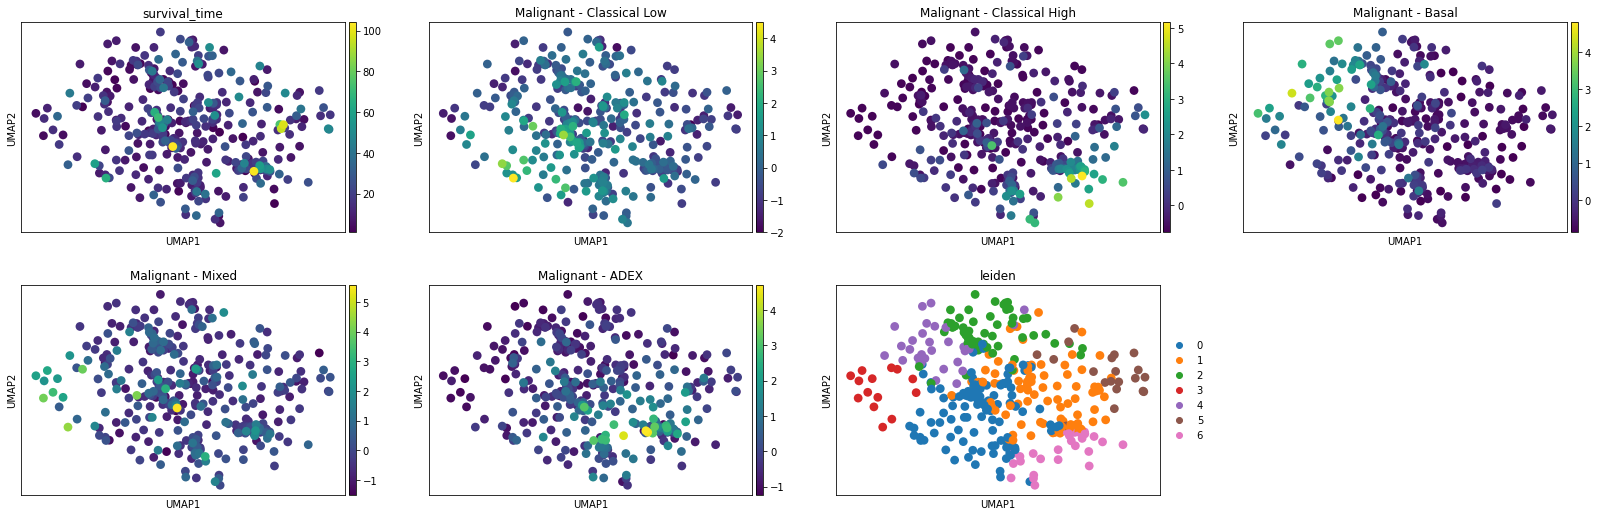

In [201]:
sc.pl.umap(integrated, color=colors)

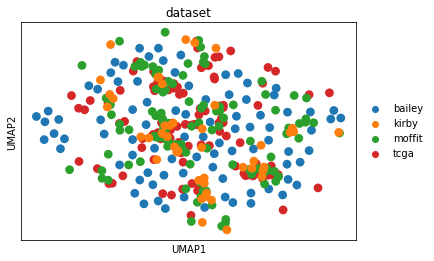

In [202]:
sc.pl.umap(integrated, color=['dataset'])

<AxesSubplot:xlabel='leiden', ylabel='count'>

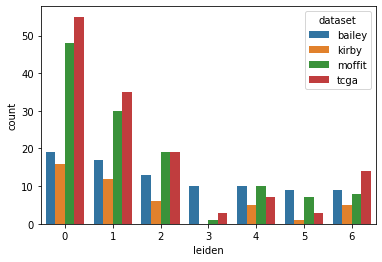

In [203]:
sns.countplot(data=integrated.obs, x='leiden', hue='dataset')

<AxesSubplot:xlabel='leiden', ylabel='survival_time'>

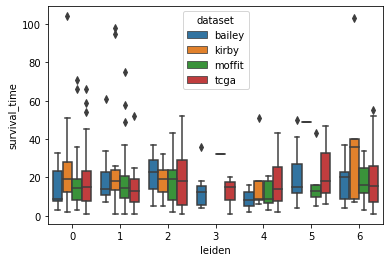

In [204]:
sns.boxplot(data=integrated.obs, x='leiden', y='survival_time', hue='dataset')

<AxesSubplot:xlabel='leiden', ylabel='survival_time'>

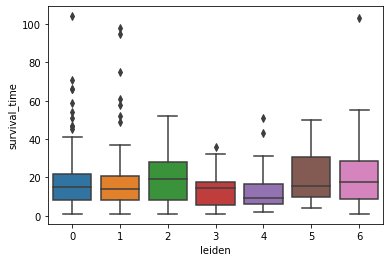

In [205]:
sns.boxplot(data=integrated.obs, x='leiden', y='survival_time')

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


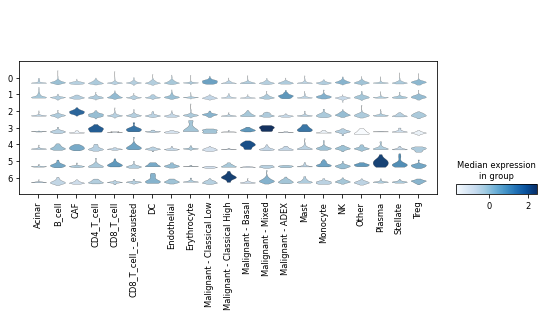

In [206]:
sc.pl.stacked_violin(integrated, groupby='leiden', var_names=integrated.var.index)

In [207]:
sc.tl.rank_genes_groups(integrated, groupby='leiden', method='wilcoxon')

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


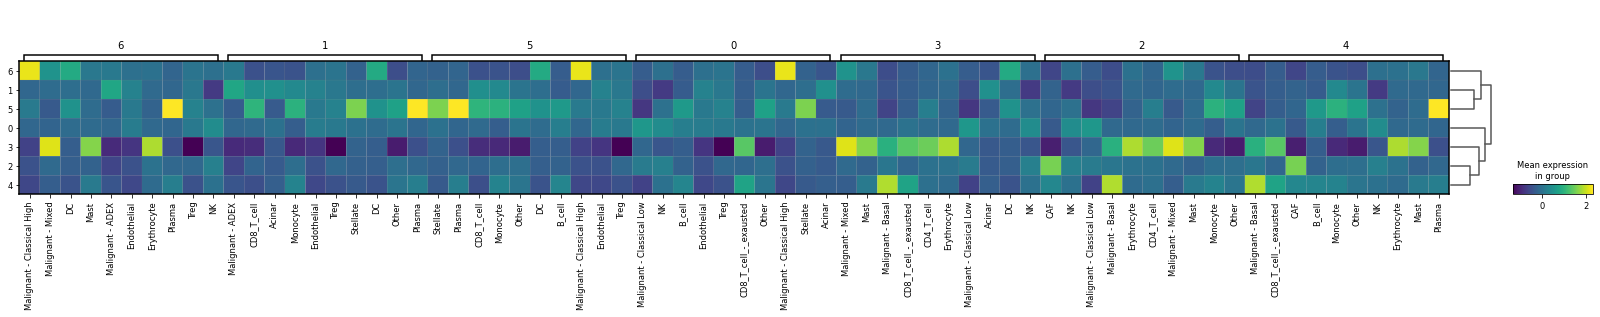

In [208]:
sc.pl.rank_genes_groups_matrixplot(integrated)

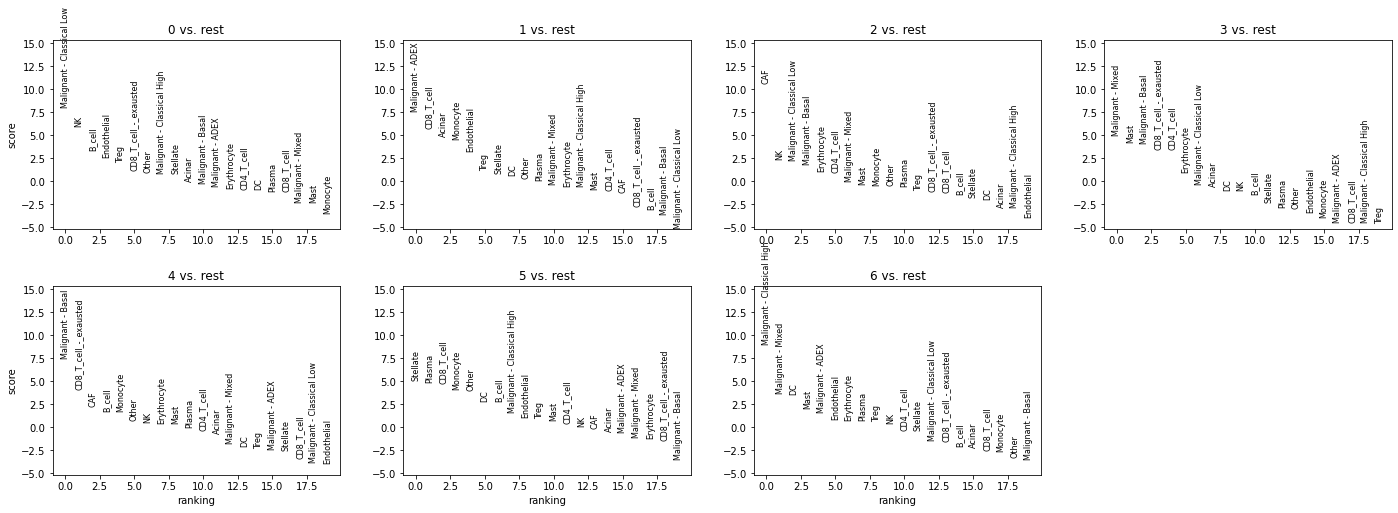

In [209]:
sc.pl.rank_genes_groups(integrated)

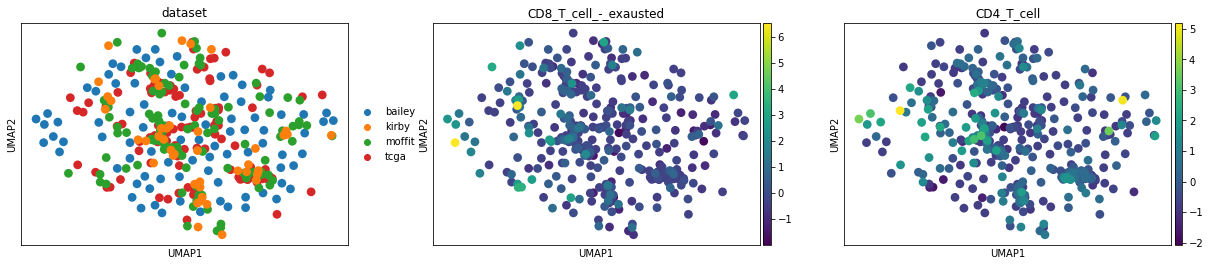

In [210]:
sc.pl.umap(integrated, color=['dataset', 'CD8_T_cell_-_exausted', 'CD4_T_cell'])

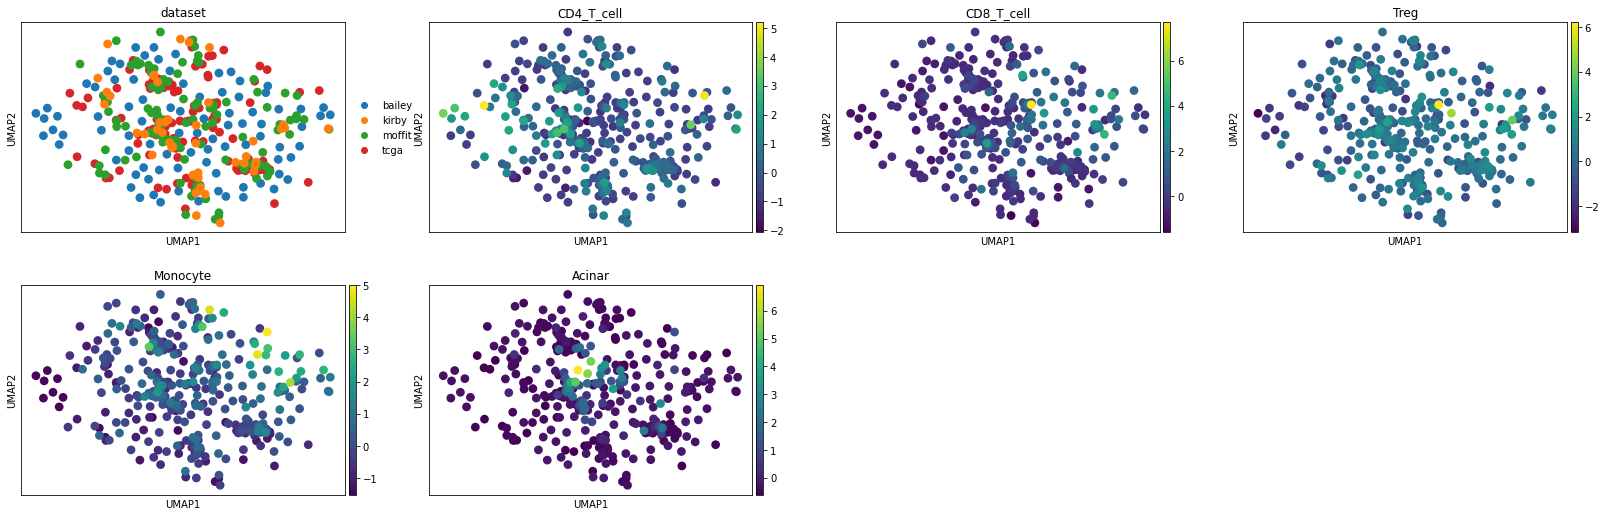

In [211]:
sc.pl.umap(integrated, color=['dataset', 'CD4_T_cell', 'CD8_T_cell', 'Treg', 'Monocyte', 'Acinar'])

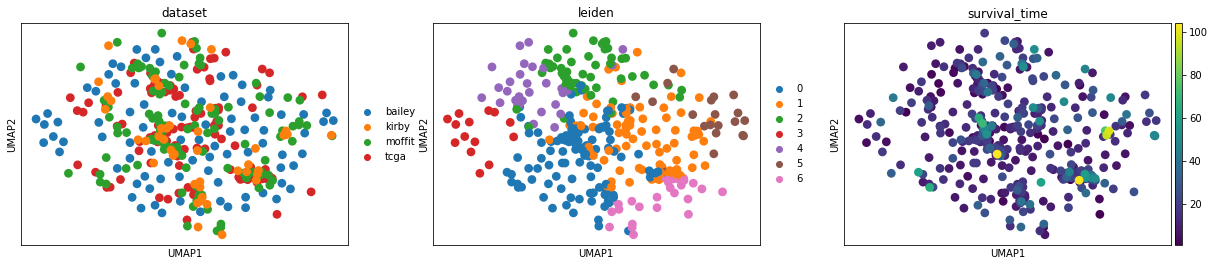

In [212]:
sc.pl.umap(integrated, color=['dataset', 'leiden', 'survival_time'])

In [213]:
list(integrated.var.index)

['Acinar',
 'B_cell',
 'CAF',
 'CD4_T_cell',
 'CD8_T_cell',
 'CD8_T_cell_-_exausted',
 'DC',
 'Endothelial',
 'Erythrocyte',
 'Malignant - Classical Low',
 'Malignant - Classical High',
 'Malignant - Basal',
 'Malignant - Mixed',
 'Malignant - ADEX',
 'Mast',
 'Monocyte',
 'NK',
 'Other',
 'Plasma',
 'Stellate',
 'Treg']

In [214]:
import seaborn as sns


<AxesSubplot:xlabel='leiden', ylabel='survival_time'>

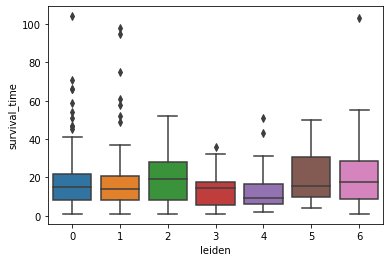

In [215]:
sns.boxplot(data=integrated.obs, x='leiden', y='survival_time')

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


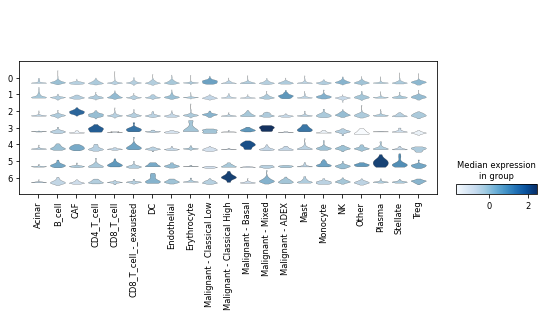

In [216]:
sc.pl.stacked_violin(integrated, groupby='leiden', var_names=integrated.var.index)

<AxesSubplot:xlabel='leiden', ylabel='count'>

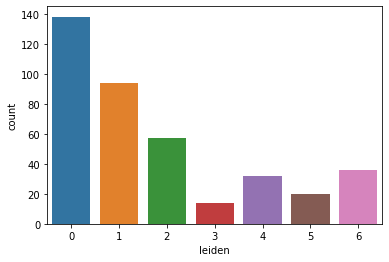

In [217]:
sns.countplot(data=integrated.obs, x='leiden')

In [124]:
integrated.obs['classification'] = ['squam' if c in ['4'] else 'classical'
                                    for c in integrated.obs['leiden']]

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


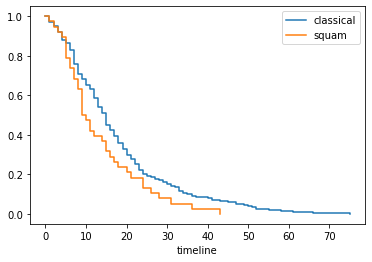

In [125]:
kmf = KaplanMeierFitter()
ft = integrated.obs.copy()
T = ft['survival_time']
E = ft['status']
groups = ft[f'classification']

for cluster in sorted(set(ft['classification'])): 
    kmf.fit(T[groups==cluster], E[groups==cluster], label=cluster)
    ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='high'], E[groups=='high'], label='high')
# ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
# ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warnin

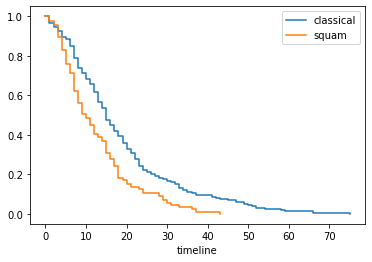

In [126]:
kmf = KaplanMeierFitter()
ft = integrated.obs.copy()
T = ft['survival_time']
E = ft['status']
ft['classification'] = ['squam' if x > .3 else 'classical' for x in integrated[:, 'Malignant - Basal'].X.flatten()]
groups = ft[f'classification']

for cluster in sorted(set(ft['classification'])): 
    kmf.fit(T[groups==cluster], E[groups==cluster], label=cluster)
    ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='high'], E[groups=='high'], label='high')
# ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
# ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 

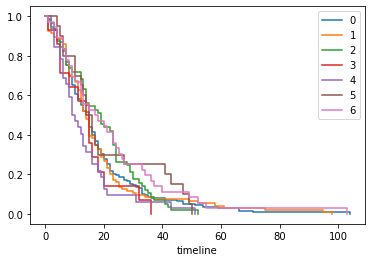

In [218]:
kmf = KaplanMeierFitter()
ft = integrated.obs.copy()
T = ft['survival_time']
E = ft['status']
groups = ft[f'leiden']

for cluster in sorted(set(ft['leiden'])): 
    kmf.fit(T[groups==cluster], E[groups==cluster], label=cluster)
    ax = kmf.plot(show_censors=True, ci_show=False, )

In [220]:
integrated.write_h5ad('../results/survival/05242021/integrated_v2.h5ad')

In [219]:
integrated.obs['age'] = [x if not pd.isnull(x) else np.nan for x in integrated.obs['age']]
integrated.obs['survival_time'] = integrated.obs['survival_time'].astype(int)
integrated.obs

age  gender     race tumor_stage  survival_time  status  \
SA518851       67.0    male  unknown     unknown              5       2   
SA528766       61.0  female  unknown     unknown              8       2   
SA528763       52.0    male  unknown     unknown             36       2   
SA518854       55.0    male  unknown     unknown              5       1   
SA518806       51.0  female  unknown     unknown             14       2   
...             ...     ...      ...         ...            ...     ...   
T_11_02_A148a  68.0    male    white     unknown             20       2   
T_11_04_A026b  64.0  female    white     unknown             49       1   
T_11_05_A018b  76.0    male    white     unknown             36       2   
T_11_06_A011a  68.0  female    white     unknown             10       2   
T_11_06_A104a  70.0    male    white     unknown              5       2   

              dataset  Malignant_0_tumor_fraction  Malignant_1_tumor_fraction  \
SA518851       bailey                    0.067734                    0.000000   
SA528766       bailey                    0.548283                    0.039154   
SA528763       bailey                    0.843169                    0.095722   
SA518854       bailey                    0.588064                    0.000000   
SA518806       bailey                    0.629661                    0.017354   
...               ...                         ...                         ...   
T_11_02_A148a   kirby                    0.414887                    0.240987   
T_11_04_A026b   kirby                    0.498230                    0.130810   
T_11_05_A018b   kirby                    0.358808                    0.379275   
T_11_06_A011a   kirby                    0.617157                    0.000000   
T_11_06_A104a   kirby                    0.480210                    0.060893   

               Malignant_2_tumor_fraction  Malignant_3_tumor_fraction  \
SA518851                         0.770468                    0.127692   
SA528766                         0.202108                    0.000000   
SA528763                         0.000000                    0.000000   
SA518854                         0.204188                    0.133946   
SA518806                         0.246252                    0.034876   
...                                   ...                         ...   
T_11_02_A148a                    0.067763                    0.186472   
T_11_04_A026b                    0.067889                    0.080138   
T_11_05_A018b                    0.076582                    0.025945   
T_11_06_A011a                    0.165348                    0.108672   
T_11_06_A104a                    0.390540                    0.000000   

               Malignant_4_tumor_fraction leiden  
SA518851                         0.034106      4  
SA528766                         0.210455      0  
SA528763                         0.061109      2  
SA518854                         0.073802      2  
SA518806                         0.071858      2  
...                                   ...    ...  
T_11_02_A148a                    0.089891      0  
T_11_04_A026b                    0.222934      5  
T_11_05_A018b                    0.159389      6  
T_11_06_A011a                    0.108823      0  
T_11_06_A104a                    0.068357      2  

[391 rows x 13 columns]

In [251]:
# result = lifelines.statistics.multivariate_logrank_test(ft['survival_time'], ft['leiden'], ft['status'])
# result.print_summary()

In [318]:
result = lifelines.statistics.pairwise_logrank_test(ft['survival_time'], ft['leiden'], ft['status'])
result.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
     test_statistic      p  -log2(p)
0 1            0.37   0.54      0.88
  2            1.24   0.26      1.92
  3            1.48   0.22      2.16
  4            2.93   0.09      3.52
  5            0.23   0.64      0.65
  6            1.00   0.32      1.65
  7            0.51   0.48      1.07
1 2            0.49   0.48      1.05
  3            0.92   0.34      1.56
  4            3.42   0.06      3.95
  5            1.63   0.20      2.31
  6            0.65   0.42      1.25
  7            1.65   0.20      2.33
2 3            0.01   0.94      0.09
  4            0.87   0.35      1.51
  5            3.59   0.06      4.10
  6            0.06   0.80      0.31
  7            3.08   0.08      3.66
3 4            0.39   0.53      0.91
  5            4.69   0.03      5.04
  6            0.13   0.72      0.47
  7            3.35   0.07      3.90
4 5            9.07 <0.005      8.59
  6            0.26   0.61      0.71
  7            6.02   0.01      6.14
5 6            2.21   0.14      2.87
  7            0.12   0.73      0.45
6 7            2.16   0.14      2.82

###### rest of survival analysis

In [77]:
from scipy.stats import pearsonr

In [78]:
from lifelines import CoxPHFitter

In [79]:
def get_cox_ph_pvalue(df, survival='survival_time', event='status'):
    cph = CoxPHFitter()
    cph.fit(df, duration_col=survival, event_col=event)
    return cph

In [80]:
cols = subtype_scores + ['survival_time', 'status']
data = combined[cols]

In [81]:
# cols = subtype_scores + ['survival_time', 'status']
cols = ['Malignant_0', 'survival_time', 'status']
data = combined[cols]
cph = CoxPHFitter()
cph.fit(data, duration_col='survival_time', event_col='status')
cph.summary

coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                    
Malignant_0  1.217169   3.377611  0.783358       -0.318185        2.752522   

             exp(coef) lower 95%  exp(coef) upper 95%         z         p  \
covariate                                                                   
Malignant_0             0.727469            15.682134  1.553784  0.120236   

             -log2(p)  
covariate              
Malignant_0  3.056059

In [84]:
# find optimal cutpoints for all columns
cox_df = None
for f in sorted(subtype_scores):
    for dataset in ['tcga', 'bailey', 'moffit', 'kirby']:
        t = combined.copy()[combined['dataset']==dataset]
        t['sample_id'] = t.index.to_list()
        
        cols = [f, 'survival_time', 'status']
        data = t[cols]
        cph = CoxPHFitter()
        cph.fit(data, duration_col='survival_time', event_col='status')
        summ = cph.summary
        summ['dataset'] = [dataset]
        if cox_df is None:
            cox_df = summ
        else:
            cox_df = pd.concat((cox_df, summ), axis=0)
cox_df
        

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['CD8_T_cell_-_exausted'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['Erythrocyte'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['Erythr

coef     exp(coef)   se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
Acinar      0.179291  1.196369e+00   0.655630       -1.105720        1.464302   
Acinar     -0.082873  9.204684e-01   1.493175       -3.009442        2.843697   
Acinar     -0.050775  9.504930e-01   0.437234       -0.907738        0.806189   
Acinar      5.527082  2.514091e+02   2.175072        1.264018        9.790145   
B_cell      2.902701  1.822330e+01   2.362219       -1.727164        7.532566   
...              ...           ...        ...             ...             ...   
Treg      -25.995206  5.133642e-12  12.838156      -51.157529       -0.832882   
U1         -2.313160  9.894804e-02   1.813097       -5.866766        1.240445   
U1          1.313434  3.718922e+00   0.983682       -0.614547        3.241415   
U1          1.250074  3.490600e+00   3.373428       -5.361724        7.861871   
U1         -4.588921  1.016382e-02   1.907912       -8.328360       -0.849481   

           exp(coef) lower 95%  exp(coef) upper 95%         z         p  \
covariate                                                                 
Acinar            3.309725e-01             4.324525  0.273464  0.784497   
Acinar            4.931919e-02            17.179157 -0.055501  0.955739   
Acinar            4.034359e-01             2.239357 -0.116127  0.907552   
Acinar            3.539617e+00         17856.890876  2.541103  0.011050   
B_cell            1.777879e-01          1867.891734  1.228802  0.219146   
...                        ...                  ...       ...       ...   
Treg              6.061323e-23             0.434794 -2.024840  0.042884   
U1                2.832017e-03             3.457152 -1.275806  0.202024   
U1                5.408856e-01            25.569876  1.335222  0.181804   
U1                4.692810e-03          2596.373814  0.370565  0.710962   
U1                2.415678e-04             0.427637 -2.405205  0.016163   

           -log2(p) dataset  
covariate                    
Acinar     0.350161    tcga  
Acinar     0.065311  bailey  
Acinar     0.139947  moffit  
Acinar     6.499764   kirby  
B_cell     2.190036    tcga  
...             ...     ...  
Treg       4.543422   kirby  
U1         2.307400    tcga  
U1         2.459546  bailey  
U1         0.492156  moffit  
U1         5.951126   kirby  

[100 rows x 11 columns]

In [85]:
cox_df.sort_values('p').head(30)

coef     exp(coef)   se(coef)  \
covariate                                                        
CD8_T_cell_-_exausted       23.445433  1.521325e+10   7.787211   
Malignant_2_tumor_fraction   1.147004  3.148745e+00   0.408437   
Monocyte                     7.087300  1.196672e+03   2.581136   
Malignant_2                  5.347388  2.100590e+02   2.054003   
Malignant_0                  5.723845  3.060797e+02   2.247240   
Acinar                       5.527082  2.514091e+02   2.175072   
U1                          -4.588921  1.016382e-02   1.907912   
Plasma                      52.829106  8.777871e+22  22.034425   
CD8_T_cell                  29.111292  4.394135e+12  12.893306   
Malignant_1_tumor_fraction  -1.217864  2.958613e-01   0.543372   
Malignant_2_tumor_fraction   0.915290  2.497500e+00   0.433128   
Stellate                   -10.525207  2.685101e-05   5.137439   
Treg                       -25.995206  5.133642e-12  12.838156   
Malignant_1_tumor_fraction  -0.912658  4.014558e-01   0.460633   
CD8_T_cell                 -16.948662  4.358023e-08   8.604748   
Stellate                    -6.860167  1.048738e-03   3.563368   
B_cell                     -11.665367  8.586095e-06   6.065238   
Mast                        85.915687  2.054512e+37  44.688368   
Malignant_2                  2.086350  8.055457e+00   1.099291   
Malignant_1                 -3.311968  3.644437e-02   1.745294   
Malignant_2                  1.267521  3.552035e+00   0.729223   
Malignant_1_tumor_fraction  -1.181231  3.069007e-01   0.753002   
NK                         -21.954218  2.920144e-10  14.030585   
Mast                        -7.581697  5.096953e-04   5.218989   
Malignant_3                 -3.338544  3.548858e-02   2.304452   
Mast                        77.755310  5.870867e+33  56.763617   
U1                           1.313434  3.718922e+00   0.983682   
Malignant_0_tumor_fraction   0.933160  2.542530e+00   0.711472   
Malignant_2_tumor_fraction   1.092819  2.982671e+00   0.840107   
U1                          -2.313160  9.894804e-02   1.813097   

                            coef lower 95%  coef upper 95%  \
covariate                                                    
CD8_T_cell_-_exausted             8.182780       38.708085   
Malignant_2_tumor_fraction        0.346482        1.947526   
Monocyte                          2.028367       12.146233   
Malignant_2                       1.321616        9.373161   
Malignant_0                       1.319335       10.128356   
Acinar                            1.264018        9.790145   
U1                               -8.328360       -0.849481   
Plasma                            9.642426       96.015786   
CD8_T_cell                        3.840876       54.381708   
Malignant_1_tumor_fraction       -2.282854       -0.152875   
Malignant_2_tumor_fraction        0.066375        1.764205   
Stellate                        -20.594403       -0.456011   
Treg                            -51.157529       -0.832882   
Malignant_1_tumor_fraction       -1.815482       -0.009834   
CD8_T_cell                      -33.813659       -0.083666   
Stellate                        -13.844240        0.123905   
B_cell                          -23.553014        0.222281   
Mast                             -1.671905      173.503279   
Malignant_2                      -0.068222        4.240921   
Malignant_1                      -6.732683        0.108746   
Malignant_2                      -0.161731        2.696772   
Malignant_1_tumor_fraction       -2.657087        0.294625   
NK                              -49.453659        5.545223   
Mast                            -17.810728        2.647333   
Malignant_3                      -7.855188        1.178099   
Mast                            -33.499335      189.009956   
U1                               -0.614547        3.241415   
Malignant_0_tumor_fraction       -0.461301        2.327620   
Malignant_2_tumor_fraction       -0.553761        2.739399  

In [268]:
# find optimal cutpoints for all columns
cox_df = None
for f in sorted(subtype_scores):
    for dataset in ['tcga', 'bailey']:
        t = combined.copy()[combined['dataset']==dataset]
        t = t[t['Malignant_0_tumor_fraction']<=.28]
        t['sample_id'] = t.index.to_list()
        
        cols = [f, 'survival_time', 'status']
        data = t[cols]
        cph = CoxPHFitter()
        cph.fit(data, duration_col='survival_time', event_col='status')
        summ = cph.summary
        summ['dataset'] = [dataset]
        if cox_df is None:
            cox_df = summ
        else:
            cox_df = pd.concat((cox_df, summ), axis=0)
cox_df
        

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['CD8_T_cell'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['Endocrine'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['Endocrine'] have ve

coef     exp(coef)    se(coef)  \
covariate                                                          
Acinar                       -0.314869  7.298846e-01    1.366697   
Acinar                        1.294534  3.649295e+00    2.009755   
B_cell                        0.591760  1.807166e+00    5.133647   
B_cell                       -7.595262  5.028284e-04    8.339260   
CD4_T_cell                    7.435275  1.694723e+03    6.872525   
CD4_T_cell                    3.493887  3.291362e+01    3.078138   
CD8_T_cell                    7.295468  1.473607e+03   10.888261   
CD8_T_cell                  166.194121  1.503799e+72   95.662345   
DC                           -2.572542  7.634122e-02    4.807275   
DC                           -3.108804  4.465434e-02   10.018048   
Endocrine                   184.177688  9.713001e+79   94.467657   
Endocrine                    55.273328  1.011349e+24   89.758903   
Endothelial                   2.051335  7.778277e+00    4.347537   
Endothelial                  -2.212429  1.094346e-01    8.344803   
Erythrocyte                   8.638872  5.646959e+03  144.748612   
Erythrocyte                  95.086244  1.974382e+41   96.086237   
Fibroblast                    0.088784  1.092844e+00    1.061740   
Fibroblast                   -1.291658  2.748147e-01    1.718917   
Malignant_0                   1.660171  5.260211e+00    2.332270   
Malignant_0                   7.275230  1.444083e+03    4.352026   
Malignant_0_tumor_fraction    1.686206  5.398956e+00    1.630553   
Malignant_0_tumor_fraction    3.235847  2.542790e+01    2.058018   
Malignant_1                  -0.923913  3.969627e-01    2.651070   
Malignant_1                  -0.583305  5.580510e-01    4.840281   
Malignant_1_tumor_fraction   -0.225863  7.978275e-01    0.944928   
Malignant_1_tumor_fraction    0.210624  1.234448e+00    1.879496   
Malignant_2                  -0.662704  5.154558e-01    4.818145   
Malignant_2                  -0.636985  5.288847e-01    2.615052   
Malignant_2_tumor_fraction    0.281601  1.325250e+00    1.039012   
Malignant_2_tumor_fraction   -0.393550  6.746574e-01    1.435004   
Malignant_3                  -1.889991  1.510732e-01    2.634296   
Malignant_3                   2.326262  1.023959e+01    2.164445   
Malignant_3_tumor_fraction   -2.405854  9.018847e-02    1.505350   
Malignant_3_tumor_fraction    0.345133  1.412178e+00    0.914615   
Malignant_4                   0.333711  1.396139e+00    1.168559   
Malignant_4                  -0.534217  5.861281e-01    1.258415   
Malignant_4_tumor_fraction    0.522735  1.686634e+00    1.024761   
Malignant_4_tumor_fraction   -0.495274  6.094039e-01    0.705037   
Mast                         25.594426  1.304722e+11   17.202383   
Mast                         67.911837  3.116993e+29   48.440285   
Monocyte                     -2.519336  8.051308e-02    3.456744   
Monocyte                     -2.697263  6.738973e-02    5.271871   
NK                            1.848297  6.348999e+00   11.949514   
NK                           -1.674282  1.874426e-01    4.351714   
Plasma                       -5.302116  4.981045e-03    7.216336   
Plasma                        6.499882  6.650633e+02   13.229442   
Stellate                      0.533986  1.705719e+00    4.559451   
Stellate                     -5.812913  2.988711e-03    5.534742   

                            coef lower 95%  coef upper 95%  \
covariate                                                    
Acinar                           -2.993546        2.363808   
Acinar                           -2.644512        5.233580   
B_cell                           -9.470004       10.653523   
B_cell                          -23.939910        8.749387   
CD4_T_cell                       -6.034626       20.905176   
CD4_T_cell                       -2.539153        9.526927   
CD8_T_cell                      -14.045130       28.636067   
CD8_T_cell                      -21.300631      353.688873   
DC           

In [269]:
cox_df.sort_values('p')

coef     exp(coef)    se(coef)  \
covariate                                                          
Endocrine                   184.177688  9.713001e+79   94.467657   
CD8_T_cell                  166.194121  1.503799e+72   95.662345   
Malignant_0                   7.275230  1.444083e+03    4.352026   
Malignant_3_tumor_fraction   -2.405854  9.018847e-02    1.505350   
Malignant_0_tumor_fraction    3.235847  2.542790e+01    2.058018   
Mast                         25.594426  1.304722e+11   17.202383   
Mast                         67.911837  3.116993e+29   48.440285   
CD4_T_cell                    3.493887  3.291362e+01    3.078138   
CD4_T_cell                    7.435275  1.694723e+03    6.872525   
Malignant_3                   2.326262  1.023959e+01    2.164445   
Stellate                     -5.812913  2.988711e-03    5.534742   
Malignant_0_tumor_fraction    1.686206  5.398956e+00    1.630553   
Erythrocyte                  95.086244  1.974382e+41   96.086237   
B_cell                       -7.595262  5.028284e-04    8.339260   
Fibroblast                   -1.291658  2.748147e-01    1.718917   
Plasma                       -5.302116  4.981045e-03    7.216336   
Monocyte                     -2.519336  8.051308e-02    3.456744   
Malignant_3                  -1.889991  1.510732e-01    2.634296   
Malignant_0                   1.660171  5.260211e+00    2.332270   
Malignant_4_tumor_fraction   -0.495274  6.094039e-01    0.705037   
CD8_T_cell                    7.295468  1.473607e+03   10.888261   
Acinar                        1.294534  3.649295e+00    2.009755   
Endocrine                    55.273328  1.011349e+24   89.758903   
DC                           -2.572542  7.634122e-02    4.807275   
Monocyte                     -2.697263  6.738973e-02    5.271871   
Malignant_4_tumor_fraction    0.522735  1.686634e+00    1.024761   
Plasma                        6.499882  6.650633e+02   13.229442   
Endothelial                   2.051335  7.778277e+00    4.347537   
Malignant_4                  -0.534217  5.861281e-01    1.258415   
NK                           -1.674282  1.874426e-01    4.351714   
Malignant_3_tumor_fraction    0.345133  1.412178e+00    0.914615   
Malignant_1                  -0.923913  3.969627e-01    2.651070   
DC                           -3.108804  4.465434e-02   10.018048   
Malignant_4                   0.333711  1.396139e+00    1.168559   
Malignant_2_tumor_fraction   -0.393550  6.746574e-01    1.435004   
Malignant_2_tumor_fraction    0.281601  1.325250e+00    1.039012   
Endothelial                  -2.212429  1.094346e-01    8.344803   
Malignant_2                  -0.636985  5.288847e-01    2.615052   
Malignant_1_tumor_fraction   -0.225863  7.978275e-01    0.944928   
Acinar                       -0.314869  7.298846e-01    1.366697   
NK                            1.848297  6.348999e+00   11.949514   
Malignant_2                  -0.662704  5.154558e-01    4.818145   
Malignant_1                  -0.583305  5.580510e-01    4.840281   
Stellate                      0.533986  1.705719e+00    4.559451   
B_cell                        0.591760  1.807166e+00    5.133647   
Malignant_1_tumor_fraction    0.210624  1.234448e+00    1.879496   
Fibroblast                    0.088784  1.092844e+00    1.061740   
Erythrocyte                   8.638872  5.646959e+03  144.748612   

                            coef lower 95%  coef upper 95%  \
covariate                                                    
Endocrine                        -0.975519      369.330894   
CD8_T_cell                      -21.300631      353.688873   
Malignant_0                      -1.254585       15.805045   
Malignant_3_tumor_fraction       -5.356286        0.544579   
Malignant_0_tumor_fraction       -0.797793        7.269487   
Mast                             -8.121626       59.310478   
Mast                            -27.029377      162.853050   
CD4_T_cell                       -2.539153        9.526927   
CD4_T_cell   

In [75]:
def get_pvals(df, cuts, field):
    pvals = []
    for cut in cuts:
        l1, l2 = df[df[field]<cut], df[df[field]>=cut]
        results = logrank_test(l1['survival_time'], l2['survival_time'],
                               event_observed_A=l1['status'], event_observed_B=l2['status'])
        pvals.append(results.p_value)
    return pd.DataFrame.from_dict({
        'cutpoint': cuts,
        'p-value': pvals
    })

def marked_survival_chart(survival, field, steps=100):
    r = max(survival[field]) - min(survival[field])
    df = get_pvals(survival,
#                    np.asarray(range(-200, 200, steps)) / steps, field)
        np.asarray(range(-200, 200, 2)) / steps, field)
    df[field] = df['cutpoint'].to_list()
    
    c1 = alt.Chart(df).mark_line().encode(
        y=field,
        x='p-value',
        order=field
    #     tooltip='p-value'
    )
    marks = alt.Chart(df).mark_circle().encode(
        y=field,
        x='p-value',
        tooltip=['p-value', 'cutpoint']
    )
    return c1 + marks

In [76]:
# find optimal cutpoints for all columns
data = []
for f in sorted(subtype_scores):
    for dataset in ['tcga', 'bailey']:
        t = combined.copy()[combined['dataset']==dataset]
        t['sample_id'] = t.index.to_list()

        df = get_pvals(t,
            np.asarray(range(0, 100, 1)) / 100, f)
        cutpoint = df.iloc[np.argmin(df['p-value']), 0]
        corr, _ = pearsonr(t[f], t['survival_time'])
        data.append([dataset, f, cutpoint, np.min(df['p-value']), corr])
        print(dataset, f, cutpoint, np.min(df['p-value']), corr)
df = pd.DataFrame(data=data, columns=['dataset', 'cell_type', 'cutpoint', 'p-value', 'correlation'])

tcga Acinar 0.29 0.22680216388829527 -0.032970710024120276
bailey Acinar 0.05 0.5265441295508106 0.0151170633412658
tcga B_cell 0.07 0.1618061104447594 -0.10008996206648343
bailey B_cell 0.08 0.024959033856987934 -0.03307864031731098
tcga CAF_1 0.46 0.00025305430911172315 -0.001384731812296581
bailey CAF_1 0.02 0.18764452033841234 0.08404638186208786
tcga CAF_2 0.14 0.3210776234599576 0.007449721737482406
bailey CAF_2 0.02 0.0003835353629837012 0.006347838499783198
tcga CD4_T_cell 0.08 0.41191363218800914 0.02438368234204339
bailey CD4_T_cell 0.01 0.006405099312439223 0.10536803885893307
tcga CD8_T_cell 0.03 0.29537509936142325 -0.035962829943838426
bailey CD8_T_cell 0.03 0.03412132116590517 0.28967600215372924
tcga CD8_T_cell_-_exausted 0.02 0.24373204184837188 -0.004011542113519531
bailey CD8_T_cell_-_exausted 0.05 8.330523690559156e-05 -0.28276244640815557
tcga DC 0.09 0.00025305430911172315 0.05665166457313231
bailey DC 0.07 0.052201266890335 0.039323374687165194
tcga Endothelial 0

In [112]:
df

dataset                   cell_type  cutpoint   p-value  correlation
0     tcga                      Acinar      0.07  0.222543    -0.019193
1   bailey                      Acinar      0.05  0.549498    -0.003702
2     tcga                      B_cell      0.03  0.190008    -0.024357
3   bailey                      B_cell      0.03  0.084076     0.153673
4     tcga                  CD4_T_cell      0.04  0.267082    -0.051335
5   bailey                  CD4_T_cell      0.20  0.001976    -0.236534
6     tcga                  CD8_T_cell      0.02  0.072818    -0.129550
7   bailey                  CD8_T_cell      0.05  0.000044    -0.244512
8     tcga                          DC      0.10  0.233275    -0.042751
9   bailey                          DC      0.05  0.185815     0.133715
10    tcga                   Endocrine      0.99       NaN    -0.080180
11  bailey                   Endocrine      0.99       NaN    -0.008941
12    tcga                 Endothelial      0.12  0.135455    -0.051133
13  bailey                 Endothelial      0.07  0.258691    -0.036094
14    tcga                 Erythrocyte      0.01  0.614754     0.069423
15  bailey                 Erythrocyte      0.01  0.288432    -0.045141
16    tcga                  Fibroblast      0.57  0.000253    -0.037090
17  bailey                  Fibroblast      0.11  0.166735     0.054532
18    tcga                 Malignant_0      0.30  0.000337    -0.123663
19  bailey                 Malignant_0      0.13  0.000368    -0.255285
20    tcga  Malignant_0_tumor_fraction      0.56  0.001372    -0.193488
21  bailey  Malignant_0_tumor_fraction      0.13  0.000462    -0.325079
22    tcga                 Malignant_1      0.02  0.028937     0.063601
23  bailey                 Malignant_1      0.11  0.074597    -0.061413
24    tcga  Malignant_1_tumor_fraction      0.03  0.026162     0.060749
25  bailey  Malignant_1_tumor_fraction      0.10  0.101173    -0.057602
26    tcga                 Malignant_2      0.06  0.061362     0.123244
27  bailey                 Malignant_2      0.38  0.000384    -0.060242
28    tcga  Malignant_2_tumor_fraction      0.04  0.175194     0.025104
29  bailey  Malignant_2_tumor_fraction      0.60  0.000384    -0.046861
30    tcga                 Malignant_3      0.02  0.103226     0.084802
31  bailey                 Malignant_3      0.27  0.000384    -0.047440
32    tcga  Malignant_3_tumor_fraction      0.02  0.010265     0.120234
33  bailey  Malignant_3_tumor_fraction      0.39  0.243665    -0.003232
34    tcga                 Malignant_4      0.02  0.080447     0.062937
35  bailey                 Malignant_4      0.06  0.001086     0.296962
36    tcga  Malignant_4_tumor_fraction      0.05  0.000253     0.069378
37  bailey  Malignant_4_tumor_fraction      0.24  0.000058     0.358941
38    tcga                        Mast      0.02  0.216586    -0.064088
39  bailey                        Mast      0.01  0.389878    -0.078032
40    tcga                    Monocyte      0.07  0.044442     0.037333
41  bailey                    Monocyte      0.08  0.182769     0.041659
42    tcga                          NK      0.06  0.265832     0.079210
43  bailey                          NK      0.01  0.002806     0.243374
44    tcga                      Plasma      0.01  0.306899     0.064209
45  bailey                      Plasma      0.02  0.517386     0.077892
46    tcga                    Stellate      0.08  0.165141     0.080846
47  bailey                    Stellate      0.09  0.095984     0.227037

In [114]:
df.sort_values('p-value')

dataset                   cell_type  cutpoint   p-value  correlation
7   bailey                  CD8_T_cell      0.05  0.000044    -0.244512
37  bailey  Malignant_4_tumor_fraction      0.24  0.000058     0.358941
36    tcga  Malignant_4_tumor_fraction      0.05  0.000253     0.069378
16    tcga                  Fibroblast      0.57  0.000253    -0.037090
18    tcga                 Malignant_0      0.30  0.000337    -0.123663
19  bailey                 Malignant_0      0.13  0.000368    -0.255285
27  bailey                 Malignant_2      0.38  0.000384    -0.060242
31  bailey                 Malignant_3      0.27  0.000384    -0.047440
29  bailey  Malignant_2_tumor_fraction      0.60  0.000384    -0.046861
21  bailey  Malignant_0_tumor_fraction      0.13  0.000462    -0.325079
35  bailey                 Malignant_4      0.06  0.001086     0.296962
20    tcga  Malignant_0_tumor_fraction      0.56  0.001372    -0.193488
5   bailey                  CD4_T_cell      0.20  0.001976    -0.236534
43  bailey                          NK      0.01  0.002806     0.243374
32    tcga  Malignant_3_tumor_fraction      0.02  0.010265     0.120234
24    tcga  Malignant_1_tumor_fraction      0.03  0.026162     0.060749
22    tcga                 Malignant_1      0.02  0.028937     0.063601
40    tcga                    Monocyte      0.07  0.044442     0.037333
26    tcga                 Malignant_2      0.06  0.061362     0.123244
6     tcga                  CD8_T_cell      0.02  0.072818    -0.129550
23  bailey                 Malignant_1      0.11  0.074597    -0.061413
34    tcga                 Malignant_4      0.02  0.080447     0.062937
3   bailey                      B_cell      0.03  0.084076     0.153673
47  bailey                    Stellate      0.09  0.095984     0.227037
25  bailey  Malignant_1_tumor_fraction      0.10  0.101173    -0.057602
30    tcga                 Malignant_3      0.02  0.103226     0.084802
12    tcga                 Endothelial      0.12  0.135455    -0.051133
46    tcga                    Stellate      0.08  0.165141     0.080846
17  bailey                  Fibroblast      0.11  0.166735     0.054532
28    tcga  Malignant_2_tumor_fraction      0.04  0.175194     0.025104
41  bailey                    Monocyte      0.08  0.182769     0.041659
9   bailey                          DC      0.05  0.185815     0.133715
2     tcga                      B_cell      0.03  0.190008    -0.024357
38    tcga                        Mast      0.02  0.216586    -0.064088
0     tcga                      Acinar      0.07  0.222543    -0.019193
8     tcga                          DC      0.10  0.233275    -0.042751
33  bailey  Malignant_3_tumor_fraction      0.39  0.243665    -0.003232
13  bailey                 Endothelial      0.07  0.258691    -0.036094
42    tcga                          NK      0.06  0.265832     0.079210
4     tcga                  CD4_T_cell      0.04  0.267082    -0.051335
15  bailey                 Erythrocyte      0.01  0.288432    -0.045141
44    tcga                      Plasma      0.01  0.306899     0.064209
39  bailey                        Mast      0.01  0.389878    -0.078032
45  bailey                      Plasma      0.02  0.517386     0.077892
1   bailey                      Acinar      0.05  0.549498    -0.003702
14    tcga                 Erythrocyte      0.01  0.614754     0.069423
10    tcga                   Endocrine      0.99       NaN    -0.080180
11  bailey                   Endocrine      0.99       NaN    -0.008941

In [231]:
df

dataset                   cell_type  cutpoint   p-value  correlation
0     tcga                      Acinar      0.07  0.222543    -0.019193
1   bailey                      Acinar      0.05  0.549498    -0.003702
2     tcga                      B_cell      0.03  0.190008    -0.024357
3   bailey                      B_cell      0.03  0.084076     0.153673
4     tcga                  CD4_T_cell      0.04  0.267082    -0.051335
5   bailey                  CD4_T_cell      0.20  0.001976    -0.236534
6     tcga                  CD8_T_cell      0.02  0.072818    -0.129550
7   bailey                  CD8_T_cell      0.05  0.000044    -0.244512
8     tcga                          DC      0.10  0.233275    -0.042751
9   bailey                          DC      0.05  0.185815     0.133715
10    tcga                   Endocrine      0.99       NaN    -0.080180
11  bailey                   Endocrine      0.99       NaN    -0.008941
12    tcga                 Endothelial      0.12  0.135455    -0.051133
13  bailey                 Endothelial      0.07  0.258691    -0.036094
14    tcga                 Erythrocyte      0.01  0.614754     0.069423
15  bailey                 Erythrocyte      0.01  0.288432    -0.045141
16    tcga                  Fibroblast      0.57  0.000253    -0.037090
17  bailey                  Fibroblast      0.11  0.166735     0.054532
18    tcga                 Malignant_0      0.30  0.000337    -0.123663
19  bailey                 Malignant_0      0.13  0.000368    -0.255285
20    tcga  Malignant_0_tumor_fraction      0.56  0.001372    -0.193488
21  bailey  Malignant_0_tumor_fraction      0.13  0.000462    -0.325079
22    tcga                 Malignant_1      0.02  0.028937     0.063601
23  bailey                 Malignant_1      0.11  0.074597    -0.061413
24    tcga  Malignant_1_tumor_fraction      0.03  0.026162     0.060749
25  bailey  Malignant_1_tumor_fraction      0.10  0.101173    -0.057602
26    tcga                 Malignant_2      0.06  0.061362     0.123244
27  bailey                 Malignant_2      0.38  0.000384    -0.060242
28    tcga  Malignant_2_tumor_fraction      0.04  0.175194     0.025104
29  bailey  Malignant_2_tumor_fraction      0.60  0.000384    -0.046861
30    tcga                 Malignant_3      0.02  0.103226     0.084802
31  bailey                 Malignant_3      0.27  0.000384    -0.047440
32    tcga  Malignant_3_tumor_fraction      0.02  0.010265     0.120234
33  bailey  Malignant_3_tumor_fraction      0.39  0.243665    -0.003232
34    tcga                 Malignant_4      0.02  0.080447     0.062937
35  bailey                 Malignant_4      0.06  0.001086     0.296962
36    tcga  Malignant_4_tumor_fraction      0.05  0.000253     0.069378
37  bailey  Malignant_4_tumor_fraction      0.24  0.000058     0.358941
38    tcga                        Mast      0.02  0.216586    -0.064088
39  bailey                        Mast      0.01  0.389878    -0.078032
40    tcga                    Monocyte      0.07  0.044442     0.037333
41  bailey                    Monocyte      0.08  0.182769     0.041659
42    tcga                          NK      0.06  0.265832     0.079210
43  bailey                          NK      0.01  0.002806     0.243374
44    tcga                      Plasma      0.01  0.306899     0.064209
45  bailey                      Plasma      0.02  0.517386     0.077892
46    tcga                    Stellate      0.08  0.165141     0.080846
47  bailey                    Stellate      0.09  0.095984     0.227037

In [233]:
import altair as alt
alt.Chart(df).mark_rect().encode(
    x='cell_type:O',
    y='dataset:O',
    color='p-value:Q'
)

alt.Chart(...)

In [115]:
t = combined.copy()
t['sample_id'] = t.index.to_list()

chart = alt.Chart(t).mark_circle().encode(
    x='survival_time',
    y='Malignant_4_tumor_fraction',
    color='dataset',
    tooltip=['sample_id', 'tumor_stage'],
)
c1 = chart + chart.transform_regression('survival_time', 'Malignant_4_tumor_fraction',
                                        groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

In [197]:
t = combined.copy()
t['sample_id'] = t.index.to_list()
t = t[t['CD8_T_cell']>.005]

chart = alt.Chart(t).mark_circle().encode(
    x='survival_time',
    y='CD8_T_cell',
    color='dataset',
    tooltip=['sample_id', 'tumor_stage'],
)
c1 = chart + chart.transform_regression('survival_time', 'CD8_T_cell',
                                        groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

In [129]:
t = combined.copy()
t['sample_id'] = t.index.to_list()

chart = alt.Chart(t).mark_circle().encode(
    x='survival_time',
    y='NK',
    color='dataset',
    tooltip=['sample_id', 'tumor_stage'],
)
c1 = chart + chart.transform_regression('survival_time', 'NK',
                                        groupby=['dataset']).mark_line()
c1

alt.LayerChart(...)

<AxesSubplot:xlabel='Malignant_0_tumor_fraction', ylabel='Malignant_4_tumor_fraction'>

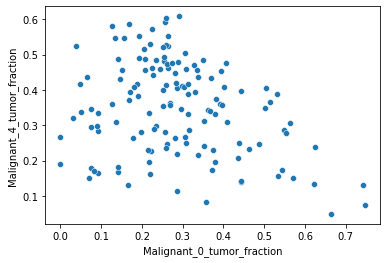

In [117]:
t = combined.copy()
t['sample_id'] = t.index.to_list()
t = t[t['dataset']=='tcga']
sns.scatterplot(x='Malignant_0_tumor_fraction', y='Malignant_4_tumor_fraction', data=t)

<AxesSubplot:xlabel='Malignant_0_tumor_fraction', ylabel='NK'>

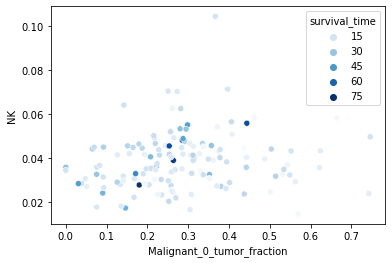

In [138]:
t = combined.copy()
t['sample_id'] = t.index.to_list()
t = t[t['dataset']=='tcga']
t['survival_time'] = t['survival_time'].astype(np.float32)
sns.scatterplot(x='Malignant_0_tumor_fraction', y='NK', data=t, hue='survival_time', palette='Blues')

In [265]:


# t = combined[combined['survival_time']<=14].copy()
t = combined.copy()
t = t[t['dataset']=='bailey']
f = 'Malignant_0_tumor_fraction'

c1 = marked_survival_chart(t, f)

c2 = alt.Chart(t).mark_circle().encode(
    y=f,
    x='survival_time',
    color='dataset',
#     tooltip=['sample_id', 'tumor_stage'],
)
c2 = c2 + c2.transform_regression('survival_time', f, groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [267]:


# t = combined[combined['survival_time']<=14].copy()
t = combined.copy()
t = t[t['dataset']=='bailey']
f = 'NK'
t = t[t['Malignant_0_tumor_fraction']<=.24]


c1 = marked_survival_chart(t, f)

c2 = alt.Chart(t).mark_circle().encode(
    y=f,
    x='survival_time',
    color='dataset',
#     tooltip=['sample_id', 'tumor_stage'],
)
c2 = c2 + c2.transform_regression('survival_time', f, groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [261]:
t = combined.copy()
t = t[t['dataset']=='tcga']
t = t[t['survival_time']<51]
f = 'Malignant_0_tumor_fraction'

c1 = marked_survival_chart(t, f)

c2 = alt.Chart(t).mark_circle().encode(
    y=f,
    x='survival_time',
    color='dataset',
#     tooltip=['sample_id', 'tumor_stage'],
)
c2 = c2 + c2.transform_regression('survival_time', f, groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [252]:
t = combined.copy()
t = t[t['dataset']=='bailey']
# t = t[t['survival_time']<51]
f = 'NK'

c1 = marked_survival_chart(t, f, steps=400)

c2 = alt.Chart(t).mark_circle().encode(
    y=f,
    x='survival_time',
    color='dataset',
#     tooltip=['sample_id', 'tumor_stage'],
)
c2 = c2 + c2.transform_regression('survival_time', f, groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [256]:
t = combined.copy()
t = t[t['dataset']=='tcga']
# t = t[t['survival_time']<51]
f = 'NK'

c1 = marked_survival_chart(t, f, steps=400)

c2 = alt.Chart(t).mark_circle().encode(
    y=f,
    x='survival_time',
    color='dataset',
#     tooltip=['sample_id', 'tumor_stage'],
)
c2 = c2 + c2.transform_regression('survival_time', f, groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [81]:
t = combined.copy()
t = t[t['dataset']=='moffit']
# t = t[t['survival_time']<51]
f = 'Malignant_0_tumor_fraction'

c1 = marked_survival_chart(t, f)

c2 = alt.Chart(t).mark_circle().encode(
    y=f,
    x='survival_time',
    color='dataset',
#     tooltip=['sample_id', 'tumor_stage'],
)
c2 = c2 + c2.transform_regression('survival_time', f, groupby=['dataset']).mark_line()


(c2 | c1).resolve_scale(y='shared')

alt.HConcatChart(...)

In [98]:
t = combined.copy()
t = t[t['dataset']=='tcga']
f = 'Malignant_0_tumor_fraction'
t['sample_id'] = t.index.to_list()

df = get_pvals(t,
    np.asarray(range(0, 100, 1)) / 100, f)
cutpoint = df.iloc[np.argmin(df['p-value']), 0]

t[f'{f}_bin'] = ['low' if x < cutpoint else 'high' for x in t[f]]
t

NK  Malignant_4  CD4_T_cell    B_cell  Malignant_2  \
TCGA-2J-AAB6  0.035492     0.065872    0.015851  0.001491     0.114766   
TCGA-2J-AAB8  0.033462     0.248544    0.060285  0.014693     0.050451   
TCGA-2J-AAB9  0.040106     0.074135    0.029329  0.027327     0.047729   
TCGA-2J-AABA  0.027380     0.248008    0.062179  0.012053     0.027225   
TCGA-2J-AABE  0.041630     0.217444    0.044870  0.021730     0.036311   
...                ...          ...         ...       ...          ...   
TCGA-XN-A8T3  0.045568     0.030562    0.020118  0.036410     0.085183   
TCGA-XN-A8T5  0.041184     0.075778    0.048425  0.070115     0.061219   
TCGA-YB-A89D  0.034564     0.204069    0.047086  0.011891     0.061190   
TCGA-YY-A8LH  0.045395     0.387470    0.039257  0.005050     0.054282   
TCGA-Z5-AAPL  0.104349     0.052529    0.122496  0.174376     0.038791   

              Stellate  Monocyte  Fibroblast  Endothelial      Mast  ...  \
TCGA-2J-AAB6  0.002007  0.102668    0.290156     0.053981  0.000000  ...   
TCGA-2J-AAB8  0.016094  0.006762    0.370873     0.045296  0.000000  ...   
TCGA-2J-AAB9  0.016551  0.022461    0.245273     0.086991  0.000000  ...   
TCGA-2J-AABA  0.000000  0.000000    0.341378     0.070039  0.000000  ...   
TCGA-2J-AABE  0.000545  0.027876    0.307768     0.058406  0.002543  ...   
...                ...       ...         ...          ...       ...  ...   
TCGA-XN-A8T3  0.021925  0.024416    0.314661     0.077140  0.000000  ...   
TCGA-XN-A8T5  0.052603  0.000000    0.309303     0.133351  0.024295  ...   
TCGA-YB-A89D  0.001354  0.032741    0.364291     0.063783  0.000000  ...   
TCGA-YY-A8LH  0.000000  0.000000    0.026365     0.057531  0.003437  ...   
TCGA-Z5-AAPL  0.039945  0.026574    0.077293     0.086549  0.000000  ...   

              Malignant_0_tumor_fraction  age  gender   race  tumor_stage  \
TCGA-2J-AAB6                    0.622094   75    male  white    stage iia   
TCGA-2J-AAB8                    0.257370   71    male  white    stage iib   
TCGA-2J-AAB9                    0.378064   71  female  white    stage iib   
TCGA-2J-AABA                    0.258054   55    male  white    stage iib   
TCGA-2J-AABE                    0.253592   73    male  white    stage iia   
...                                  ...  ...     ...    ...          ...   
TCGA-XN-A8T3                    0.356857   67    male  white     stage ib   
TCGA-XN-A8T5                    0.311959   53  female  white     stage ib   
TCGA-YB-A89D                    0.220520   59    male  white    stage iib   
TCGA-YY-A8LH                    0.253614   61  female  white    stage iib   
TCGA-Z5-AAPL                    0.366471   74  female  white    stage iia   

              survival_time  status  dataset     sample_id  \
TCGA-2J-AAB6              9       2     tcga  TCGA-2J-AAB6   
TCGA-2J-AAB8              2       1     tcga  TCGA-2J-AAB8   
TCGA-2J-AAB9             20       2     tcga  TCGA-2J-AAB9   
TCGA-2J-AABA             19       2     tcga  TCGA-2J-AABA   
TCGA-2J-AABE             22       1     tcga  TCGA-2J-AABE   
...                     ...     ...      ...           ...   
TCGA-XN-A8T3             31       1     tcga  TCGA-XN-A8T3   
TCGA-XN-A8T5             23       1     tcga  TCGA-XN-A8T5   
TCGA-YB-A89D             11       1     tcga  TCGA-YB-A89D   
TCGA-YY-A8LH             66       1     tcga  TCGA-YY-A8LH   
TCGA-Z5-AAPL             15       1     tcga  TCGA-Z5-AAPL   

              Malignant_0_tumor_fraction_bin  
TCGA-2J-AAB6                            high  
TCGA-2J-AAB8                             low  
TCGA-2J-AAB9                             low  
TCGA-2J-AABA                             low  
TCGA-2J-AABE                             low  
...                                      ...  
TCGA-XN-A8T3                             low  
TCGA-XN-A8T5                             low  
TCGA-YB-A89D                             low  
TCGA-YY-A8LH                             low  
TCGA-Z5-AAPL                   

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


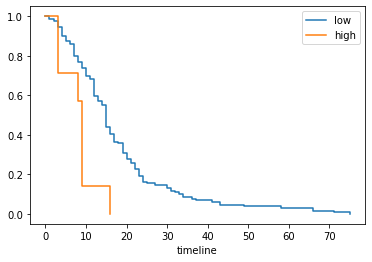

In [99]:
kmf = KaplanMeierFitter()
ft = t[t['dataset']=='tcga']
T = ft['survival_time']
E = ft['status']
groups = ft[f'{f}_bin']

kmf.fit(T[groups=='low'], E[groups=='low'], label='low')
ax = kmf.plot(show_censors=True, ci_show=False, )

kmf.fit(T[groups=='high'], E[groups=='high'], label='high')
ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
# ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

In [77]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [83]:
t = combined.copy()
t = t[[True if d in ['bailey'] else False for d in t['dataset']]]
# t = t[[True if d in ['tcga', 'bailey'] else False for d in t['dataset']]]

filtered = t[subtype_scores]
X = filtered.values
X = StandardScaler().fit_transform(X)
y = t['survival_time']
X.shape, y.shape

((87, 25), (87,))

In [84]:
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [85]:
clf.score(X, y)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.43508804725443784

[Text(209.25, 190.26, 'X[1] <= 2.831\nmse = 131.215\nsamples = 87\nvalue = 16.494'),
 Text(167.4, 135.9, 'X[11] <= -0.755\nmse = 109.441\nsamples = 86\nvalue = 15.977'),
 Text(83.7, 81.53999999999999, 'X[1] <= -0.814\nmse = 51.886\nsamples = 34\nvalue = 10.765'),
 Text(41.85, 27.180000000000007, 'mse = 82.122\nsamples = 7\nvalue = 18.143'),
 Text(125.55000000000001, 27.180000000000007, 'mse = 26.274\nsamples = 27\nvalue = 8.852'),
 Text(251.10000000000002, 81.53999999999999, 'X[18] <= 3.642\nmse = 117.698\nsamples = 52\nvalue = 19.385'),
 Text(209.25, 27.180000000000007, 'mse = 101.267\nsamples = 51\nvalue = 18.784'),
 Text(292.95, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 50.0'),
 Text(251.10000000000002, 135.9, 'mse = 0.0\nsamples = 1\nvalue = 61.0')]

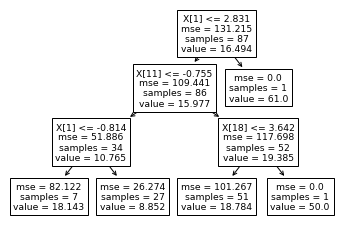

In [86]:
plot_tree(clf)

In [87]:
list(enumerate(filtered.columns))

[(0, 'Acinar'),
 (1, 'B_cell'),
 (2, 'CAF_1'),
 (3, 'CAF_2'),
 (4, 'CD4_T_cell'),
 (5, 'CD8_T_cell'),
 (6, 'CD8_T_cell_-_exausted'),
 (7, 'DC'),
 (8, 'Endothelial'),
 (9, 'Erythrocyte'),
 (10, 'Malignant_0'),
 (11, 'Malignant_1'),
 (12, 'Malignant_2'),
 (13, 'Malignant_3'),
 (14, 'Mast'),
 (15, 'Monocyte'),
 (16, 'NK'),
 (17, 'Plasma'),
 (18, 'Stellate'),
 (19, 'Treg'),
 (20, 'U1'),
 (21, 'Malignant_0_tumor_fraction'),
 (22, 'Malignant_1_tumor_fraction'),
 (23, 'Malignant_2_tumor_fraction'),
 (24, 'Malignant_3_tumor_fraction')]

In [200]:
nk_split = .141
m0_split = -.08

high_nk_idxs = [i for i, x in enumerate(X) if x[0]>nk_split]
high_m0_idxs = [i for i, x in enumerate(X) if x[15]>nk_split]

filtered['nk_status'] = ['high' if i in high_nk_idxs else 'low' for i in range(filtered.shape[0])]
filtered['malignant_0_status'] = ['high' if i in high_m0_idxs else 'low' for i in range(filtered.shape[0])]
def get_bin(nk, m0):
    if nk=='high' and m0=='high': return 'high NK | high M0'
    elif nk=='high' and m0=='low': return 'high NK | low M0'
    elif nk=='low' and m0=='high': return 'low NK | high M0'
    return 'low NK | low M0'
filtered['overall_bin'] = [get_bin(a, b) for a, b in zip(filtered['nk_status'], filtered['malignant_0_status'])]
filtered

NK  Malignant_4  CD4_T_cell    B_cell  Malignant_2  \
SA518851      0.041515     0.004216    0.129362  0.019481     0.082067   
SA528766      0.000000     0.162187    0.249633  0.042140     0.000000   
SA528763      0.033454     0.068236    0.141802  0.062373     0.000000   
SA518854      0.000000     0.044426    0.169738  0.004105     0.014543   
SA518806      0.028271     0.146463    0.216910  0.015382     0.005238   
...                ...          ...         ...       ...          ...   
TCGA-XN-A8T3  0.045568     0.030562    0.020118  0.036410     0.085183   
TCGA-XN-A8T5  0.041184     0.075778    0.048425  0.070115     0.061219   
TCGA-YB-A89D  0.034564     0.204069    0.047086  0.011891     0.061190   
TCGA-YY-A8LH  0.045395     0.387470    0.039257  0.005050     0.054282   
TCGA-Z5-AAPL  0.104349     0.052529    0.122496  0.174376     0.038791   

              Stellate  Monocyte  Fibroblast  Endothelial      Mast  ...  \
SA518851      0.000000  0.004126    0.327971     0.078949  0.000000  ...   
SA528766      0.000000  0.000000    0.066195     0.084853  0.000000  ...   
SA528763      0.000000  0.000000    0.409632     0.066908  0.000000  ...   
SA518854      0.000000  0.017907    0.277416     0.084104  0.000000  ...   
SA518806      0.000000  0.000000    0.207536     0.075881  0.000000  ...   
...                ...       ...         ...          ...       ...  ...   
TCGA-XN-A8T3  0.021925  0.024416    0.314661     0.077140  0.000000  ...   
TCGA-XN-A8T5  0.052603  0.000000    0.309303     0.133351  0.024295  ...   
TCGA-YB-A89D  0.001354  0.032741    0.364291     0.063783  0.000000  ...   
TCGA-YY-A8LH  0.000000  0.000000    0.026365     0.057531  0.003437  ...   
TCGA-Z5-AAPL  0.039945  0.026574    0.077293     0.086549  0.000000  ...   

                Acinar  Endocrine  Malignant_4_tumor_fraction  \
SA518851      0.000000        0.0                    0.011697   
SA528766      0.002312        0.0                    0.293145   
SA528763      0.000000        0.0                    0.246620   
SA518854      0.059237        0.0                    0.123095   
SA518806      0.000000        0.0                    0.322992   
...                ...        ...                         ...   
TCGA-XN-A8T3  0.013069        0.0                    0.081514   
TCGA-XN-A8T5  0.000000        0.0                    0.330537   
TCGA-YB-A89D  0.000000        0.0                    0.529943   
TCGA-YY-A8LH  0.000000        0.0                    0.493044   
TCGA-Z5-AAPL  0.000000        0.0                    0.340972   

              Malignant_2_tumor_fraction  Malignant_1_tumor_fraction  \
SA518851                        0.227686                    0.008944   
SA528766                        0.000000                    0.185301   
SA528763                        0.000000                    0.057953   
SA518854                        0.040297                    0.095747   
SA518806                        0.011551                    0.040020   
...                                  ...                         ...   
TCGA-XN-A8T3                    0.227199                    0.294423   
TCGA-XN-A8T5                    0.267029                    0.090475   
TCGA-YB-A89D                    0.158902                    0.070693   
TCGA-YY-A8LH                    0.069072                    0.062761   
TCGA-Z5-AAPL                    0.251794                    0.023434   

              Malignant_3_tumor_fraction  Malignant_0_tumor_fraction  \
SA518851                        0.043455                    0.708218   
SA528766                        0.222170                    0.299384   
SA528763                        0.628501                    0.066926   
SA518854                        0.235832                    0.505029   
SA518806                        0.074163                    0.551274   
...                                  ...                         ...   
TCGA-XN-A8T3                    0.040008                    0.356857

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 

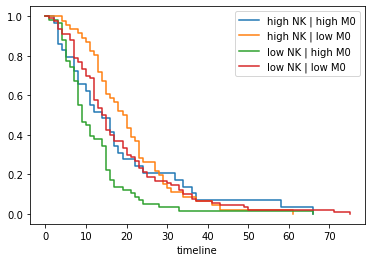

In [202]:
kmf = KaplanMeierFitter()
# ft = t[t['dataset']=='tcga']
ft = combined.copy()
ft = ft[ft['dataset']!='moffit']
# ft = ft[ft['dataset']=='tcga']
ft['overall_bin'] = filtered.loc[ft.index]['overall_bin']
# ft = filtered.copy()
T = ft['survival_time']
E = ft['status']
groups = ft[f'overall_bin']

l = 'high NK | high M0'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

l = 'high NK | low M0'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

l = 'low NK | high M0'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

l = 'low NK | low M0'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
# ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

0.56 0.001371914035973784


/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


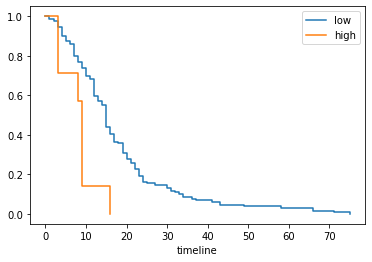

In [184]:
t = combined.copy()
# t = t[t['dataset']!='moffit']
t = t[t['dataset']=='tcga']

f = 'Malignant_0_tumor_fraction'
t['sample_id'] = t.index.to_list()

df = get_pvals(t,
    np.asarray(range(0, 100, 1)) / 100, f)
cutpoint = df.iloc[np.argmin(df['p-value']), 0]
print(cutpoint, np.min(df['p-value']))
t[f'{f}_bin'] = ['low' if x < cutpoint else 'high' for x in t[f]]
t

kmf = KaplanMeierFitter()
ft = t.copy()
T = ft['survival_time']
E = ft['status']
groups = ft[f'{f}_bin']

kmf.fit(T[groups=='low'], E[groups=='low'], label='low')
ax = kmf.plot(show_censors=True, ci_show=False, )

kmf.fit(T[groups=='high'], E[groups=='high'], label='high')
ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
# ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

In [167]:
df

cutpoint   p-value
0       0.00       NaN
1       0.01  0.016678
2       0.02  0.615984
3       0.03  0.528279
4       0.04  0.404230
..       ...       ...
95      0.95       NaN
96      0.96       NaN
97      0.97       NaN
98      0.98       NaN
99      0.99       NaN

[100 rows x 2 columns]

In [190]:
df[~pd.isnull(df['p-value'])]

cutpoint   p-value
7     0.0175  0.666779
8     0.0200  0.834920
9     0.0225  0.831211
10    0.0250  0.282693
11    0.0275  0.083214
12    0.0300  0.659999
13    0.0325  0.374436
14    0.0350  0.165783
15    0.0375  0.193767
16    0.0400  0.407045
17    0.0425  0.127320
18    0.0450  0.189402
19    0.0475  0.257215
20    0.0500  0.588400
21    0.0525  0.568427
22    0.0550  0.225754
23    0.0575  0.225754
24    0.0600  0.225754
25    0.0625  0.315629
26    0.0650  0.229209
27    0.0675  0.229209
28    0.0700  0.229209

In [259]:
def plot_survival_bicell_survival_curve(combined, dataset, f1, f2, c1_cut=None, c2_cut=None):
    t = combined.copy()
    t = t[t['dataset']==dataset]
    t['sample_id'] = t.index.to_list()

    df = get_pvals(t,
        np.asarray(range(0, 100, 1)) / 400, f1)
    cutpoint = df.iloc[np.argmin(df['p-value']), 0] if c1_cut is None else c1_cut
    t[f'{f1}_bin'] = ['low' if x < cutpoint else 'high' for x in t[f1]]

    t2 = t[t[f'{f1}_bin']=='low']
    df = get_pvals(t2,
        np.asarray(range(0, 100, 1)) / 400, f2)

    cutpoint = df.iloc[np.argmin(df['p-value']), 0] if c2_cut is None else c2_cut
    t[f'{f2}_bin'] = ['low' if x < cutpoint else 'high' for x in t[f2]]

    t['overall_bin'] = [f'{f1} {a} | {f2} {b}' for a, b in zip(t[f'{f1}_bin'], t[f'{f2}_bin'])]

    kmf = KaplanMeierFitter()
    ft = t.copy()
    T = ft['survival_time']
    E = ft['status']
    groups = ft[f'overall_bin']

    l = f'{f1} high | {f2} high'
    kmf.fit(T[groups==l], E[groups==l], label=l)
    ax = kmf.plot(show_censors=True, ci_show=False, )

    l = f'{f1} high | {f2} low'
    kmf.fit(T[groups==l], E[groups==l], label=l)
    ax = kmf.plot(show_censors=True, ci_show=False, )

    l = f'{f1} low | {f2} high'
    kmf.fit(T[groups==l], E[groups==l], label=l)
    ax = kmf.plot(show_censors=True, ci_show=False, )

    l = f'{f1} low | {f2} low'
    kmf.fit(T[groups==l], E[groups==l], label=l)
    ax = kmf.plot(show_censors=True, ci_show=False, )

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 

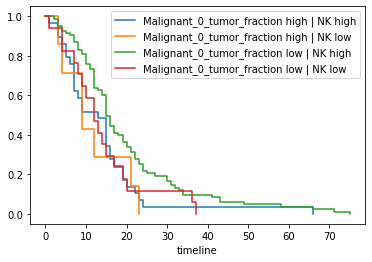

In [262]:
plot_survival_bicell_survival_curve(combined, 'tcga', 'Malignant_0_tumor_fraction', 'NK',
                                   c1_cut=.36)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 

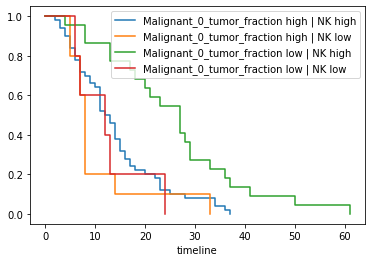

In [263]:
plot_survival_bicell_survival_curve(combined, 'bailey', 'Malignant_0_tumor_fraction', 'NK',
                                   c1_cut=None)

0.56 0.001371914035973784
0.0275 0.07712891391926313


/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 

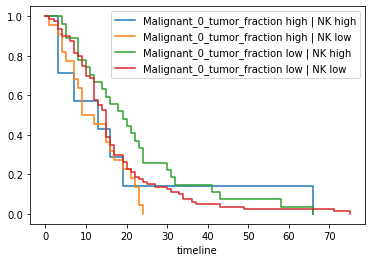

In [258]:
t = combined.copy()
t = t[t['dataset']=='tcga']
f1, f2 = 'Malignant_0_tumor_fraction', 'NK'
t['sample_id'] = t.index.to_list()

df = get_pvals(t,
    np.asarray(range(0, 100, 1)) / 100, f1)
cutpoint = df.iloc[np.argmin(df['p-value']), 0]
print(cutpoint, np.min(df['p-value']))
cutpoint = .38
t[f'{f1}_bin'] = ['low' if x < cutpoint else 'high' for x in t[f1]]

t2 = t[t[f'{f1}_bin']=='low']
df = get_pvals(t2,
    np.asarray(range(0, 100, 1)) / 400, f2)

cutpoint = df.iloc[np.argmin(df['p-value']), 0]
# print(np.argsort(df['p-value']))
# print(df['p-value'][np.argsort(df['p-value'])])
print(cutpoint, np.min(df['p-value']))
cutpoint = 0.0450
t[f'{f2}_bin'] = ['low' if x < cutpoint else 'high' for x in t[f2]]

t['overall_bin'] = [f'{f1} {a} | {f2} {b}' for a, b in zip(t[f'{f1}_bin'], t[f'{f2}_bin'])]

kmf = KaplanMeierFitter()
ft = t.copy()
T = ft['survival_time']
E = ft['status']
groups = ft[f'overall_bin']

l = f'{f1} high | {f2} high'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

l = f'{f1} high | {f2} low'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

l = f'{f1} low | {f2} high'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

l = f'{f1} low | {f2} low'
kmf.fit(T[groups==l], E[groups==l], label=l)
ax = kmf.plot(show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
# ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Malignant_0_tumor_fraction high | NK high'),
  Text(1, 0, 'Malignant_0_tumor_fraction low | NK high'),
  Text(2, 0, 'Malignant_0_tumor_fraction low | NK low'),
  Text(3, 0, 'Malignant_0_tumor_fraction high | NK low')])

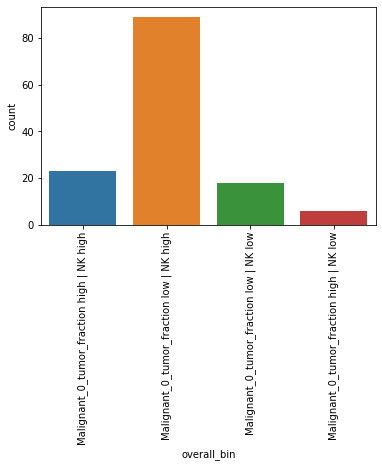

In [194]:
sns.countplot(x='overall_bin', data=ft)
plt.xticks(rotation=90)

In [ ]:
t = combined.copy()
t['sample_id'] = t.index.to_list()
t['ed_bin'] = ['LD' if x < 1. else 'ED' for x in t['ed']]
t['sq_bin'] = ['SQ' if x >= .3 else 'CL' for x in t['squam']]
def get_bin(s, e):
#     if s > .25: return 'SQ'
    if e > 0.5: return 'ED'
    return 'LD'
t['overall_bin'] = [get_bin(s, e) for s, e in zip(t['squam'], t['ed'])]

In [ ]:
kmf = KaplanMeierFitter()
ft = t[t['dataset']=='tcga']
T = ft['survival_time']
E = ft['status']
groups = ft['overall_bin']

kmf.fit(T[groups=='LD'], E[groups=='LD'], label='LD')
ax = kmf.plot(show_censors=True, ci_show=False, )

kmf.fit(T[groups=='ED'], E[groups=='ED'], label='ED')
ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

# kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
# ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
ft = t[t['dataset']=='moffit']
T = ft['survival_time']
E = ft['status']
groups = ft['sq_bin']

kmf.fit(T[groups=='CL'], E[groups=='CL'], label='CL')
ax = kmf.plot(show_censors=True, ci_show=False, )

kmf.fit(T[groups=='SQ'], E[groups=='SQ'], label='SQ')
ax = kmf.plot(ax=ax, show_censors=True, ci_show=False, )

In [ ]:
from lifelines.statistics import logrank_test
results = logrank_test(T[groups=='ED'], T[groups=='LD'], event_observed_A=E[groups=='ED'], event_observed_B=E[groups=='LD'])
results.print_summary()

In [ ]:
results.p_value

In [ ]:
results = logrank_test(T[groups=='SQ'], T[groups=='LD'], event_observed_A=E[groups=='SQ'], event_observed_B=E[groups=='LD'])
results.print_summary()

In [ ]:
SA407858

In [ ]:
chart = alt.Chart(combined[combined['dataset']=='bailey']).mark_circle().encode(
    x='survival_time',
    y='ed',
    color='squam'
)
chart + chart.transform_regression('survival_time', 'ed').mark_line()

In [ ]:
p = combined[((combined['dataset']=='bailey') & (combined['status']==2))].copy()
sns.scatterplot(x='survival_time', y='squam', data=p)
plt.show()
sns.scatterplot(x='survival_time', y='ed', data=p, hue='squam')
plt.show()

In [ ]:
sns.scatterplot(x='ed', y='squam', data=p)
plt.show()

In [ ]:
p = combined[((combined['dataset']=='bailey') & (combined['status']==2))].copy()
sns.scatterplot(x='survival_time', y='squam', data=p)
plt.show()
sns.scatterplot(x='survival_time', y='ed', data=p)
plt.show()

In [ ]:
p = combined[((combined['dataset']=='moffit') & (combined['status']==2))].copy()
sns.scatterplot(x='survival_time', y='squam', data=p)
plt.show()
sns.scatterplot(x='survival_time', y='ed', data=p)
plt.show()

## moffit overlap

In [ ]:
moffit_combined['moffit_subtype'] = ['squamous-like' if s == 2 else 'non-squamous'
                                    for s in moffit_combined['tumor_subtype']]
moffit_combined

In [ ]:
sns.boxplot(x='moffit_subtype', y='squam', data=moffit_combined)
sns.swarmplot(x='moffit_subtype', y='squam', data=moffit_combined, color='black')
plt.savefig(os.path.join(figdir, f'moffit_overlap_{THRESH}.pdf'))

In [ ]:
p = moffit_combined[((moffit_combined['status']==2))]
sns.boxplot(x='moffit_subtype', y='survival_time', data=p)
sns.swarmplot(x='moffit_subtype', y='survival_time', data=p,
              color='black')

## bailey overlap

In [ ]:
bailey_subtypes = pd.read_excel('../data/bulk_rna_seq/bailey/41586_2016_BFnature16965_MOESM271_ESM.xlsx')
bailey_subtypes

In [ ]:
bailey_combined

In [ ]:
p = pd.merge(bailey_combined, bailey_subtypes, left_on='submitted_donor_id_x', right_on='icgc_id')

In [ ]:
subtype_map = {
    1: 'ADEX',
    2: 'Immunogenic',
    3: 'Squamous',
    4: 'Pancreatic Progenitor'
}

In [ ]:
p['bailey_subtype'] = [subtype_map[s]
        for s in p['membership.ordered']]
p

In [ ]:
sns.boxplot(x='bailey_subtype', y='squam', data=p)
sns.swarmplot(x='bailey_subtype', y='squam', data=p, color='black')
plt.savefig(os.path.join(figdir, f'bailey_overlap_{THRESH}.pdf'))

In [ ]:
# p = p[((p['status']==2))]
sns.boxplot(x='bailey_subtype', y='survival_time', data=p[((p['status']==2))])
sns.swarmplot(x='bailey_subtype', y='survival_time', data=p[((p['status']==2))],
              color='black')